In [15]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [9]:
def downscale_image(input_image_path, output_image_path, new_width, new_height):
    with Image.open(input_image_path) as img:
        # Resize the image
        img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)
        
        # Save the resized image
        img_resized.show()
#         print(f"Image saved to {output_image_path}")

In [11]:
# Example usage
input_image_path = '/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Frames/frame_0.jpg'  # Replace with your image path
output_image_path = 'resized_image.jpg'      # Replace with your desired output image path
new_width = 50   # Replace with desired width
new_height = 50  # Replace with desired height

downscale_image(input_image_path, output_image_path, new_width, new_height)

/var/folders/cv/6pxft_bx4g11l2vyl3c5l_n00000gn/T/ipykernel_12619/2236038393.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)


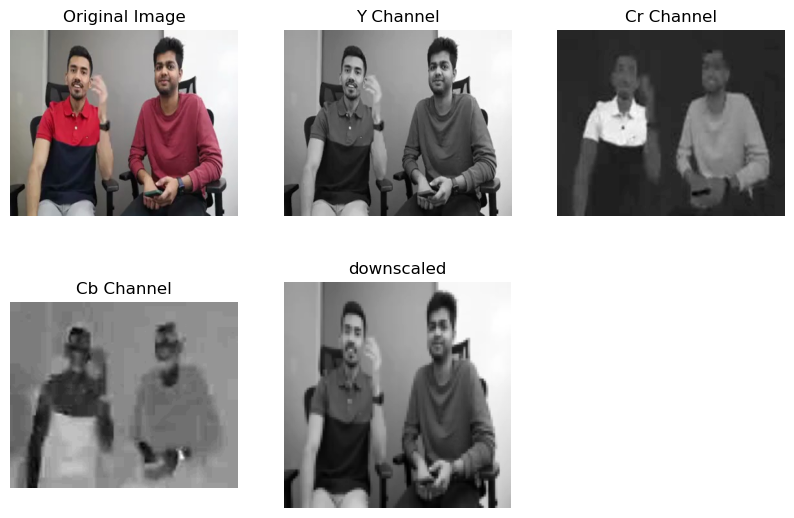

In [21]:
def display_ycrcb_channels(image_path):
    # Read the image
    img = cv2.imread(image_path)
    
    # Convert from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert from RGB to YCrCb
    img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)

    # Split into the Y, Cr, and Cb channels
    Y, Cr, Cb = cv2.split(img_ycrcb)
    
    img_resized = cv2.resize(Y, (100, 100), interpolation=cv2.INTER_AREA)

    # Display the channels
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, 3, 2)
    plt.imshow(Y, cmap='gray')
    plt.title('Y Channel')
    plt.axis('off')

    plt.subplot(3, 3, 3)
    plt.imshow(Cr, cmap='gray')
    plt.title('Cr Channel')
    plt.axis('off')

    plt.subplot(3, 3, 4)
    plt.imshow(Cb, cmap='gray')
    plt.title('Cb Channel')
    plt.axis('off')
    
    
    plt.subplot(3, 3, 5)
    plt.imshow(img_resized, cmap='gray')
    plt.title('downscaled')
    plt.axis('off')

    


    plt.show()

# Example usage
image_path = '/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Frames/frame_0.jpg'  # Replace with your image path
display_ycrcb_channels(image_path)

In [22]:
fileName="/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Videos/video1.mp4"


In [25]:
fileName.split("/")[-1].split(".")[0]

'video1'

In [26]:
import os

In [27]:
os.listdir("/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Videos")

['video12.mp4',
 'video13.mp4',
 'video11.mp4',
 'video10.mp4',
 'video14.mp4',
 'video15.mp4',
 'video17.mp4',
 'video16.mp4',
 'video6.mp4',
 'video7.mp4',
 'video5.mp4',
 'video4.mp4',
 'video1.mp4',
 'video3.mp4',
 'video2.mp4',
 'video9.mp4',
 'video8.mp4',
 'video18.mp4',
 'video19.mp4',
 'video20.mp4']

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def load_and_predict(image_path):
    # Load the saved model
    model = load_model('/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Data/SavedModel/signatureDetect.h5')

    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    img = np.reshape(img, (1, 100, 100, 1))
    img = img / 255.0
    # Make a prediction
    prediction = model.predict(img)
    model.train_g

    predicted_class = np.argmax(prediction, axis=1)

    return predicted_class

In [32]:
print(load_and_predict(
        "/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Data/Train/video10/frame_10_video10.jpg"))

1/1 [==============================] - 0s 61ms/step
[1]


In [ ]:
import cv2
import numpy as np
from multiprocessing import Pool

# Function to calculate the difference between two frames
def calculate_frame_diff(args):
    frame1, frame2 = args
    diff = cv2.absdiff(frame1, frame2)
    score = np.sum(diff)
    return score

def read_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)
    cap.release()
    return frames

def calculate_motion(video_path):
    frames = read_frames(video_path)

    # Pair frames for processing
    frame_pairs = [(frames[i], frames[i+1]) for i in range(len(frames)-1)]

    # Use multiprocessing to calculate frame differences
    with Pool() as pool:
        motion_scores = pool.map(calculate_frame_diff, frame_pairs)

    return motion_scores

def main():
    video_path = '/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Queries/video1_1.mp4'
    motion_scores = calculate_motion(video_path)
    print(motion_scores)


main()

In [34]:
diffs=[74886, 86280, 18898, 106037, 124259, 131434, 139987, 100762, 20468, 80764, 94329, 96053, 103994, 89123, 18320, 77467, 96395, 82195, 100644, 126086, 17715, 192287, 226016, 217697, 208237, 153010, 16136, 173603, 149823, 171250, 197057, 189631, 13446, 186562, 185789, 146951, 181497, 196654, 15495, 178712, 161248, 153657, 167085, 153996, 15450, 139328, 190656, 160945, 137266, 247923, 10318, 141721, 166696, 165104, 171624, 164431, 16668, 187764, 187851, 177936, 173361, 144106, 14181, 137367, 126630, 124417, 126652, 95774, 12336, 85256, 82201, 92538, 97700, 86292, 17154, 84293, 106746, 114956, 151461, 147583, 16717, 117766, 102438, 94060, 109529, 95075, 16169, 84038, 106909, 140238, 175617, 132328, 14455, 106884, 119795, 123106, 111258, 107379, 6277, 117945, 121271, 113583, 133445, 136807, 10233, 165945, 176465, 189790, 175148, 126136, 17438, 112732, 129057, 156732, 188742, 160755, 17443, 131122, 171219, 181358, 192081, 172106, 13801, 170029, 192555, 178954, 174653, 142908, 22769, 180122, 131427, 117972, 105009, 63256, 19403, 61129, 68746, 71325, 89206, 107387, 26332, 152335, 184445, 176754, 191729, 142993, 18214, 135867, 137123, 128286, 146913, 123880, 23341, 113494, 108513, 95981, 119428, 72713, 16715, 48582, 108791, 118201, 113840, 133743, 16231, 142183, 134321, 91628, 103430, 110942, 15608, 87472, 101256, 69440, 108025, 109589, 17270, 104725, 112641, 99071, 135862, 155332, 9509, 170962, 187366, 201230, 226538, 183618, 11665, 178443, 169600, 171911, 163867, 152016, 12983, 177555, 194698, 176992, 144769, 141240, 14500, 90525, 67133, 68526, 118857, 93643, 13197, 107448, 105231, 102379, 97431, 75299, 16508, 85429, 74879, 66245, 86579, 78895, 18634, 78078, 81250, 81585, 102959, 73940, 16203, 69680, 72742, 63967, 72330, 64308, 22262, 67010, 102682, 133858, 144289, 167798, 18690, 158250, 163369, 133140, 110001, 110804, 15473, 109999, 122484, 137357, 155322, 166375, 354, 332698, 255057, 246129, 218679, 194851, 11397, 163592, 163873, 192889, 219517, 173885, 13867, 162722, 214500, 298685, 385525, 352513, 17122, 275380, 220359, 181350, 155646, 139678, 12347, 152970, 124670, 151293, 163799, 151291, 19679, 159536, 202094, 202052, 231045, 268787, 16011, 341179, 361294, 234992, 154669, 123597, 13147, 102700, 62298, 48144, 94393, 104127, 3694, 139274, 163793, 260594, 120632, 147605, 22306, 171316, 205018, 206018, 235620, 216711, 19000, 226220, 188945, 151028, 210438, 232794, 15705, 248187, 224881, 156359, 113525, 98716, 13217, 158537, 138558, 121214, 107893, 95320, 15708, 139980, 101599, 59313, 96313, 109650, 13542, 112950, 88420, 64932, 83244, 77436, 14721, 80634, 84175, 78987, 95136, 138777, 15336, 135913, 135769, 120565, 139785, 137113, 15092, 144283, 142785, 117644, 100454, 85530, 11880, 107233, 79398, 42833, 54881, 55333, 19796, 63509, 36200, 65444, 93002, 110058, 14650, 139674, 160373, 159788, 176283, 173063, 12332, 117934, 116807, 144737, 159061, 143627, 13713, 164039, 143854, 124761, 97458, 98853, 8958, 85518, 60191, 107425, 118849, 119174, 8485, 113729, 77456, 70863, 85742, 104500, 6391, 127299, 138446, 139169, 157056, 158864, 19718, 148658, 137528, 135429, 163073, 175205, 15706, 193721, 162701, 165032, 181910, 188930, 13762, 175747, 210689, 196177, 195780, 176112, 13579, 177836, 137067, 121479, 134925, 139636, 18734, 157478, 135273, 107983, 118642, 146404, 10992, 166931, 151943, 127537, 135430, 122019, 12437, 135572, 139030, 115850, 128695, 118906, 13444, 129374, 136027, 113456, 120805, 91044, 18347, 84781, 59391, 60818, 63672, 85454, 13424, 142513, 205257, 221867, 206853, 202252, 11998, 211842, 169817, 104555, 143183, 132439, 20056, 134088, 115288, 88978, 93264, 89629, 15778, 79774, 69883, 62814, 79271, 76543, 17028, 77643, 78660, 79898, 94244, 332849, 9453, 81629, 56816, 66667, 83717, 93035, 5144, 113104, 139533, 179915, 170404, 250819, 8393, 117618, 81223, 85631, 74136, 95971, 10026, 89240, 58976, 37223, 23358, 28596, 11496, 30421, 40999, 36671, 54938, 87411, 5945, 97113, 99164, 101633, 101720, 94957, 12968, 92634, 86620, 87303, 110782, 102651, 20802, 129578, 170603, 246482, 310061, 337319, 12521, 284301, 216461, 224226, 247297, 228726, 5569, 240295, 216398, 247991, 290612, 231668, 14562, 285114, 152215, 195721, 239154, 260364, 17765, 223305, 162258, 88279, 143796, 164017, 6935, 191727, 182916, 187775, 179094, 184535, 9583, 190293, 175799, 179090, 174027, 166102, 9556, 183080, 149982, 118377, 97335, 105592, 10191, 142554, 143234, 190421, 203737, 138401, 10197, 137801, 145310, 115901, 143630, 167362, 13027, 177658, 175499, 159204, 155833, 136831, 11722, 144269, 182625, 208998, 224793, 147981, 17549, 138825, 141628, 106796, 93420, 69179, 16054, 79010, 88868, 92466, 117661, 103677, 19468, 78600, 74622, 73697, 114864, 120189, 23241, 145056, 138074, 141795, 170301, 165976, 9630, 148985, 122898, 90385, 101167, 96777, 15990, 126269, 143954, 163045, 226849, 535047, 11868, 291633, 214600, 135452, 137239, 151541, 15754, 164015, 165211, 147688, 133294, 164588, 15545, 173954, 152199, 122775, 90205, 109803, 16722, 145767, 127535, 82279, 130031, 135394, 13888, 115316, 81828, 72654, 110952, 99461, 14970, 72998, 101412, 110091, 112525, 116851, 8029, 144734, 141626, 175875, 173306, 124320, 8651, 118933, 61468, 82203, 114730, 134508, 8960, 170521, 168610, 172116, 171787, 148400, 20492, 133201, 131635, 132028, 128905, 88100, 12279, 74214, 58689, 53113, 93889, 93796, 14067, 107126, 94159, 88845, 100946, 77529, 17823, 95302, 102405, 105288, 97301, 89883, 19293, 86118, 70867, 77417, 101547, 86777, 15112, 59920, 61909, 75692, 114286, 155302, 6447, 181509, 191718, 184334, 176682, 228876, 11047, 154092, 159483, 218382, 226854, 214423, 14215, 199348, 146114, 109173, 101479, 118681, 2984, 150087, 145665, 275700, 174970, 160858, 12635, 163871, 169830, 164713, 173960, 161072, 15736, 150103, 140922, 115162, 109033, 97982, 12208, 78144, 103653, 110346, 146482, 179431, 17270, 184297, 208307, 195341, 208648, 222257, 20150, 219693, 190230, 183308, 176996, 130391, 17792, 144479, 139036, 137876, 124395, 97420, 20864, 84175, 69369, 61840, 55338, 62323, 16434, 68217, 77514, 87353, 95252, 219356, 7012, 99973, 139571, 152735, 174379, 141088, 12191, 120548, 102876, 93505, 87108, 66672, 15703, 55267, 53263, 58914, 99216, 148288, 11614, 181308, 210039, 163447, 173994, 162680, 17717, 148956, 141762, 127089, 114424, 116852, 17433, 110221, 145149, 171564, 126093, 128385, 13324, 153716, 123764, 85347, 63474, 66310, 16817, 86862, 82214, 89286, 88411, 81029, 14018, 80934, 104896, 104549, 80932, 69665, 14070, 97749, 164592, 187756, 166879, 138651, 12924, 148603, 169696, 176986, 177089, 157854, 17217, 125322, 120333, 142992, 192546, 211902, 15817, 187679, 130075, 110613, 98069, 114833, 13057, 88544, 74767, 91651, 112956, 85032, 22163, 71406, 53089, 71819, 117319, 109496, 16535, 77478, 113189, 146756, 196064, 170334, 9980, 137239, 120341]


In [36]:
len(set(diffs))

896

In [37]:
len(diffs)

899

In [38]:
899/60

14.983333333333333

In [39]:
1002/60

16.7

In [40]:
1002%60

42

In [42]:
954%60

54

In [3]:
newDiff=[236995, 173635, 20761, 113219, 40251, 65950, 87761, 83771, 14971, 98128, 95083, 101586, 154330, 170689, 10741, 205748, 222081, 231974, 228919, 203898, 12883, 189966, 146631, 170580, 234108, 282284, 10287, 339382, 344714, 309557, 288981, 242516, 11893, 191687, 185105, 220959, 220916, 253050, 15833, 341282, 325473, 245378, 268069, 241414, 19047, 202336, 173529, 153671, 168682, 733603, 20654, 227674, 244237, 323968, 412840, 483332, 9191, 488349, 413850, 340232, 307864, 254757, 12627, 311489, 342346, 310233, 259192, 165502, 20173, 103957, 90468, 123011, 147124, 133964, 20096, 110919, 83730, 88617, 108560, 104123, 11734, 84173, 57830, 50680, 81313, 115760, 11493, 102361, 100701, 114986, 122373, 149157, 12573, 171591, 176415, 155468, 142470, 114225, 12562, 95029, 172767, 218975, 231297, 170734, 7696, 64296, 153977, 181291, 186290, 170434, 3502, 127040, 108594, 171112, 193123, 222154, 6414, 219087, 189842, 154937, 115349, 125289, 7617, 155550, 143591, 106563, 79738, 87350, 9097, 127599, 129258, 132371, 116323, 84158, 10814, 86026, 148320, 189094, 243640, 242506, 9267, 214901, 233160, 226552, 218972, 241094, 6687, 242262, 231404, 179876, 219231, 259244, 13455, 253201, 246647, 219679, 213171, 207001, 11375, 202290, 249437, 316432, 980953, 256770, 19198, 411434, 115175, 108805, 105341, 79952, 13968, 73865, 99806, 113506, 142195, 121251, 4595, 113616, 112137, 74363, 69010, 32683, 10842, 30921, 76707, 89904, 82406, 53835, 12978, 25684, 70160, 70022, 66814, 55295, 13213, 112968, 169147, 184520, 199475, 207295, 15569, 186870, 159978, 119419, 69956, 129546, 7843, 178711, 190598, 167439, 132803, 110452, 22496, 65295, 80860, 121555, 164004, 177667, 15718, 196188, 226524, 193235, 219731, 212019, 12592, 192781, 162787, 136926, 117599, 95717, 11377, 57694, 72714, 61627, 53013, 61740, 9739, 58809, 60832, 63253, 70168, 54284, 6355, 84542, 90138, 91357, 92749, 73076, 11071, 265705, 74618, 96180, 80939, 75582, 14009, 54674, 89814, 104674, 143823, 152047, 14588, 163873, 167387, 178161, 232347, 222684, 15220, 186566, 169179, 143712, 162631, 164187, 8600, 176949, 154136, 135120, 114304, 109976, 5089, 102375, 81022, 69398, 84286, 118317, 25469, 128164, 133741, 126650, 139499, 159819, 4817, 194153, 200140, 164702, 132440, 114013, 7922, 94836, 143839, 161090, 179807, 202815, 9049, 118415, 140294, 235363, 255860, 251548, 8765, 259773, 247005, 218695, 429043, 162978, 5765, 360305, 126995, 112331, 109268, 93206, 8940, 77126, 68126, 62836, 64991, 70042, 6780, 69558, 70835, 92774, 74704, 84372, 10593, 68103, 76167, 92848, 103105, 86171, 7053, 116310, 126006, 156337, 161190, 144748, 12477, 129458, 146787, 155405, 129399, 132926, 14508, 173553, 214283, 207822, 171285, 155499, 13162, 94633, 98863, 135854, 158738, 126405, 12565, 77243, 117266, 193671, 229810, 152308, 9113, 195144, 225289, 198892, 179661, 172564, 13407, 150571, 58483, 154571, 213478, 246215, 5326, 274782, 230072, 140339, 73156, 57260, 5445, 70214, 68627, 67146, 86117, 68342, 14571, 65437, 73976, 60937, 55967, 74687, 5253, 120815, 134665, 131796, 121032, 121658, 14974, 165684, 189666, 180746, 184625, 194282, 11883, 186171, 201515, 236159, 267566, 263423, 13438, 217035, 133182, 161460, 237141, 249577, 17958, 268769, 318939, 283608, 204473, 218605, 12878, 227303, 225258, 191603, 212130, 190684, 11261, 169218, 155207, 157338, 165698, 216370, 11698, 247211, 256127, 226556, 218485, 161286, 19883, 142426, 176362, 225754, 231714, 178688, 27953, 139640, 94762, 81136, 120522, 101916, 19866, 105738, 114042, 106407, 109733, 112044, 15107, 99696, 93830, 96947, 86987, 73948, 10769, 64787, 56464, 62181, 82730, 77057, 5866, 106542, 121175, 109663, 115857, 118019, 12985, 99868, 92855, 94887, 136162, 166513, 4859, 196220, 170063, 137108, 117933, 117519, 7408, 138197, 164947, 201783, 210943, 308142, 6232, 175923, 159450, 161368, 169996, 172550, 15130, 184310, 159143, 120626, 109809, 111779, 10721, 129751, 137452, 134468, 145371, 108320, 15379, 139454, 151326, 174656, 185627, 138352, 13025, 143161, 172192, 222101, 270531, 252392, 14190, 197739, 132780, 135942, 204425, 228631, 12119, 228686, 285825, 336526, 315285, 155172, 16117, 139948, 102791, 104683, 136084, 95996, 14796, 82294, 141750, 162253, 156716, 129981, 13478, 69405, 28776, 35956, 55283, 47177, 10156, 45845, 52551, 51038, 55084, 41731, 11055, 42725, 70324, 89969, 90982, 92976, 11288, 80486, 60810, 54924, 65371, 50288, 6806, 68711, 93486, 131054, 179017, 193456, 10407, 186244, 200489, 193732, 192503, 186715, 12112, 135322, 113842, 81970, 101040, 113764, 18290, 135301, 112731, 108357, 111094, 92982, 15602, 77292, 121218, 97156, 105122, 107975, 19652, 136035, 161359, 194556, 255816, 228939, 14022, 260954, 245366, 200074, 158816, 142633, 17282, 116648, 140426, 130308, 123748, 105017, 15481, 60164, 67479, 63902, 91331, 75847, 18961, 63548, 67594, 75797, 99204, 97546, 14721, 93985, 81792, 85592, 134078, 142002, 17597, 146885, 113476, 75804, 102604, 120083, 15409, 132810, 127733, 126738, 130065, 153421, 14086, 195410, 219801, 220227, 193545, 148733, 10330, 95965, 82235, 107125, 122435, 104292, 12085, 59159, 46181, 67571, 73135, 45547, 11109, 27458, 21357, 16361, 31173, 43334, 16300, 53142, 70553, 72187, 77871, 62846, 11470, 60775, 63424, 87494, 108806, 113373, 9917, 108872, 98396, 85542, 72810, 62702, 9554, 98906, 121370, 117104, 103435, 72365, 10239, 91191, 66611, 43438, 48052, 38025, 7726, 101892, 128885, 153055, 195286, 226633, 8925, 250003, 173637, 129589, 102246, 60216, 13956, 68536, 76829, 83542, 100594, 55118, 8928, 36085, 54635, 63855, 71325, 59524, 12164, 58799, 46720, 48031, 68783, 77045, 12108, 94083, 87273, 86041, 120668, 118209, 7432, 119584, 118913, 303069, 151827, 135012, 14643, 165248, 145363, 170523, 200998, 211295, 15131, 217431, 197361, 146270, 170611, 170517, 13138, 213056, 195831, 185598, 190217, 171759, 11776, 153235, 116326, 86666, 77510, 76815, 13667, 104981, 108365, 91591, 81342, 67332, 15096, 64277, 68662, 61521, 42209, 37487, 20513, 36427, 42875, 53328, 59734, 55453, 13482, 65531, 76865, 101802, 125278, 138969, 16998, 164101, 184084, 157673, 135567, 91869, 15441, 58131, 53873, 51061, 65696, 61592, 14992, 60655, 73802, 57435, 40411, 40074, 13318, 23156, 27628, 36982, 53313, 55385, 13605, 56577, 94385, 112774, 178724, 244686, 15072, 296054, 285469, 213406, 179592, 118377, 17457, 92355, 111830, 106464, 90914, 66645, 21090, 30628, 112996, 159427, 194299, 188890, 15860, 182629, 166367, 159696, 186467, 151275, 7830, 134715, 105542, 78490, 92031, 114029, 6834, 164504, 212646, 258699, 262499, 204522, 4648, 123838, 89063, 86096, 82728, 91660, 8995, 135515, 164805, 181129, 210886, 276651, 10158, 316944, 232722, 145700, 147104, 143188, 11496, 127243, 163050, 193356, 238487, 214869, 11872, 247020, 256225, 256949, 264663, 265516, 13140, 319254, 307442, 308002, 356450, 371994, 10043, 410226, 382020, 354738, 404514, 352892, 14921, 361556, 317794, 311011, 362816, 392286, 10505, 367129, 283377, 256639, 305478, 272140, 12510, 254193, 251680, 239998, 306215, 273923, 7471, 301386, 299980, 294943, 294756, 276578, 11954, 284103, 270425, 251204, 275665, 245705, 12840, 241686, 225583, 205929, 198544, 166674, 13311, 156393, 133460, 124605, 148018, 139734, 17361, 149188, 107900, 118549, 148813, 159617, 16103, 152789, 136949, 165971, 185143, 180996, 15784, 154856, 149720, 162598, 182011, 184717, 13748, 234913, 264294, 289763, 350039, 292897, 11790, 227407, 238978, 272884, 256422, 214116, 10181, 215347, 230313, 225531, 206276, 127731, 13883, 161718, 154548, 130569, 155580, 156380, 13242, 162170, 164501, 169814, 214510, 191869, 328, 280872, 182089, 152175, 140197, 127874, 16627, 146730, 143935, 138554, 151919, 160123, 12006, 185533, 188923, 193106, 211946, 184354, 15304, 160742, 127462, 118791, 128610, 99327, 15764, 95290, 81867, 71078, 73080, 76411, 15777, 95558, 119162, 135001, 156757, 155190, 14312, 163598, 165063, 133936, 88259, 74702, 18724, 65922, 60064, 60533, 55859, 54942, 16195, 69106, 48712, 42295, 58010, 64807, 13081, 69263, 62594, 51299, 72072, 96241, 12088, 89109, 133211, 146326, 116387, 59860, 19590, 98814, 144216, 186352, 211646, 173826, 15299, 170283, 255991, 290531, 302604, 213547, 17110, 269482, 280470, 278421, 242409, 170897, 14035, 174456, 161496, 149412, 184291, 197793, 16495, 197853, 170596, 166595, 179544, 129025, 14035, 105420, 107226, 111907, 122587, 90271, 22166, 71996, 138767, 158264, 180350, 197351, 14679, 264875, 272744, 252281, 254273, 227574, 9252, 235499, 202409, 228108, 265122, 243792, 11648, 193362, 166768, 174055, 207205, 222661, 13023, 162589, 207084, 196181, 184744, 149136, 14079, 153761, 173868, 163013, 89355, 108274, 14921, 139785, 148183, 142952, 180975, 167201, 10813, 167293, 187725, 228056, 226428, 220914, 8188, 283343, 302200, 297588, 278896, 257301, 14781, 245746, 239970, 236906, 270541, 259107, 16564, 240133, 174045, 146983, 133631, 134046, 11756, 152141, 124655, 93940, 102139, 76394, 17931, 48935, 56750, 64446, 83163, 72299, 14776, 67806, 63000, 69225, 86585, 84398, 13500, 93888, 87927, 99519, 162889, 198958, 15412, 271670, 248460, 220841, 218559, 179309, 10730, 163555, 185695, 239139, 271317, 231863, 11172, 175349, 172648, 135439, 109460, 93302, 12028, 154087, 145583, 159117, 171260, 170490, 18282, 199769, 185849, 212076, 222167, 225531, 21110, 199632, 177278, 182872, 228665, 274381, 18067, 312888, 328435, 335242, 352753, 349841, 13573, 341901, 332764, 291598, 257580, 235937, 12350, 251129, 264103, 256524, 261285, 255517, 8629, 258097, 254398, 236793, 244511, 394744, 7750, 222486, 201235, 200711, 206868, 174675, 6324, 142741, 124320, 212845, 269451, 282685, 9506, 269984, 193502, 170141, 216243, 173925, 13278, 161262, 202270, 208725, 233003, 229584, 17077, 248066, 240992, 214144, 176701, 132124, 11623, 132950, 155551, 164547, 175714, 145693, 12368, 144810, 115307, 119308, 131954, 113040, 12855, 101773, 86498, 126492, 163470, 187623, 12799, 219897, 210254, 213948, 238164, 202869, 12811, 165015, 174875, 163135, 171636, 128100, 14821, 136525, 169276, 188834, 249906, 256137, 20964, 296470, 310074, 288220, 300806, 313230, 3151, 315034, 274489, 255992, 223389, 187879, 16847, 182571, 187925, 190574, 206991, 197630, 8576, 238508, 231834, 213500, 180453, 135533, 16152, 125343, 97874, 105578, 127660, 103521, 18467, 103978, 114094, 121686, 144042, 138242, 13387, 192589, 165244, 147322, 139100, 113908, 26925, 107426, 147896, 127793, 158301, 142980, 18934, 130457, 128797, 139321, 137819, 140129, 7584, 142292, 135860, 134815, 128264, 115534, 15370, 125056, 103611, 92369, 115321, 87586, 14403, 114578, 124428, 113980, 133776, 111389, 13204, 151937, 196038, 236308, 244056, 257284, 15737, 285283, 279909, 232059, 238320, 232282, 19604, 213936, 151217, 116069, 151847, 124609, 19319, 182467, 235029, 281552, 262851, 199551, 10301, 181775, 161881, 141222, 146433, 128981, 14068, 118362, 99116, 65281, 86328, 97774, 23168, 123162, 136969, 161699, 170127, 307706, 9624, 193905, 182029, 170852, 159167, 160000, 11265, 135501, 115078, 150631, 175688, 180672, 11754, 201749, 195812, 202219, 220999, 180995, 19805, 156328, 130529, 123144, 139955, 111498, 11098, 134014, 132843, 138177, 167013, 184674, 19375, 165052, 165782, 162334, 166317, 110012, 10826, 127367, 176272, 186404, 214026, 205177, 18998, 189646, 147852, 117455, 121472, 102867, 16879, 108600, 85659, 81098, 111250, 102502, 9841, 108014, 132913, 166875, 184637, 149699, 12101, 174842, 194620, 189923, 182021, 162399, 4598, 144101, 124657, 284772, 114324, 103268, 18870, 109984, 74039, 61820, 60248, 44885, 31040, 47088, 45729, 76457, 104497, 102794, 17599, 142618, 137394, 150940, 169661, 168608, 13868, 207911, 310563, 164924, 168627, 181309, 11784, 214387, 198324, 160254, 207683, 195419, 18301, 188972, 165151, 186397, 195671, 171258, 14685, 134598, 155609, 128641, 129271, 115127, 14219, 116567, 146435, 150957, 156630, 137211, 10146, 152226, 160604, 152208, 186728, 145453, 14596, 163619, 154530, 135957, 153760, 99084, 21267, 82552, 84638, 79029, 88166, 61145, 16562, 47894, 43636, 50563, 69305, 62715, 14062, 99375, 127853, 164447, 187031, 166554, 14673, 133313, 65117, 81093, 95712, 85794, 13944, 54925, 46834, 52808, 79727, 128947, 9158, 373643, 148068, 127987, 113424, 99234, 7556, 57774, 42236, 51321, 67605, 90622, 9448, 140616, 154749, 180337, 191762, 156501, 9465, 116961, 68843, 81572, 76581, 55883, 11865, 57849, 83377, 83126, 96542, 119349, 13653, 120055, 85470, 126915, 163264, 144897, 5588, 116964, 90551, 147121, 161411, 148807, 10093, 140062, 173458, 231981, 240127, 252454, 12669, 293687, 315429, 384603, 402250, 400535, 10594, 364974, 334539, 355886, 312464, 272039, 10791, 213962, 199913, 186499, 202476, 190754, 13532, 206984, 209234, 208677, 310983, 291815, 14320, 330483, 316133, 266266, 175102, 122264, 20009, 182586, 262638, 307817, 340497, 336581, 13993, 313094, 256776, 199087, 192965, 150965, 16907, 152025, 146646, 155563, 160896, 221941, 14918, 302287, 309187, 246796, 141138, 187672, 18149, 220823, 230175, 231644, 228645, 236754, 21643, 226871, 180285, 171562, 203988, 189221, 18533, 211295, 256086, 251929, 170724, 204580, 17547, 273554, 275170, 300226, 303325, 287738, 12487, 289274, 226305, 135402, 132950, 112972, 16071, 123962, 120434, 110173, 128619, 114267, 15592, 123472, 130300, 119792, 141365, 114646, 15291, 90581, 67880, 83768, 91354, 85453, 13873, 325181, 183901, 195951, 195929, 187252, 113, 352165, 237166, 191087, 143509, 104332, 17559, 90861, 112200, 131090, 173298, 199553, 11557, 213571, 246918, 213641, 281150, 219869, 13622, 141519, 136788, 84980, 91703, 83232, 14491, 80548, 78176, 84676, 90202, 64834, 18212, 67117, 56172, 66643, 80032, 65301, 17327, 59282, 50437, 58672, 67656, 91249, 7040, 116510, 121535, 96612, 92846, 78340, 13016, 56538, 78022, 92781, 165205, 246496, 14610, 327702, 351752, 356036, 272175, 288108, 7379, 296260, 251472, 187109, 181732, 205884, 6653, 161732, 198147, 223432, 213971, 255038, 13207, 255039, 277771, 293746, 310253, 276320, 13233, 248775, 210655, 162786, 157894, 156944, 16167, 126815, 68499, 92280, 118417, 103969, 19420, 99866, 94222, 86020, 85091, 88730, 14008, 156853, 200120, 221638, 225305, 240893, 14053, 283855, 279693, 261555, 285050, 199512, 18025, 185226, 199937, 219572, 265443, 237281, 14558, 259506, 229691, 205274, 184711, 169567, 11199, 178235, 193641, 206990, 252639, 247079, 12801, 285032, 345836, 320623, 184579, 178854, 19361, 177053, 177517, 164449, 162324, 160625, 19741, 192235, 215375, 227311, 266110, 241581, 5917, 174859, 153676, 171238, 208698, 152011, 13171, 174288, 193317, 196155, 188869, 149512, 12563, 168439, 192437, 153355, 112026, 102648, 21165, 125995, 118200, 113275, 141129, 145392, 15671, 164881, 213872, 230510, 249769, 257269, 10707, 282441, 309480, 261637, 284718, 265426, 10704, 235993, 185000, 172874, 144291, 149306, 15546, 157363, 136392, 147167, 139553, 134931, 17426, 114082, 141388, 179957, 222855, 214917, 12359, 167965, 187146, 219164, 334941, 348128, 14632, 367218, 322706, 237389, 224159, 179316, 10899, 214978, 232488, 252657, 292339, 281240, 20695, 282056, 165469, 265611, 362485, 393107, 3857, 387500, 343998, 306993, 229859, 184377, 9646, 210542, 215039, 244250, 285768, 297263, 7391, 304815, 302650, 286449, 263209, 231684, 13965, 173622, 185929, 177673, 174493, 113184, 22378, 86932, 89462, 71052, 28005, 239971, 10264, 55728, 70062, 77721, 108199, 125068, 12293, 175003, 269994, 308020, 290356, 217707, 16916, 156962, 207916, 219243, 221717, 222767, 7066, 264163, 231014, 197192, 208978, 202325, 15095, 134032, 128931, 127751, 112232, 96310, 18444, 85186, 81128, 86830, 101099, 97457, 8314, 94542, 73038, 76872, 88591, 60297, 14233, 53126, 66946, 92567, 114476, 116313, 7330, 151066, 158756, 216158, 251146, 260208, 13077, 270666, 269352, 291673, 303750, 301499, 13447, 271938, 214882, 292398, 354499, 322514, 5860, 236280, 280649, 313096, 309466, 267845, 4986, 276203, 328338, 298677, 245932, 211249, 8542, 197868, 177000, 187321, 172491, 179221, 9598, 181510, 170578, 263118, 323950, 322180, 8736, 292043, 237017, 216854, 189638, 136476, 12031, 178777, 245077, 269171, 272305, 259644, 11702, 224033, 263488, 295282, 310680, 291220, 6040, 253662, 220961, 207268, 140007, 85139, 17201, 79691, 130949, 62840, 95320, 95011, 15285, 98608, 88134, 120704, 177757, 212119, 20823, 242574, 252874, 262891, 267193, 235734, 7653, 233275, 239463, 265999, 267358, 243143, 10768, 234655, 196413, 203622, 129095, 116870, 9712, 75422, 70615, 93213, 112936, 121932, 12064, 146860, 160103, 161620, 196126, 269986, 7498, 296288, 290794, 275848, 262055, 252418, 2980, 293185, 288062, 264315, 270094, 277244, 8524, 274074, 233399, 202990, 169985, 131672, 11627, 109776, 115806, 145149, 173982, 179001, 15686, 168056, 160079, 128802, 132958, 146572, 14496, 155126, 184893, 201181, 214373, 215435, 15833, 237551, 222380, 222366, 242714, 222219, 15900, 187008, 146957, 112651, 79313, 63147, 18131, 46176, 83703, 100158, 147877, 144941, 4917, 155945, 199700, 250303, 223372, 220708, 7991, 288790, 317609, 352384, 309357, 260220, 16779, 248348, 291195, 280644, 263494, 207204, 12265, 219012, 176238, 185380, 231925, 274815, 15547, 336682, 387707, 378932, 379486, 278821, 13199, 131101, 171417, 199202, 194267, 190932, 8941, 164979, 163710, 325133, 137639, 145361, 15218, 144811, 195126, 224331, 274614, 291560, 10059, 293738, 234086, 258592, 248055, 230751, 17532, 274926, 286502, 338152, 352502, 390309, 7552, 391112, 379342, 321126, 201458, 81389, 17106, 124585, 121364, 111229, 154061, 192018, 19241, 219615, 229847, 237960, 231044, 220506, 14169, 182058, 207315, 286818, 324238, 331146, 15526, 334602, 279273, 156026, 139858, 131240, 11551, 114396, 75247, 77035, 112994, 112824, 14357, 128270, 109809, 81453, 135109, 139303, 15401, 140449, 148294, 182586, 302498, 361786, 5503, 356815, 318933, 310053, 336307, 333175, 3593, 339625, 307794, 261544, 279589, 299244, 2580, 273506, 259382, 222282, 176824, 123925, 12138, 120869, 139741, 124528, 107377, 96537, 14206, 78643, 63275, 69931, 60389, 65328, 12373, 84451, 133058, 161286, 184721, 190776, 11788, 241439, 172277, 191893, 230081, 232402, 13611, 221740, 117003, 130487, 144387, 122403, 15238, 93538, 109066, 141658, 213672, 261357, 14197, 312018, 331673, 289775, 264049, 183378, 14068, 295968, 348454, 322942, 279421, 267054, 12850, 260975, 257724, 269366, 254147, 202385, 10620, 268925, 346397, 412568, 445113, 396138, 10598, 312710, 211780, 167553, 180900, 183412, 13680, 169433, 144881, 156872, 192766, 191607, 12526, 219604, 214259, 181525, 190867, 126291, 11250, 149794, 154286, 136178, 219424, 160809, 6458, 198780, 194822, 210953, 183511, 165589, 19614, 160458, 147697, 136835, 134459, 142617, 13166, 146066, 108933, 116588, 128117, 108232, 17889, 98234, 122693, 143452, 203134, 171631, 12471, 177011, 201375, 210975, 202647, 215334, 9366, 235795, 208794, 168863, 189080, 241221, 14975, 246919, 247093, 202402, 179478, 172257, 11901, 161983, 152984, 175152, 207613, 233008, 19122, 243837, 241601, 200635, 195967, 203788, 15715, 196330, 183517, 155680, 131364, 112793, 13202, 106120, 87044, 65028, 71059, 64491, 14462, 54743, 47605, 47558, 84221, 86979, 13018, 85186, 95047, 86905, 123107, 119792, 0, 273044, 109446, 104267, 134805, 109850, 18036, 87648, 66382, 62713, 71262, 64260, 6472, 96336, 95451, 114958, 103736, 116776, 8408, 86238, 77549, 109606, 105518, 102522, 17867, 81164, 87181, 102211, 147024, 191639, 10593, 209710, 230312, 263789, 336153, 324348, 11801, 327292, 320690, 280055, 327884, 297591, 17020, 285010, 204536, 166690, 177347, 198615, 13882, 258234, 280337, 281841, 318961, 250545, 16751, 188282, 145028, 145472, 189000, 191224, 14441, 188044, 207447, 220870, 219058, 184439, 10973, 173664, 215831, 265107, 298420, 307349, 15318, 281167, 267136, 234131, 227499, 186486, 20204, 158317, 122664, 109246, 124971, 86653, 16335, 64435, 67308, 73091, 100485, 90493, 13464, 88772, 77304, 90742, 127448, 172330, 7302, 229948, 254692, 221149, 249793, 272313, 11962, 261646, 267414, 227434, 205932, 211662, 12089, 246812, 260141, 233920, 196839, 162156, 12184, 181983, 184088, 232106, 239316, 196034, 12922, 182343, 222624, 240922, 260380, 188101, 14297, 139801, 152384, 170973, 199905, 164631, 16878, 142155, 118017, 119224, 166271, 182479, 13795, 173015, 172755, 205869, 284993, 307675, 15575, 333493, 340810, 334236, 317840, 228050, 9570, 241495, 236138, 231656, 231259, 239204, 15233, 232934, 206632, 215339, 197802, 160144, 11213, 177085, 206475, 233447, 217679, 185944, 16554, 178381, 160353, 101933, 121267, 116840, 13383, 101572, 71602, 67031, 95666, 74235, 12808, 78926, 114896, 143133, 150414, 145984, 12512, 136243, 124957, 143213, 156651, 164939, 9501, 148619, 116894, 92034, 73172, 71482, 7863, 108539, 160179, 228005, 291953, 328857, 10099, 330952, 289060, 243176, 217807, 205560, 4386, 214961, 181252, 146255, 107912, 84913, 7758, 147526, 192061, 213907, 257565, 244027, 15563, 289519, 229585, 186886, 163669, 116757, 10146, 90242, 94696, 106873, 97297, 113288, 8993, 129870, 157624, 180198, 172739, 149603, 4405, 143670, 133865, 122628, 141708, 127880, 10825, 99706, 145000, 168659, 141878, 253907, 11875, 51570, 72011, 93660, 105995, 87694, 12236, 92351, 83810, 102919, 89927, 72256, 14804, 58249, 65527, 71063, 62382, 41541, 4783, 31906, 36804, 74309, 102616, 128987, 9925, 131275, 114205, 107803, 82689, 58809, 8944, 116764, 158910, 140013, 71152, 83462, 16666, 119515, 114410, 120226, 106477, 75948, 10776, 50544, 49808, 55956, 85128, 125899, 9170, 162117, 146847, 160210, 205708, 294441, 11129, 314876, 157568, 124831, 84887, 101325, 8448, 170321, 220723, 266356, 233040, 180044, 8884, 142429, 132075, 150483, 137818, 91405, 15979, 66143, 74620, 80982, 104562, 87503, 15949, 89348, 127920, 161935, 207994, 215938, 6839, 306192, 353558, 338869, 263535, 200261, 13671, 170219, 237233, 224421, 213758, 231946, 13760, 220811, 213256, 183599, 172630, 159621, 13240, 199803, 197729, 194482, 214568, 221811, 7222, 271700, 256568, 295543, 310826, 288024, 10020, 245513, 206700, 227945, 277857, 288377, 28454, 298849, 269281, 187693, 190844, 240036, 21239, 259996, 262279, 360657, 473120, 476277, 5504, 483302, 431537, 447490, 447486, 387935, 7891, 397079, 326591, 290134, 246723, 196468, 14419, 210725, 224253, 259901, 307413, 341587, 17174, 310260, 329971, 352561, 351422, 346056, 11661, 356441, 336194, 276119, 266347, 274513, 9300, 304678, 311883, 320776, 307886, 263153, 13175, 266289, 261532, 300317, 329319, 318009, 11493, 217036, 273720, 273765, 294864, 300883, 15346, 325271, 283586, 184640, 184474, 168184, 14010, 169694, 180433, 191109, 214183, 221986, 10786, 249432, 234533, 274400, 315200, 337859, 4748, 364462, 360956, 370365, 399508, 356827, 12642, 307916, 332812, 353898, 359714, 276798, 16854, 312426, 316433, 318726, 345083, 281962, 11904, 218338, 272357, 328282, 358737, 340688, 11003, 348678, 319879, 265746, 263441, 241954, 15191, 243761, 208713, 190404, 252168, 253030, 10823, 273696, 274715, 263652, 286466, 278399, 3733, 278142, 249037, 192462, 215666, 189917, 5902, 174711, 161697, 276201, 98001, 96555, 15007, 96472, 100163, 112654, 128097, 141320, 9273, 191991, 222199, 251841, 282706, 228485, 14710, 144698, 162234, 171579, 198059, 166643, 6733, 162272, 140324, 198449, 179671, 202436, 5134, 266713, 283423, 347163, 339332, 313983, 17813, 270427, 217567, 166871, 148410, 116599, 21347, 104217, 112370, 118709, 200581, 233304, 16115, 252545, 271940, 251075, 264990, 242950, 5826, 207525, 177174, 177640, 206777, 232835, 14330, 254826, 273529, 310561, 257620, 195260, 17297, 78437, 101955, 145190, 189861, 229811, 10674, 277164, 286862, 290112, 285055, 242553, 13419, 291669, 267320, 224456, 162753, 140699, 15168, 191090, 190288, 221848, 240348, 216467, 9346, 188342, 151881, 99747, 120594, 193477, 6502, 216274, 211589, 221976, 238613, 214518, 11026, 218359, 196763, 191869, 245757, 274628, 9802, 274080, 183978, 123006, 115472, 110114, 10352, 171033, 206209, 235941, 254843, 245464, 11224, 270890, 235138, 198871, 184736, 150626, 12512, 142594, 128861, 156553, 150671, 101468, 16234, 71916, 82495, 94002, 150733, 138897, 11214, 103006, 133577, 171510, 211879, 146245, 7049, 135976, 178362, 209524, 253356, 175356, 10480, 204841, 209184, 187434, 130963, 128967, 14058, 185108, 194321, 195062, 222000, 200511, 16826, 173034, 162533, 166760, 174788, 172999, 11612, 192589, 292832, 382048, 356864, 268518, 13006, 232753, 197762, 201818, 297250, 203588, 14739, 251687, 251104, 224768, 223936, 196900, 17141, 171985, 164317, 165735, 186816, 218623, 13116, 243872, 227433, 177272, 142845, 131402, 12644, 143527, 135779, 141454, 148694, 142747, 14685, 181306, 200340, 233753, 262068, 281751, 10814, 305988, 260987, 202590, 173740, 327564, 15126, 122562, 153108, 167379, 189567, 229541, 28749, 294789, 307053, 238532, 189727, 137930, 19387, 113341, 107152, 110861, 117317, 99337, 8866, 86184, 84583, 103235, 60520, 74786, 19140, 98316, 83272, 64070, 81037, 76956, 17804, 69252, 94642, 95038, 101913, 65095, 191, 252294, 144601, 164170, 182073, 181714, 19895, 208618, 259331, 223492, 186090, 218495, 12383, 211586, 171632, 117995, 114736, 102835, 10629, 111719, 82093, 85822, 80531, 71509, 14534, 58751, 56061, 86400, 101337, 105413, 13013, 105832, 96525, 100486, 114234, 101429, 19239, 103496, 107272, 164840, 252759, 285634, 7026, 313502, 301528, 274158, 272646, 303160, 11369, 340962, 347597, 247941, 167094, 202601, 7020, 202652, 158664, 129663, 130350, 128459, 18495, 153677, 232377, 276755, 278430, 279180, 20063, 277351, 304518, 248945, 190894, 151135, 13504, 176284, 919301, 181964, 182542, 224110, 6142, 189909, 275642, 322240, 362383, 359357, 5286, 370649, 389317, 375681, 365783, 319763, 7469, 228585, 167522, 133647, 180884, 216240, 13804, 264019, 286972, 300773, 324195, 324307, 14784, 315675, 298307, 257846, 201732, 99139, 12684, 124853, 157212, 207811, 254861, 463182, 11478, 259511, 199185, 178563, 145523, 98467, 9149, 152163, 164789, 168469, 191494, 185529, 14969, 175135, 156533, 118636, 162449, 61080, 14244, 65250, 79566, 65527, 54542, 56730, 14839, 71126, 66783, 95510, 129980, 134268, 14001, 109286, 100131, 110627, 132528, 110146, 13527, 87346, 133725, 196227, 296785, 342130, 7524, 376869, 362036, 343723, 306707, 183316, 16564, 157303, 134645, 151526, 211968, 195975, 10436, 163025, 142933, 116537, 108272, 135087, 8099, 175107, 190732, 174496, 115703, 213430, 7505, 273277, 307568, 293114, 230758, 246447, 4607, 287088, 289383, 282233, 246884, 190597, 12956, 180699, 170839, 171096, 136242, 137956, 8280, 152538, 134137, 110816, 106618, 68557, 16902, 51520, 55729, 87899, 153404, 151444, 19444, 131034, 132993, 119371, 120485, 137441, 10153, 170591, 215915, 232764, 211449, 190932, 8277, 211331, 267735, 330048, 308174, 252971, 37878, 232547, 207828, 194218, 204188, 199957, 14849, 211490, 282361, 255248, 234935, 171324, 19725, 127874, 127651, 87740, 93077, 117323, 14355, 151961, 165514, 168397, 143021, 309574, 8085, 108005, 101730, 93796, 113020, 118577, 18150, 152766, 177560, 217422, 250749, 265294, 6449, 275603, 268223, 278324, 257668, 219487, 7405, 177655, 129997, 203418, 276562, 295300, 6125, 292498, 293576, 271803, 228354, 228187, 19701, 209474, 198918, 182685, 156381, 156173, 11814, 181496, 171148, 124406, 121325, 138036, 11272, 147635, 155152, 106800, 68940, 78444, 12608, 88888, 88680, 77806, 86691, 91312, 7263, 119627, 137374, 133869, 129062, 102480, 9250, 73994, 53147, 42149, 50615, 52392, 8048, 34047, 32426, 40240, 87325, 101377, 12595, 114999, 106479, 80407, 150170, 178431, 10112, 170642, 196658, 186693, 140183, 91165, 12844, 73700, 85369, 77698, 56321, 102132, 22383, 92738, 91656, 96156, 134947, 123836, 12392, 98375, 109716, 135565, 175625, 188320, 15710, 155628, 130552, 111762, 78392, 43491, 15753, 63411, 86140, 101931, 132639, 158771, 14484, 185365, 166039, 142581, 103523, 136167, 15630, 167105, 186067, 145434, 125288, 115132, 23165, 132305, 195921, 162031, 165848, 143147, 18501, 107881, 122126, 116196, 122271, 81351, 14637, 101606, 86078, 104500, 119574, 98201, 17389, 76536, 66116, 73580, 113324, 98235, 14378, 99187, 149818, 196805, 278955, 286289, 12053, 288836, 228774, 211529, 230532, 194367, 14863, 164449, 199237, 213209, 261152, 230459, 13526, 264998, 321300, 281358, 185921, 203203, 12443, 230247, 169963, 137210, 107421, 101598, 19943, 153606, 147748, 132160, 161284, 191564, 13642, 224619, 199038, 209765, 244214, 258174, 16846, 287293, 257494, 246682, 238757, 272766, 8348, 274926, 248738, 219652, 163658, 101647, 4266, 74107, 94875, 113520, 80608, 65224, 8764, 78395, 69794, 66482, 59033, 61022, 12744, 88200, 118416, 139215, 161516, 149651, 14834, 127271, 195331, 267109, 295466, 157152, 12470, 115734, 112319, 100780, 85639, 91641, 11121, 167459, 240111, 271768, 279023, 215385, 13337, 286514, 258999, 266738, 262765, 186015, 3431, 148746, 102188, 281902, 111423, 92646, 18119, 86103, 93664, 99308, 143224, 118599, 4800, 151113, 160071, 194369, 233606, 209744, 14569, 169019, 168215, 179836, 210881, 174391, 12122, 128512, 127563, 125163, 136687, 139317, 6446, 165870, 169431, 183607, 167169, 188899, 18971, 208399, 211731, 202733, 221197, 188444, 14440, 164374, 201427, 253197, 283009, 306025, 24512, 279892, 246596, 184179, 255030, 278223, 15950, 351504, 350223, 237853, 137148, 161698, 20155, 163784, 172557, 163456, 157470, 187261, 15170, 206327, 212858, 201125, 154011, 141309, 13510, 137255, 129777, 139283, 110147, 62774, 18325, 83650, 83598, 79661, 133847, 178713, 22577, 213699, 285234, 293907, 343082, 330944, 11691, 317156, 195157, 315648, 356942, 271115, 10511, 263242, 271356, 253506, 278896, 301373, 13395, 327923, 360379, 323601, 343411, 331248, 16505, 264317, 151796, 122669, 174808, 219075, 16572, 274904, 327473, 340535, 345094, 316404, 15549, 324368, 353821, 378872, 338008, 290700, 6777, 296253, 264525, 216334, 198126, 197828, 13194, 153572, 147270, 162658, 168414, 179390, 13178, 198459, 218110, 221599, 210619, 178934, 13586, 164601, 145804, 139152, 136491, 122853, 15228, 131466, 138408, 138838, 139773, 104706, 16457, 78291, 62264, 64738, 101687, 93891, 17264, 84224, 115163, 117180, 109648, 88065, 10381, 96978, 119931, 122387, 155051, 147135, 21971, 172998, 157987, 139263, 167286, 149460, 17433, 167973, 134548, 129953, 245941, 160926, 19838, 222823, 206978, 177050, 120369, 79380, 29735, 72802, 68690, 93184, 146907, 144075, 16611, 132133, 131077, 129786, 132447, 104863, 18454, 101891, 89947, 85388, 98967, 97092, 14038, 117617, 105720, 83165, 125720, 108807, 18151, 114212, 114635, 136346, 184837, 177086, 16198, 139419, 135424, 116610, 96416, 73840, 14108, 76550, 102753, 178730, 218580, 219718, 11096, 229991, 236346, 252228, 209731, 206556, 23399, 193011, 160295, 147636, 129927, 78556, 19935, 114033, 132597, 116826, 102010, 75182, 135, 224531, 35518, 44328, 36910, 38451, 13121, 42368, 58407, 67960, 68986, 83220, 15315, 117555, 146467, 182105, 194031, 182063, 18675, 138655, 117983, 82209, 85114, 75144, 14534, 71328, 62873, 51318, 47142, 22684, 6337, 44719, 33041, 43284, 155680, 46063, 8820, 68301, 107226, 115345, 134419, 143990, 14483, 167472, 124053, 147675, 185017, 180145, 12477, 158545, 150675, 123345, 88667, 83797, 13498, 124098, 122284, 104920, 108941, 112930, 11474, 148063, 150675, 151165, 186277, 172575, 17486, 132874, 176061, 185922, 188712, 194624, 7427, 168191, 146738, 160089, 152434, 177796, 13105, 202070, 228207, 253953, 257126, 316006, 11209, 288259, 306205, 329752, 346648, 304314, 16672, 241049, 218434, 256288, 317362, 294557, 10138, 262125, 189512, 158427, 215277, 233710, 14353, 208813, 199401, 231955, 271416, 296204, 6943, 258908, 242624, 291825, 342138, 335325, 10338, 330387, 283270, 234226, 327673, 347500, 13040, 317680, 200661, 265043, 292609, 258596, 17527, 155667, 230811, 261766, 252566, 214330, 13400, 219178, 158315, 208474, 246436, 236108, 19245, 164732, 103036, 86116, 95722, 86225, 15286, 79394, 88052, 65533, 94520, 96035, 16628, 82275, 74541, 73591, 85868, 62279, 14512, 70899, 137428, 171763, 218972, 229671, 11759, 229927, 208299, 183174, 175185, 149064, 17282, 122154, 127376, 141138, 153424, 107431, 10100, 93149, 99981, 113430, 145070, 135359, 14219, 118208, 192221, 198533, 333227, 188936, 8215, 154015, 157770, 138106, 111393, 106349, 14370, 103635, 88631, 73746, 80861, 91589, 18364, 63223, 65190, 74820, 90529, 72920, 9445, 98434, 140516, 189219, 168075, 146963, 14204, 110963, 83573, 136271, 186709, 168849, 19525, 93390, 68107, 100076, 102739, 77189, 7147, 74284, 90277, 120183, 153937, 161436, 11123, 155060, 137945, 120084, 90284, 92218, 5510, 180600, 214060, 258951, 270604, 265138, 8677, 244561, 185018, 127256, 87794, 103325, 16815, 110104, 102621, 101413, 87301, 293917, 9451, 105821, 122675, 108747, 132390, 144240, 11575, 164822, 159892, 161622, 170485, 156541, 11617, 136041, 151534, 164275, 151621, 157274, 18856, 191860, 169309, 162004, 144878, 151178, 17186, 160257, 171163, 173127, 167513, 179837, 16719, 186843, 189861, 161135, 140045, 107348, 9491, 81921, 81885, 108642, 105643, 84632, 7102, 85180, 66421, 73690, 57146, 60632, 10702, 73706, 71292, 81099, 114556, 125142, 11434, 129300, 122320, 148861, 196081, 203799, 8906, 215683, 211890, 230980, 261995, 242822, 19032, 234212, 269280, 241770, 248614, 236624, 6582, 205847, 191648, 176998, 151010, 103532, 13684, 85353, 115978, 160671, 223645, 307615, 8395, 348078, 298538, 255538, 244708, 204501, 7188, 123756, 66619, 93566, 104756, 101764, 14420, 99511, 97227, 106086, 115881, 123285, 15731, 138738, 171195, 174428, 188913, 249976, 8861, 310520, 303847, 216092, 144336, 151783, 11018, 181259, 206190, 208483, 197490, 155642, 10323, 175341, 247067, 241608, 190118, 257443, 10739, 280710, 310950, 250586, 219893, 152871, 19607, 126026, 198101, 226149, 248748, 275803, 16581, 287729, 274973, 223976, 201947, 331915, 13756, 354466, 317696, 261361, 217299, 148410, 13634, 140042, 138405, 123193, 114505, 106034, 16224, 130085, 140710, 138674, 134862, 115593, 12091, 156051, 172716, 180389, 224931, 244516, 14674, 309551, 354034, 375595, 386510, 364213, 15009, 317268, 249489, 204721, 228242, 215435, 14686, 200821, 167627, 162728, 173069, 161447, 13805, 131075, 133804, 149776, 166164, 234545, 11226, 326765, 337328, 298166, 185290, 194381, 14032, 265237, 285290, 282102, 312936, 320573, 9638, 303258, 202716, 190198, 240903, 268916, 11096, 267160, 231360, 272835, 274225, 263001, 10557, 234960, 189638, 133470, 109722, 99546, 13918, 80664, 82768, 94319, 135695, 131663, 15781, 185920, 231279, 228448, 209502, 140874, 13170, 150694, 133672, 165576, 188423, 143939, 5524, 124089, 156976, 178019, 190215, 172376, 2906, 102398, 95387, 261919, 62040, 73406, 15160, 51134, 69159, 75449, 75785, 60760, 15326, 66631, 85421, 69965, 102967, 115816, 16677, 112445, 129820, 133037, 139212, 113706, 8903, 101442, 97987, 73844, 71271, 70177, 15170, 86449, 130622, 111272, 145722, 218373, 11008, 243958, 124416, 144863, 114839, 110210, 14627, 146059, 168402, 201085, 185208, 175840, 11831, 168991, 157130, 170594, 165400, 188802, 18056, 202856, 217009, 181937, 138552, 103273, 16562, 92326, 137676, 138834, 146796, 112566, 19862, 106876, 90882, 90658, 109054, 101603, 15141, 97375, 125972, 133548, 191620, 176521, 6964, 215827, 215610, 196708, 181047, 122588, 13180, 145016, 138840, 125718, 127153, 112154, 16112, 122695, 85626, 85128, 110759, 93398, 18960, 69701, 98922, 84126, 113071, 86555, 14704, 68826, 57799, 59174, 79942, 75545, 23420, 75538, 96285, 91052, 119683, 125843, 18956, 128928, 124872, 129777, 144978, 134288, 6457, 145940, 158745, 180837, 194818, 201352, 13725, 199078, 181946, 225546, 298267, 364187, 8581, 382373, 269747, 175439, 136052, 216816, 8488, 259329, 272666, 268095, 223762, 153628, 11579, 221990, 296017, 330159, 258948, 182635, 11569, 124834, 139492, 177659, 189898, 154091, 11314, 250860, 259034, 226649, 192461, 144233, 11609, 99651, 88545, 103198, 97483, 91751, 14245, 93760, 87104, 67686, 98338, 108826, 25126, 100812, 107805, 102966, 92897, 98649, 12786, 125175, 132560, 113445, 128029, 114867, 14217, 136359, 149551, 146195, 228950, 166694, 11796, 160290, 160390, 188929, 185908, 171020, 11067, 209810, 211258, 223984, 260801, 243456, 9567, 188284, 847710, 81656, 104395, 135478, 13726, 150002, 141370, 146072, 132316, 107876, 10678, 98871, 86616, 91985, 61990, 45947, 11791, 60716, 59900, 69038, 81754, 95840, 13937, 118851, 158665, 158509, 168799, 177864, 8056, 192010, 168964, 199185, 153474, 189604, 4696, 402453, 152542, 162839, 127478, 101270, 10497, 75071, 89298, 108101, 108408, 90236, 670, 249250, 96917, 90733, 114632, 117454, 12502, 129601, 115422, 94337, 90393, 58107, 17228, 51074, 62999, 62512, 72641, 57272, 21433, 81339, 50680, 68734, 108858, 80218, 14376, 78900, 83990, 81753, 62563, 81103, 15143, 125640, 96784, 108551, 134227, 100280, 16356, 55581, 88211, 121560, 144440, 145149, 11021, 191034, 226178, 244995, 264954, 247043, 21551, 182397, 159716, 142430, 155787, 175135, 7152, 188506, 184279, 158282, 154757, 155570, 20662, 183819, 193267, 214025, 224431, 199161, 8528, 127915, 92793, 105898, 103642, 98360, 6432, 96014, 98393, 113813, 117417, 145529, 10440, 201221, 219325, 206818, 208199, 202169, 13860, 177371, 164785, 168248, 186692, 206720, 11521, 178232, 180475, 185560, 191560, 128502, 17088, 137583, 237591, 281786, 319447, 304237, 13760, 215619, 198266, 208844, 252148, 250618, 13583, 188978, 218582, 217522, 292142, 233497, 11874, 168787, 164584, 158326, 150561, 171616, 12597, 151762, 118293, 88559, 95756, 84240, 21646, 82802, 71182, 78611, 98600, 104388, 9031, 113625, 125574, 140884, 153457, 180414, 8212, 436718, 187806, 142457, 124788, 201914, 9736, 221163, 231745, 271201, 263514, 237311, 8530, 278480, 269563, 219363, 187412, 167021, 10226, 163160, 175320, 185058, 239668, 205722, 14876, 193822, 167785, 138658, 157247, 153760, 13405, 154085, 115184, 82748, 99400, 110751, 20838, 115654, 110111, 142143, 165434, 152823, 17925, 143857, 127129, 114012, 130666, 107724, 21433, 105262, 88280, 66773, 74238, 61014, 21020, 60246, 56395, 52473, 63058, 43266, 17685, 54547, 74190, 90934, 132570, 150890, 14943, 184752, 228940, 256258, 280393, 230792, 12349, 189311, 118204, 101038, 128793, 122198, 19685, 101354, 93065, 90045, 87882, 92658, 10663, 162028, 194559, 193699, 237758, 273110, 5837, 259257, 248858, 229519, 208539, 174755, 13060, 189217, 176607, 166216, 158882, 139227, 20825, 176681, 138007, 134872, 142921, 110787, 19626, 90075, 75466, 63476, 47347, 270209, 7786, 107255, 129546, 143043, 179114, 160324, 15862, 135853, 118229, 133388, 139635, 125811, 14588, 143410, 145560, 172305, 200501, 191380, 9451, 152476, 171283, 171695, 168729, 136215, 10921, 80870, 77052, 80369, 78821, 74730, 13779, 65368, 107562, 157891, 182053, 201349, 10406, 233308, 281112, 268597, 238546, 253791, 13909, 310881, 296018, 236493, 232625, 120882, 13397, 54785, 102527, 116832, 196568, 214268, 8683, 256895, 293961, 315635, 278348, 227330, 9985, 257786, 283054, 301099, 252856, 187548, 11219, 175258, 186783, 202397, 207581, 201928, 9567, 205446, 188977, 188272, 220916, 259344, 10182, 309424, 315134, 349713, 346210, 252278, 11131, 232233, 302317, 339617, 348597, 284346, 6295, 322359, 324795, 185786, 151977, 152929, 13688, 127157, 114048, 94394, 113741, 94686, 10482, 109508, 174757, 191508, 256980, 245151, 9853, 239632, 200044, 190135, 182500, 138488, 8780, 149797, 134159, 114502, 113223, 110508, 18303, 128679, 166215, 189631, 235133, 177435, 10150, 116396, 107607, 105715, 114365, 95336, 14700, 82161, 102656, 133124, 172896, 149883, 22709, 137925, 174994, 124113, 130739, 177569, 20111, 177348, 125090, 174767, 198683, 185795, 13909, 173147, 133090, 126859, 186000, 163664, 16334, 158097, 190908, 159298, 136013, 53937, 16540, 51047, 76665, 63244, 52721, 48271, 15293, 48770, 69370, 58618, 80101, 73708, 10986, 83312, 77592, 91210, 153227, 148961, 11042, 146135, 135774, 150389, 171119, 160611, 13527, 170446, 154216, 169483, 174753, 145805, 18875, 147862, 185048, 228362, 243754, 194989, 15862, 94129, 104990, 112301, 138748, 113277, 15577, 72369, 47005, 64208, 96400, 72739, 17879, 59391, 72674, 72543, 70827, 52334, 16853, 59434, 56006, 75547, 115046, 96070, 15623, 71106, 100787, 121008, 152423, 184901, 17412, 141878, 164370, 219703, 181773, 135738, 9236, 129410, 150925, 169492, 192453, 217010, 17925, 275384, 302391, 282618, 228742, 130633, 3867, 158242, 219733, 389738, 160774, 133906, 10376, 171040, 192633, 191223, 176373, 176540, 16302, 149855, 166383, 165993, 152129, 140835, 11188, 148095, 138949, 111435, 102147, 102455, 15533, 106196, 89802, 85660, 90512, 94867, 15612, 108934, 79164, 72099, 132896, 133223, 12194, 111877, 116654, 109376, 96477, 81276, 23382, 97753, 58529, 68617, 89021, 77637, 16609, 90862, 70775, 66506, 75633, 59151, 23751, 64760, 59110, 67397, 88916, 92366, 17053, 98115, 110736, 130558, 149192, 141455, 4713, 172924, 179350, 153484, 181959, 189543, 16453, 190249, 229803, 202573, 220551, 200037, 15767, 243563, 292546, 304785, 303241, 275414, 16724, 262585, 230802, 236465, 250633, 234789, 22094, 196628, 188535, 137344, 157871, 123473, 15193, 125028, 110443, 97794, 112698, 104034, 15423, 105594, 99404, 84736, 85086, 64143, 14950, 64464, 36699, 35138, 47391, 41183, 11604, 39034, 30932, 34257, 50395, 42770, 18738, 38177, 50545, 54141, 52583, 36759, 4412, 34721, 36699, 75499, 102448, 120218, 18227, 186088, 260205, 324190, 377139, 395537, 11758, 432224, 455722, 482571, 549183, 505157, 12071, 480786, 429892, 372369, 371481, 312069, 9951, 295069, 270643, 247241, 253071, 236817, 12398, 227954, 230127, 215533, 206092, 203497, 13219, 228236, 235898, 220512, 200217, 176512, 8824, 176724, 134975, 127955, 115924, 108469, 16924, 92413, 84843, 101524, 132275, 140334, 17940, 123453, 130305, 152022, 229257, 247852, 13732, 289254, 302420, 296399, 322936, 282921, 9973, 230935, 182485, 202816, 225204, 185213, 20852, 197320, 175428, 165575, 182391, 145087, 14058, 126003, 164830, 183088, 201114, 195183, 26976, 195563, 202515, 160023, 187187, 183770, 17668, 179832, 158712, 121124, 143825, 143499, 20062, 150645, 142703, 126001, 121335, 101168, 14904, 87265, 96597, 109861, 140502, 168008, 18412, 191736, 171414, 153309, 168219, 155614, 13881, 169879, 194254, 207062, 237097, 199281, 15533, 172349, 144853, 133056, 160497, 154912, 619, 298235, 137864, 108828, 88917, 80036, 16255, 82662, 83037, 109616, 114940, 126859, 15212, 145499, 120891, 114205, 115118, 73528, 15463, 61687, 81099, 88483, 100575, 115425, 17161, 90178, 76956, 67893, 87799, 66775, 18663, 49233, 59803, 51920, 43972, 43564, 19857, 52129, 49064, 52228, 48748, 48653, 10242, 63350, 66282, 122996, 174757, 235530, 12115, 246290, 234430, 257161, 257228, 248041, 6532, 201486, 130297, 133640, 148165, 144305, 12146, 133419, 121194, 124582, 191669, 246751, 11489, 272557, 299154, 331149, 310645, 343583, 5950, 325129, 292998, 287236, 320613, 309513, 13608, 230728, 124701, 82312, 105728, 92905, 13951, 111717, 133935, 169945, 212087, 247771, 6688, 284894, 309247, 313888, 349725, 409254, 11095, 378798, 380559, 327517, 328263, 271319, 15989, 239773, 253875, 258788, 250716, 190387, 12250, 179191, 212058, 253537, 252220, 251490, 15421, 244272, 244794, 221966, 157546, 84024, 11564, 101943, 114881, 161274, 211619, 259850, 4468, 291636, 292450, 248298, 309521, 266661, 8276, 232873, 196944, 168125, 203612, 233045, 6098, 239632, 214217, 236361, 261984, 300994, 12643, 313457, 277678, 206785, 190497, 240982, 4872, 307551, 336055, 311655, 271507, 175142, 5837, 135968, 133323, 157599, 175716, 183043, 6820, 223694, 229537, 234702, 251362, 263075, 5524, 253218, 251876, 272347, 304988, 274883, 11036, 225761, 194589, 210297, 232060, 221822, 19874, 181439, 190355, 199958, 196128, 178477, 18811, 160727, 151638, 142560, 119785, 113077, 6395, 152726, 183918, 214106, 228429, 279266, 13322, 283169, 268180, 268779, 227850, 152108, 9576, 136633, 148234, 161493, 200940, 204854, 16405, 225968, 232063, 233674, 232325, 200209, 10023, 159112, 97846, 95283, 109343, 95833, 12409, 91728, 86839, 71419, 73166, 65744, 9697, 68725, 67659, 118439, 113398, 158299, 8451, 287388, 336899, 346120, 318553, 228773, 9332, 247948, 233705, 269713, 211133, 131926, 10046, 210556, 224472, 252592, 218046, 430595, 8228, 299625, 317943, 366706, 415375, 382618, 21211, 442990, 486758, 464955, 440494, 492889, 6710, 483441, 431905, 401789, 394266, 381866, 8349, 449265, 466670, 432616, 383458, 392687, 14099, 435301, 444385, 432417, 369326, 286955, 8263, 264090, 325357, 311394, 269008, 266602, 11820, 262295, 270288, 310209, 345552, 333682, 13960, 342876, 273234, 215220, 227142, 236717, 12560, 268026, 256294, 235550, 282760, 255875, 15489, 263551, 221577, 203556, 201459, 177391, 14212, 182591, 171769, 160515, 197552, 166781, 15979, 139642, 113500, 107754, 154780, 146284, 14165, 134044, 142917, 160932, 188389, 142550, 18568, 145080, 116496, 126984, 1656677, 196925, 9231, 246898, 271322, 224130, 174753, 183058, 12142, 211583, 213042, 226802, 208095, 168732, 12956, 164666, 172885, 190255, 189460, 214317, 7256, 191311, 191543, 158765, 146975, 141962, 13989, 135527, 99016, 87018, 106651, 109523, 9720, 148070, 166803, 185629, 169914, 120644, 6673, 93032, 81546, 85825, 65364, 48767, 14057, 100120, 92309, 81535, 73485, 67954, 5997, 82600, 87091, 100167, 70955, 87036, 14250, 145604, 151034, 164512, 161631, 160917, 15961, 137760, 139507, 91416, 50354, 36508, 19921, 45466, 36479, 33362, 47720, 44745, 16981, 32708, 17652, 13335, 24879, 28591, 6802, 29534, 29488, 41366, 56701, 81712, 5752, 96236, 120946, 137535, 124830, 140317, 6400, 135078, 117125, 85442, 63523, 26446, 8347, 48409, 72134, 109416, 128320, 142499, 14900, 147290, 200123, 227879, 285231, 305802, 6798, 289956, 204512, 193184, 255788, 284189, 6838, 306375, 295174, 262746, 171515, 164013, 13029, 220072, 211133, 166526, 155823, 142134, 13207, 145821, 163610, 1773085, 295886, 292310, 7580, 305698, 274947, 227015, 229855, 215814, 8604, 203848, 226264, 222036, 235354, 238000, 13428, 271236, 271432, 234693, 219211, 165935, 12391, 165289, 166648, 196947, 210793, 151740, 10592, 192293, 205517, 193107, 175337, 160377, 4603, 116929, 92365, 284530, 98983, 126030, 25488, 181122, 238423, 237620, 234043, 156508, 19352, 125772, 175175, 195483, 142233, 121728, 28688, 153697, 125652, 101158, 146490, 157415, 15572, 136948, 199609, 214974, 205282, 192658, 17289, 205409, 209888, 177715, 231734, 252922, 17655, 271314, 238452, 173925, 146975, 168822, 17414, 162169, 189927, 188721, 184820, 172251, 24010, 187970, 149813, 112547, 114112, 99935, 18392, 107586, 91259, 65908, 89765, 79878, 17675, 45989, 105191, 150520, 196395, 172664, 6892, 164157, 167528, 188853, 185032, 161020, 16967, 162642, 161187, 145873, 124171, 113351, 17457, 91078, 99855, 73722, 63692, 76397, 10879, 46940, 78196, 110609, 105741, 103122, 18447, 143182, 154052, 149965, 154015, 175966, 17316, 157976, 128946, 187243, 261790, 264411, 16838, 273555, 271032, 232549, 244162, 205087, 14373, 187491, 146292, 156519, 179405, 171579, 13844, 165984, 154335, 144484, 153331, 153179, 8899, 170640, 174833, 174023, 173961, 121012, 8687, 130808, 171742, 216831, 246683, 189493, 7857, 105332, 172549, 195609, 212791, 205022, 4130, 198618, 178553, 121105, 116895, 116061, 5875, 109522, 107492, 225105, 311724, 363367, 11135, 421453, 436079, 378316, 260208, 257824, 12982, 301199, 306823, 343251, 368760, 377527, 7001, 330114, 271503, 220741, 172143, 148519, 9806, 210483, 221700, 241774, 246910, 305367, 15240, 299116, 308307, 325464, 324905, 305976, 7550, 284589, 240793, 239670, 247250, 264928, 9861, 261213, 216287, 207114, 238288, 231902, 12927, 188348, 200529, 242211, 276552, 214037, 7066, 277873, 242361, 234954, 352048, 217318, 12158, 290295, 203541, 189419, 201209, 218899, 14467, 240681, 224489, 224750, 305947, 300114, 12417, 291368, 334583, 319949, 345663, 303966, 8842, 330528, 291864, 290769, 352756, 262940, 14068, 288596, 187464, 166968, 157516, 164136, 9829, 184388, 198571, 218068, 263111, 288658, 13392, 289353, 274425, 284913, 294885, 248467, 8345, 259003, 262853, 268878, 243892, 275631, 1036, 426120, 334821, 354706, 373736, 408515, 13146, 398837, 305054, 278487, 294070, 331699, 10263, 340200, 354293, 316814, 252379, 266235, 13325, 285005, 266296, 214575, 244465, 251290, 10171, 246893, 237483, 194564, 178864, 168922, 13236, 207567, 210624, 187118, 219677, 222723, 13029, 222600, 209965, 212145, 221324, 215990, 9254, 197789, 191237, 200340, 188813, 169526, 4169, 164693, 156839, 169562, 155605, 137865, 10003, 108471, 88948, 57598, 57221, 59865, 16090, 76832, 77674, 89671, 145119, 128890, 13351, 144874, 126825, 122465, 127572, 131376, 14371, 130130, 135916, 126524, 124595, 108038, 7648, 106568, 110384, 101321, 86326, 89317, 7548, 74063, 76271, 90899, 114496, 125283, 11220, 122006, 127999, 121604, 116021, 100818, 11577, 127192, 131519, 135451, 184045, 194599, 24504, 102169, 66132, 82151, 75607, 45951, 14644, 87059, 62912, 75217, 81184, 53323, 14627, 78352, 75635, 130310, 125068, 206353, 9640, 172563, 135423, 370714, 140923, 110448, 15912, 113304, 184661, 160807, 156426, 104546, 16627, 113488, 110373, 65524, 119217, 95284, 18157, 102950, 137200, 161445, 181339, 175097, 10533, 152450, 155813, 204392, 212897, 186719, 10833, 179194, 190820, 169060, 149340, 124098, 15153, 120878, 115568, 127689, 155769, 145908, 12938, 136970, 130795, 158326, 166683, 168731, 8714, 182295, 161905, 167570, 240286, 234585, 7881, 231317, 221342, 219129, 211265, 147039, 17507, 129940, 123902, 170993, 225205, 253925, 13117, 261516, 240726, 229264, 205244, 177118, 12483, 166501, 154775, 151291, 134713, 116763, 11495, 108445, 96906, 83884, 61025, 53615, 6249, 52803, 30100, 19562, 37087, 29880, 7846, 35028, 29434, 26206, 31318, 53550, 15176, 80994, 89211, 98715, 119756, 117892, 18587, 112861, 89087, 79647, 99929, 82416, 17522, 78528, 64428, 53155, 56077, 41494, 16430, 32017, 41071, 29479, 41728, 51720, 14592, 44821, 72604, 87370, 146872, 171917, 8748, 217862, 194671, 84850, 176940, 375595, 19042, 169202, 110023, 188730, 244685, 243917, 14093, 233981, 251499, 300211, 327296, 256610, 9276, 173240, 131281, 102071, 94899, 67865, 19952, 73003, 83217, 294254, 100763, 94208, 17161, 114140, 90819, 88042, 118420, 110757, 18285, 102690, 153794, 178477, 173881, 174365, 14377, 167741, 182568, 184540, 157451, 123701, 18862, 153026, 203332, 250501, 291584, 285658, 13237, 330953, 330993, 341694, 366685, 352200, 11447, 297686, 301214, 377533, 443439, 354660, 10576, 310922, 265972, 232026, 271675, 255872, 10675, 224753, 178407, 181514, 205889, 159302, 13910, 167151, 176841, 213536, 275863, 253921, 9459, 237796, 227354, 216477, 185601, 150282, 10476, 248679, 297678, 326185, 354739, 277409, 16843, 205886, 110320, 127084, 161592, 173606, 15684, 181687, 144059, 143934, 156864, 138902, 11400, 139599, 125277, 126586, 111224, 98131, 10521, 94703, 93984, 104126, 116688, 117025, 12251, 107574, 150080, 221944, 300884, 293170, 10130, 281190, 172078, 129530, 204484, 211378, 10920, 209818, 191183, 193632, 205957, 214022, 7201, 201430, 138367, 139137, 176837, 132919, 14409, 127316, 176586, 204147, 203790, 184686, 14020, 149022, 121139, 87282, 82747, 74404, 8983, 67311, 64922, 76416, 94391, 89810, 10231, 59904, 50231, 65541, 57741, 61092, 14936, 92435, 105521, 123863, 147709, 156755, 12721, 139599, 157236, 136584, 139182, 127757, 7365, 146759, 150512, 179448, 206798, 204233, 16979, 159373, 116040, 92998, 79025, 83285, 13199, 119629, 142067, 155372, 188787, 182610, 7669, 185017, 189838, 143006, 163701, 169683, 15986, 167573, 160833, 165112, 188789, 213636, 14836, 232090, 212420, 160533, 163954, 165960, 17726, 177412, 187169, 180804, 148751, 169671, 13356, 214055, 186572, 187680, 288063, 286240, 7494, 255200, 141108, 110308, 128423, 139598, 11797, 155875, 185215, 211728, 222215, 226598, 10015, 219723, 193488, 190517, 228709, 230356, 12206, 211812, 163523, 101435, 124570, 103718, 6682, 97471, 89834, 276371, 129819, 153606, 16681, 196340, 217732, 229966, 273316, 215843, 9286, 192977, 160881, 159184, 156099, 123364, 11880, 98085, 96923, 87863, 78543, 101691, 20253, 103301, 97622, 83556, 105684, 101130, 19158, 86197, 71290, 77482, 90422, 77725, 13575, 80540, 75681, 87170, 116649, 116502, 12204, 178433, 185011, 216415, 260752, 261272, 10228, 232509, 267968, 258591, 236682, 201426, 25337, 196133, 163433, 172711, 184144, 211316, 22095, 265839, 277996, 315783, 351773, 326075, 12244, 311524, 456596, 621681, 720012, 476821, 7445, 449202, 421684, 365782, 326397, 316620, 14608, 340876, 331934, 314927, 279619, 283267, 8626, 307446, 243783, 187377, 205912, 215054, 14277, 225530, 202773, 190578, 212861, 211150, 16164, 188542, 171026, 157295, 169657, 160604, 18474, 181501, 155920, 163303, 192539, 165051, 13233, 165876, 151870, 164017, 191054, 198626, 14394, 201759, 171734, 177101, 222517, 191288, 25369, 171312, 133818, 118283, 127694, 99519, 20785, 81758, 81508, 80674, 100975, 93979, 20312, 87494, 85279, 77389, 84085, 82544, 18060, 66594, 99884, 126114, 182373, 253046, 14575, 266143, 260483, 226340, 246609, 264835, 11790, 266415, 175515, 178691, 264749, 246753, 13337, 172114, 200979, 240742, 192700, 161638, 14842, 176866, 166445, 168703, 190296, 198316, 14123, 199832, 186368, 164061, 104641, 107210, 6054, 113948, 125936, 168319, 181160, 180265, 10812, 170451, 183302, 175590, 178380, 167143, 14572, 173708, 203235, 219377, 265218, 262598, 10082, 196604, 150079, 137968, 113056, 90133, 13852, 112489, 102278, 88205, 93988, 99574, 18685, 100974, 111335, 103358, 162349, 150994, 15327, 213964, 233797, 233949, 220031, 173288, 20527, 148272, 115987, 133328, 158220, 127968, 6151, 155110, 166560, 190764, 211228, 199455, 14705, 206892, 209029, 180007, 150515, 116807, 18391, 96402, 94587, 136973, 224951, 265308, 10066, 286633, 293317, 270844, 225941, 204969, 7573, 174883, 170992, 170933, 181790, 161477, 0, 341072, 213337, 225899, 182586, 176318, 14631, 168255, 158527, 142966, 130116, 117068, 7232, 110296, 101923, 107592, 126801, 138105, 14259, 132046, 128222, 138569, 141847, 120355, 4715, 120767, 134276, 133030, 106128, 85096, 11794, 134297, 179068, 203388, 224395, 199860, 13013, 183930, 190573, 247501, 302601, 285803, 6548, 280635, 239818, 228013, 201673, 166841, 8779, 176924, 201986, 231945, 243007, 247554, 6125, 209416, 147903, 89377, 89845, 117517, 9183, 93302, 79664, 72481, 94683, 129847, 6719, 161669, 183966, 200322, 202271, 178745, 4348, 223185, 338425, 404765, 360362, 274977, 8654, 176041, 225713, 231130, 271257, 274557, 10532, 270187, 235145, 172954, 83615, 107162, 13826, 112401, 94010, 68210, 38242, 44331, 13733, 57839, 103696, 172189, 235032, 282383, 3982, 270535, 299420, 293396, 256964, 160067, 14059, 116845, 108029, 101656, 134079, 128761, 17492, 131171, 168872, 213797, 251711, 233757, 8778, 165832, 158487, 153755, 177614, 141672, 14591, 80321, 106667, 125426, 151846, 113882, 13623, 114783, 137932, 129077, 114287, 126261, 9927, 160535, 186398, 198474, 269150, 301168, 13807, 309108, 229459, 207146, 197892, 170535, 16197, 136761, 154732, 167258, 171353, 152416, 11697, 147182, 149719, 127556, 125507, 115838, 13501, 105574, 115248, 113204, 154046, 182900, 17800, 214331, 203280, 193937, 197568, 239147, 9740, 290976, 308347, 292035, 311634, 261657, 10823, 194937, 231238, 255697, 329433, 312950, 16801, 286286, 221424, 207760, 144790, 151742, 15327, 119930, 116699, 161221, 201848, 251014, 16542, 339177, 402372, 381439, 362463, 314200, 10577, 303581, 283891, 261244, 276507, 244542, 15136, 219871, 214507, 169714, 179881, 203506, 16497, 200217, 227126, 228567, 263621, 270541, 13394, 281792, 266762, 280715, 317402, 290170, 9310, 259720, 234884, 247440, 236798, 179469, 13445, 146552, 135816, 140594, 156794, 95306, 16174, 64452, 67575, 68590, 112931, 95829, 6679, 131206, 129675, 147918, 94681, 293765, 8374, 122262, 114194, 109030, 112430, 95159, 20836, 129166, 99216, 81816, 91481, 69410, 14564, 74791, 89931, 63574, 109366, 52886, 22268, 87662, 93261, 82757, 109236, 70782, 22539, 81111, 66575, 62170, 104504, 43361, 44279, 85203, 101528, 88787, 149001, 145274, 20448, 163915, 158555, 163511, 187256, 173806, 15890, 174436, 125319, 75679, 77248, 58936, 14322, 62848, 60417, 52847, 71980, 56899, 14382, 42014, 48482, 39169, 36977, 48848, 13133, 63042, 101371, 118157, 134265, 129028, 11112, 117278, 220903, 101730, 147087, 125271, 11092, 129958, 116342, 86734, 83933, 84717, 5468, 96605, 87508, 78727, 89408, 86030, 14767, 101657, 92144, 110050, 116812, 112503, 19810, 146799, 153857, 189316, 227480, 224117, 11104, 184565, 280058, 365396, 429875, 410787, 11786, 364211, 277263, 276113, 290237, 232267, 17594, 237554, 173153, 144881, 164667, 150401, 16246, 151096, 183852, 192866, 172006, 162899, 16796, 190804, 175582, 141442, 129252, 104813, 15422, 135213, 136972, 130214, 94679, 86325, 13369, 117003, 138821, 191969, 244063, 300885, 3384, 347306, 327720, 232070, 193307, 194631, 12720, 215291, 195060, 180912, 174077, 150979, 11749, 117563, 68623, 57962, 96615, 140407, 12939, 226936, 277107, 267396, 292403, 298163, 7910, 258558, 256234, 219039, 161005, 106090, 13623, 139684, 209763, 231838, 288053, 300922, 18533, 304460, 284155, 305521, 311739, 254482, 5516, 191248, 195172, 173029, 141533, 134988, 11374, 131053, 123764, 118275, 121119, 125148, 16264, 112584, 93986, 89928, 115140, 164122, 13025, 235684, 255718, 207664, 172165, 227792, 10983, 255777, 244108, 171070, 121722, 132508, 17223, 117956, 97892, 108985, 122577, 93601, 12561, 101548, 250323, 134322, 162853, 152235, 16450, 160811, 150946, 177701, 179584, 175722, 9694, 215652, 235442, 261502, 329552, 314728, 7421, 237177, 231177, 245149, 241515, 222969, 14033, 246886, 273866, 265352, 212515, 159416, 7911, 175345, 186944, 366753, 211640, 191754, 8190, 181672, 185971, 151075, 151573, 155962, 15824, 162725, 156020, 108844, 104910, 132425, 12368, 177915, 160117, 109376, 146299, 144822, 13138, 161365, 147608, 119690, 127520, 132684, 6893, 147708, 106668, 123526, 156256, 127604, 17251, 143372, 121013, 165746, 217458, 174271, 26825, 143150, 96815, 88333, 73941, 54310, 13392, 84902, 63427, 94597, 111382, 157655, 14618, 211838, 215673, 157751, 133840, 118731, 32072, 103846, 111487, 108095, 91702, 83387, 21006, 67288, 40998, 35790, 59235, 57385, 17731, 60560, 61804, 62081, 63149, 43824, 14806, 53567, 67487, 62997, 76101, 56211, 20825, 45957, 62063, 73611, 89583, 92331, 10520, 81726, 74489, 64486, 73526, 48336, 17430, 52248, 45515, 40733, 60803, 58811, 9235, 69129, 112990, 931570, 212587, 211915, 19760, 167231, 124317, 117275, 133286, 146063, 14250, 135890, 114611, 108226, 115790, 99444, 8853, 87357, 89567, 91538, 114719, 119661, 14656, 116799, 105809, 105085, 103193, 78188, 7352, 91323, 94882, 109926, 110295, 109756, 15669, 100019, 78039, 76600, 89050, 94514, 9107, 102302, 95296, 103588, 105752, 122111, 13296, 137070, 140702, 143149, 154113, 105478, 16595, 63154, 53482, 71863, 102200, 128271, 13264, 113999, 114862, 96948, 87461, 58755, 20048, 47840, 38068, 43881, 64199, 58307, 18637, 73609, 76212, 74154, 89222, 68044, 9984, 48773, 38852, 49786, 31636, 35385, 14624, 52669, 43703, 60756, 82973, 70901, 18876, 67731, 78334, 75146, 81692, 94367, 13235, 83614, 66752, 65024, 71292, 68720, 13849, 106313, 128852, 144329, 161122, 140616, 16874, 133662, 107745, 88581, 113292, 70658, 23094, 75380, 54334, 42734, 61075, 79883, 16452, 73495, 67093, 69628, 95415, 114337, 18103, 151892, 137500, 143109, 138441, 158110, 11463, 172762, 177115, 191486, 219770, 216559, 12391, 210002, 176474, 213281, 231681, 176650, 11484, 129342, 105420, 107374, 117348, 116426, 111, 258050, 104425, 112053, 92378, 86917, 17696, 90791, 98890, 103595, 128532, 112309, 9133, 137708, 122186, 122302, 109304, 76887, 14229, 46406, 37206, 35465, 51782, 72898, 19169, 89492, 101761, 94627, 123335, 124637, 9300, 117190, 101854, 64183, 73192, 93245, 14297, 129810, 132610, 137582, 114097, 83735, 19595, 84603, 100511, 87224, 88580, 72809, 19575, 95107, 113452, 127425, 136837, 106709, 12720, 131032, 124283, 117932, 106955, 67904, 12982, 105156, 152731, 149286, 122262, 111800, 10468, 138738, 158872, 126786, 100665, 93545, 13749, 105198, 95215, 94378, 124087, 116821, 16148, 169203, 264422, 307611, 299117, 288467, 17623, 271103, 225408, 195478, 211129, 185649, 10817, 154109, 150883, 135258, 120970, 158986, 3244, 186194, 216822, 261516, 268577, 285083, 18154, 265354, 243172, 217202, 170932, 92517, 14885, 76158, 89524, 78730, 88237, 106988, 17232, 54484, 69552, 63792, 92153, 124985, 17707, 153888, 162136, 140645, 102007, 170696, 16526, 213446, 187566, 182411, 161074, 100596, 17693, 102396, 92246, 86682, 84264, 93640, 10163, 103277, 87231, 72159, 57810, 31117, 10437, 48089, 43078, 61155, 50097, 65331, 9030, 103855, 122588, 129280, 142017, 132711, 8601, 140622, 94222, 56066, 58187, 39857, 12823, 48103, 73698, 84373, 98480, 92779, 8607, 119658, 130190, 145117, 166173, 202304, 12287, 263940, 273424, 271554, 284908, 226731, 14159, 174142, 156025, 171087, 215223, 260407, 12684, 271730, 267575, 289609, 308358, 241428, 8704, 192136, 145611, 162406, 177201, 149550, 14617, 136207, 105926, 94499, 69712, 51734, 16202, 73658, 80205, 69684, 76633, 74595, 4472, 115255, 142396, 176618, 188280, 182735, 6513, 190576, 173419, 141078, 157439, 177022, 8107, 164488, 168539, 192731, 187469, 167400, 22160, 164185, 157773, 136893, 145521, 159280, 14737, 192133, 195068, 227258, 276288, 216535, 10150, 168731, 92959, 65038, 70968, 75733, 16941, 86147, 77465, 59678, 48605, 250916, 2754, 90315, 100308, 133180, 125021, 115793, 18416, 101637, 108057, 101187, 86330, 99885, 4739, 143189, 98540, 112092, 105898, 123262, 6382, 151386, 155841, 165167, 157204, 142378, 11974, 165604, 230501, 303768, 285817, 272212, 10205, 273080, 253777, 260202, 259224, 291388, 8995, 251039, 164893, 98388, 117716, 132362, 7973, 124485, 109107, 115063, 112047, 106851, 10110, 156577, 186433, 179315, 170422, 167825, 12052, 167366, 121013, 91121, 139742, 186178, 5421, 210026, 201610, 227598, 237622, 236208, 8980, 247604, 274239, 279272, 258308, 250785, 4565, 227333, 204997, 284780, 333876, 280272, 9802, 301038, 264502, 212900, 190861, 172568, 10073, 262352, 259542, 206703, 221361, 280693, 7788, 282500, 223997, 184252, 237145, 300204, 11715, 333732, 348315, 366754, 333571, 241337, 12594, 181096, 143903, 147140, 164448, 140064, 15655, 102509, 57374, 64925, 94329, 98965, 16139, 99055, 105289, 112630, 127364, 125321, 15628, 137155, 150492, 129629, 124735, 132454, 20336, 141543, 144400, 144350, 157464, 136850, 11760, 122442, 139881, 166835, 194150, 172850, 20030, 167473, 177708, 155187, 217800, 198761, 5053, 172787, 188204, 226188, 212730, 199835, 13500, 182782, 173131, 186914, 234085, 226329, 12669, 288937, 279438, 176355, 225566, 223259, 18350, 209441, 235777, 196149, 250084, 231626, 15206, 233425, 192977, 172051, 206321, 233138, 11293, 237297, 225211, 220697, 246831, 223955, 14804, 217282, 190854, 176039, 218190, 213329, 8318, 229704, 215785, 229621, 258346, 241563, 15365, 248885, 250409, 230732, 197426, 110953, 10754, 63865, 70954, 87300, 103130, 114511, 11981, 119559, 131253, 154381, 154860, 176668, 8636, 181841, 177363, 1168383, 311035, 293715, 2550, 274103, 234768, 181084, 111701, 92341, 17273, 119432, 172482, 239891, 302414, 374495, 6191, 381343, 386425, 318583, 247081, 306045, 14354, 340843, 351422, 348836, 309140, 317025, 19865, 293623, 242089, 190390, 200862, 150197, 6792, 120539, 103001, 318431, 185868, 187664, 14578, 186346, 133715, 124816, 119686, 96894, 13372, 102697, 122441, 120981, 170101, 161001, 12572, 159326, 154023, 161436, 139662, 122285, 13641, 139101, 164183, 188600, 215195, 239679, 13011, 299402, 296916, 233551, 275614, 266778, 12571, 158549, 187499, 198488, 174535, 179433, 13700, 233013, 236753, 230734, 270587, 279829, 15697, 249277, 250997, 195107, 141049, 105791, 15832, 81429, 93277, 72782, 77455, 140730, 13947, 218866, 267577, 289244, 247362, 255349, 10956, 262927, 218946, 367727, 380988, 458106, 15999, 402377, 275426, 202578, 177922, 144144, 12465, 144376, 154153, 170221, 185567, 167745, 17492, 191085, 166693, 159526, 142565, 113803, 16846, 167763, 212161, 202052, 95213, 102767, 17603, 142342, 128183, 96887, 92174, 65632, 13368, 88339, 173950, 264770, 313796, 286008, 22070, 281703, 280135, 257295, 258881, 300520, 17394, 306295, 293299, 279710, 295520, 313047, 7156, 331962, 264236, 166544, 153225, 158531, 7822, 174818, 205188, 210287, 205679, 218010, 7538, 188593, 198040, 259623, 287620, 292934, 11842, 295492, 308087, 300117, 312781, 259885, 8761, 204714, 148540, 121111, 118551, 84338, 12318, 104164, 151183, 188817, 225415, 256850, 9540, 337420, 378536, 417316, 393720, 290142, 15560, 240064, 234632, 247349, 233330, 195919, 19414, 205325, 222905, 238863, 268240, 262169, 3843, 244208, 232712, 272206, 271477, 245320, 11358, 251677, 207189, 191050, 181449, 210468, 8299, 249311, 238396, 320742, 350385, 375912, 7767, 329704, 273510, 214795, 145535, 117798, 16529, 146590, 142238, 148308, 169768, 192538, 17221, 230507, 252876, 240727, 223971, 212707, 18124, 197873, 171582, 170455, 203953, 209537, 30188, 205692, 186120, 132404, 143349, 118728, 20355, 140441, 151720, 161826, 179976, 169148, 19501, 149928, 130680, 113568, 123708, 108235, 10088, 103563, 93123, 92545, 86300, 82336, 11142, 76113, 135685, 172218, 204284, 185761, 15818, 207301, 259271, 281324, 297006, 287365, 118, 399030, 269142, 282050, 299620, 283234, 16307, 237159, 214509, 196829, 241141, 281581, 13293, 270723, 282797, 238470, 224068, 238260, 10440, 270824, 275993, 263029, 228277, 259970, 13913, 271468, 263819, 220667, 212927, 200485, 6143, 289687, 288389, 268716, 221777, 200704, 11353, 168925, 186143, 185291, 231683, 275899, 8009, 273016, 334949, 391978, 370988, 255106, 15483, 237012, 216625, 183180, 192116, 238318, 10222, 266703, 262693, 241306, 228745, 188943, 17071, 176811, 236593, 273947, 321130, 338826, 14323, 251424, 204851, 142673, 143255, 141159, 11753, 152281, 179955, 187346, 242377, 245512, 14291, 259633, 218695, 158989, 166009, 223699, 16892, 265041, 253983, 191502, 170918, 245294, 11240, 315809, 342753, 327399, 341857, 302705, 10308, 241959, 234882, 262043, 273490, 188280, 13125, 169668, 135709, 123384, 137549, 128480, 16703, 119796, 117838, 108767, 115253, 111908, 8070, 141227, 174529, 200876, 215041, 192702, 16169, 175228, 154451, 148828, 158866, 186686, 11955, 205749, 228537, 216962, 240241, 257866, 12306, 235045, 182403, 159337, 166960, 170828, 21408, 162124, 139116, 137712, 165178, 148708, 18311, 149425, 159132, 153825, 189882, 129295, 14071, 94546, 103426, 108374, 137979, 125736, 15018, 132004, 116950, 111355, 132692, 113836, 11274, 100529, 101683, 102634, 105580, 88308, 17818, 94129, 86708, 81560, 103208, 71216, 14978, 44752, 88652, 67834, 112523, 77948, 18883, 102775, 92643, 87103, 160766, 81597, 23306, 78003, 70652, 53538, 92137, 66864, 22161, 55070, 66875, 70174, 104581, 77375, 17236, 93326, 91703, 87546, 106927, 111800, 16480, 122789, 140235, 135173, 140476, 153386, 17834, 215640, 260087, 268102, 305564, 296964, 9683, 285021, 266508, 248699, 218452, 184824, 13514, 203905, 186328, 198615, 209717, 242561, 10406, 296911, 372961, 403982, 431214, 407238, 14460, 362942, 284416, 231626, 201050, 191053, 8779, 208067, 231291, 218747, 210872, 168203, 14277, 193031, 204524, 185447, 122983, 384466, 8614, 219322, 195353, 189061, 257624, 201127, 21493, 199831, 189601, 202448, 252836, 270722, 18322, 288328, 270627, 222147, 198653, 147694, 30903, 183704, 159895, 206630, 239625, 183121, 21505, 144560, 165396, 168097, 158717, 136508, 15310, 144388, 181929, 191900, 213697, 180932, 16063, 171596, 180110, 161053, 156681, 125073, 16573, 123029, 115926, 101271, 132944, 305814, 13206, 118594, 126879, 161370, 164433, 142710, 11249, 129825, 162066, 175404, 195946, 186194, 12459, 117928, 90278, 120894, 114680, 96716, 18342, 107095, 129601, 101600, 85535, 108796, 23317, 112649, 141123, 136811, 157876, 179481, 9502, 208955, 201107, 161007, 138042, 174847, 6012, 214949, 213607, 179326, 117408, 94837, 9737, 144374, 173769, 232001, 256610, 275097, 9641, 235080, 222982, 224875, 219442, 222385, 11563, 192971, 177697, 163401, 137434, 118418, 18855, 123610, 118704, 89088, 87132, 93437, 14781, 91058, 80801, 68954, 78115, 61526, 20583, 53931, 64555, 45440, 54438, 95421, 17596, 111845, 143227, 164394, 192401, 207193, 6032, 203086, 204449, 246996, 203736, 198974, 8896, 180753, 199892, 255949, 265595, 209405, 13823, 130865, 185192, 225927, 245152, 263032, 16671, 279703, 271254, 214528, 178872, 125520, 17483, 116316, 113801, 112388, 107981, 94302, 18586, 103075, 126310, 121070, 150489, 166281, 26200, 167946, 232442, 200370, 242695, 253100, 18701, 259169, 245297, 164160, 109006, 131129, 24826, 116761, 110004, 116306, 125913, 107425, 14653, 99240, 116165, 169917, 274675, 315660, 16315, 362361, 322928, 212444, 280938, 440444, 12560, 254113, 206223, 135523, 215606, 219216, 6216, 242748, 247434, 304399, 296850, 359743, 12074, 381295, 377210, 354167, 334070, 317514, 3751, 320403, 328803, 300671, 214568, 210414, 9663, 240026, 243295, 264894, 292978, 313744, 6673, 322814, 312900, 308531, 320115, 290568, 16627, 277608, 263485, 204088, 183670, 156330, 15266, 175721, 192108, 197616, 225370, 176413, 3947, 153024, 143155, 344442, 188721, 165357, 15109, 132643, 95437, 117496, 144847, 170518, 10396, 150779, 166248, 162875, 170963, 106218, 14037, 99568, 109379, 116639, 167317, 182409, 19404, 202487, 243521, 267187, 300897, 266747, 13381, 241712, 228664, 239949, 258627, 230237, 16409, 212911, 200268, 188672, 278041, 341385, 16610, 380184, 365860, 342303, 295843, 306326, 11487, 367585, 328624, 265279, 226796, 189227, 18489, 195003, 165926, 185551, 225076, 212633, 13473, 220730, 263409, 227685, 221699, 311644, 11946, 319204, 266319, 175415, 195237, 214594, 29118, 144287, 116668, 175704, 196990, 158918, 16096, 138724, 113301, 141040, 176621, 149904, 13890, 143617, 129394, 117294, 132713, 119728, 11561, 107053, 136386, 163668, 181475, 180590, 7561, 185627, 165110, 196084, 178176, 160051, 26264, 150470, 155493, 118982, 59806, 44915, 12082, 63999, 44476, 48499, 77289, 86024, 14550, 109132, 128321, 135512, 134495, 143520, 9093, 120734, 75804, 93336, 172781, 300896, 12667, 353474, 328543, 332335, 315157, 302011, 8814, 278856, 220272, 211829, 218219, 196675, 12586, 147900, 168348, 185606, 212122, 202763, 13911, 192277, 149606, 99069, 120765, 116074, 10472, 171094, 211874, 227927, 274914, 258130, 8533, 282455, 252033, 241480, 239631, 198183, 10157, 165763, 142293, 144401, 177661, 182150, 8870, 231881, 237527, 227089, 191685, 138702, 10280, 172085, 197865, 215987, 232767, 256126, 4687, 264329, 246663, 227058, 241498, 188247, 15075, 152680, 144231, 145398, 146621, 121940, 16488, 100773, 70083, 71581, 106191, 94312, 16826, 71364, 52048, 49304, 44769, 34859, 12822, 30732, 63485, 60873, 95565, 118995, 14281, 150735, 127609, 125400, 134047, 97577, 13850, 81292, 70801, 63416, 66605, 60041, 15644, 43206, 55577, 38075, 107170, 76985, 18113, 100680, 72882, 70146, 69700, 72403, 23299, 61647, 62002, 54898, 57256, 57665, 14679, 45780, 48975, 66293, 87487, 83302, 14496, 73429, 58294, 70495, 81803, 78561, 1154, 240814, 80563, 76056, 63437, 56785, 11277, 75910, 62981, 70187, 92414, 87977, 18127, 78413, 71687, 73851, 109869, 136473, 4192, 141790, 152784, 178162, 184305, 163688, 9914, 108259, 90520, 121904, 114376, 103860, 7001, 86227, 51297, 57870, 81719, 105931, 9629, 80245, 45045, 43552, 89193, 79805, 13736, 51627, 54215, 60009, 89444, 62759, 11474, 50165, 58002, 71729, 102727, 79568, 11354, 77724, 58812, 59438, 53248, 47404, 14805, 47204, 59137, 59120, 57190, 43771, 12617, 69480, 81793, 106062, 140295, 148254, 6165, 131023, 121100, 199815, 289654, 352899, 12387, 323950, 297613, 251048, 220846, 191145, 7460, 121356, 115785, 144142, 171987, 191900, 22579, 206127, 198235, 177690, 147105, 166423, 19367, 188456, 187211, 155915, 151022, 114527, 13861, 78928, 71835, 69978, 55657, 44804, 8297, 35945, 33746, 29489, 46085, 67455, 12939, 97171, 133258, 199545, 271889, 276776, 12392, 265301, 220660, 180029, 238218, 290745, 14727, 290093, 288749, 250909, 230938, 231264, 10471, 264730, 248692, 235329, 187279, 123578, 11124, 129080, 146672, 137685, 180083, 195364, 13731, 199268, 227370, 243358, 259024, 211277, 7810, 187075, 174592, 154687, 142062, 101088, 18637, 86660, 118512, 122419, 154650, 157378, 10976, 124255, 130271, 114077, 132377, 108261, 22464, 92251, 134399, 160979, 175632, 191517, 12579, 232599, 224540, 225739, 223016, 199610, 11800, 208154, 211896, 219709, 245641, 241956, 11441, 260088, 255647, 274384, 325553, 332187, 12823, 343633, 307329, 229136, 188307, 219471, 14151, 232091, 230908, 202317, 205664, 197783, 10317, 182632, 155260, 142367, 156865, 139820, 11198, 142579, 154841, 136961, 124388, 94714, 14129, 106727, 99133, 101601, 112672, 103571, 12262, 88279, 74025, 62540, 63570, 84664, 15205, 119737, 176053, 210350, 236511, 245518, 11252, 256954, 233640, 201559, 179093, 230693, 15907, 231816, 177618, 113191, 95281, 91277, 16429, 74302, 87233, 124667, 138024, 309003, 7018, 171517, 198113, 207842, 210861, 188883, 12068, 194332, 197588, 218903, 245586, 194876, 13569, 153590, 148961, 126175, 121219, 123251, 14717, 116529, 102096, 95128, 122008, 122545, 13472, 144296, 85422, 73007, 104900, 132123, 21013, 144409, 162952, 188155, 230724, 227867, 13438, 198597, 198676, 172715, 186546, 187764, 11464, 127954, 146509, 185512, 206331, 205417, 9268, 189158, 195197, 212378, 230564, 214225, 10828, 188257, 166646, 163704, 211062, 233909, 10939, 260053, 255926, 220277, 169552, 141245, 12266, 150423, 185379, 217468, 209833, 154157, 15315, 106732, 169852, 178616, 185885, 163660, 20805, 183411, 191710, 196680, 206271, 209393, 11950, 222017, 234788, 249593, 283987, 279894, 14496, 249328, 210848, 169117, 165323, 144209, 14640, 142225, 149425, 141605, 177908, 179668, 13616, 195333, 226847, 256411, 259064, 197057, 14429, 215626, 278978, 280498, 321852, 324891, 11743, 254961, 199070, 165930, 165617, 204368, 15737, 244563, 227423, 225295, 229788, 222557, 10492, 218310, 192939, 176635, 150012, 126218, 10982, 123150, 117973, 98679, 118592, 107881, 10374, 89649, 69228, 67717, 96084, 90378, 15622, 107203, 116930, 140341, 210023, 270457, 12943, 352073, 393302, 365646, 303830, 233343, 18055, 207211, 177858, 132211, 130043, 124466, 14826, 141236, 158319, 155008, 201952, 217104, 16119, 182950, 193535, 209017, 214475, 169350, 11241, 161009, 168130, 141640, 165107, 115753, 16599, 99162, 117430, 126475, 164935, 139234, 20324, 132701, 146538, 138363, 165501, 137735, 17435, 117802, 110546, 123467, 126404, 148276, 17322, 178542, 214196, 240763, 277775, 268258, 15474, 283139, 251255, 204652, 212075, 155565, 12247, 146990, 136427, 120216, 90400, 73083, 11023, 151329, 186562, 196112, 200878, 197151, 15882, 153626, 163655, 191031, 212035, 200272, 18604, 188050, 180608, 163282, 147898, 118369, 18445, 96012, 101045, 119838, 123199, 139192, 20416, 129582, 165373, 162785, 167413, 194574, 8287, 194648, 140061, 302412, 102259, 120824, 4505, 141027, 99154, 119002, 124160, 144089, 6173, 162194, 195388, 180082, 184805, 158254, 16381, 170874, 193939, 189575, 192747, 210511, 13977, 210010, 176352, 147397, 124188, 130391, 12033, 138899, 161879, 178791, 190848, 184255, 9795, 180615, 143275, 151698, 183059, 150729, 11748, 125928, 123720, 131427, 142975, 129776, 13054, 128413, 124613, 119448, 128290, 136557, 11674, 172925, 157888, 162461, 168517, 188585, 9577, 209899, 214114, 230850, 255157, 274121, 13427, 237592, 196224, 198657, 162805, 141537, 8113, 142286, 156186, 146824, 145098, 149889, 22190, 168841, 194757, 198394, 191182, 197019, 10750, 216970, 219393, 291236, 297037, 213230, 9706, 195271, 235203, 251165, 278620, 231012, 15824, 181621, 149639, 145181, 125917, 54803, 14117, 57451, 96007, 90775, 82333, 98766, 13434, 141479, 170129, 143941, 112011, 111625, 15739, 143850, 166303, 138303, 110341, 140248, 11107, 196170, 255803, 278005, 253706, 201160, 11468, 118875, 84947, 100363, 121439, 111730, 18397, 80388, 71396, 62413, 74680, 68855, 13972, 53272, 76136, 83551, 100570, 83797, 9605, 90027, 86449, 87318, 76485, 103260, 6445, 138518, 127358, 127826, 109108, 112858, 14665, 131605, 219239, 251247, 273978, 266086, 14714, 262791, 221509, 187403, 195085, 191744, 15184, 229421, 205884, 180107, 149732, 137344, 10794, 173114, 183364, 178496, 168066, 184034, 12449, 203414, 196634, 196617, 234641, 231445, 11763, 255111, 252627, 223591, 196326, 154420, 21707, 136230, 161006, 151652, 143307, 95200, 14773, 89442, 79493, 49389, 61244, 56612, 9633, 62780, 57466, 40200, 33137, 37286, 12021, 58566, 65340, 59674, 70812, 85420, 13082, 103399, 94835, 97427, 103751, 90678, 9243, 97996, 129714, 144841, 147594, 162388, 7730, 170997, 174716, 153939, 197799, 113711, 13931, 118593, 96554, 121350, 171732, 208329, 15657, 229865, 241506, 226293, 212223, 183212, 12293, 149140, 123222, 95885, 120658, 114721, 663, 270058, 110890, 116768, 102631, 84827, 9092, 88872, 98697, 102681, 117483, 134167, 7862, 192745, 211469, 231028, 207875, 173805, 16428, 169947, 151426, 144861, 116538, 88780, 13784, 84822, 78092, 74855, 71888, 47118, 12265, 39210, 51582, 59584, 90537, 103283, 14142, 99564, 80827, 55577, 89232, 105635, 16167, 102332, 135500, 145524, 177486, 139295, 14010, 136356, 170588, 177219, 172440, 155661, 15614, 140892, 128244, 133498, 149606, 134538, 13901, 129798, 147218, 161606, 187499, 164086, 13318, 118218, 117269, 131256, 144768, 118061, 13446, 100938, 111344, 101532, 94150, 79700, 11156, 89945, 108668, 84342, 71584, 73422, 9764, 98595, 75889, 59140, 58400, 54120, 14311, 45701, 31751, 29800, 42080, 41640, 10961, 36936, 36247, 22136, 30593, 36392, 10254, 60555, 138605, 171500, 220496, 185389, 12388, 227462, 274540, 274823, 253348, 186925, 11053, 181967, 228313, 227456, 218509, 219064, 12965, 205374, 181458, 139899, 180637, 203191, 13824, 170461, 150951, 158136, 174734, 191516, 15166, 182676, 214049, 184809, 169391, 123137, 13725, 123103, 132418, 117275, 137967, 127852, 16534, 103218, 111805, 104198, 137453, 144564, 16688, 181370, 213365, 263910, 261257, 229151, 12764, 210698, 236843, 238604, 258768, 297342, 16271, 344813, 384042, 373451, 349398, 290220, 12628, 255684, 256369, 260303, 272092, 216090, 18735, 216517, 215808, 224238, 269696, 257801, 10557, 260593, 239554, 250913, 299747, 299905, 5926, 275556, 249312, 215462, 161982, 151130, 7556, 132255, 98129, 75963, 75414, 59396, 17262, 55407, 45241, 48572, 79109, 63755, 11118, 55845, 57681, 80420, 109063, 129636, 6932, 160934, 151704, 159427, 146456, 142071, 6476, 143280, 135959, 126397, 114174, 110671, 12687, 91298, 103066, 86377, 97235, 77965, 7387, 85338, 93762, 174706, 228614, 246160, 10489, 293799, 322674, 314998, 274254, 209703, 10786, 268836, 250199, 226339, 270978, 291017, 10337, 320628, 284890, 252266, 230630, 436467, 4854, 338491, 338942, 339743, 390029, 309679, 9604, 251047, 227783, 230312, 305552, 300967, 6587, 334367, 272256, 174257, 185382, 192555, 18918, 201141, 199490, 186572, 216168, 241803, 12625, 240912, 189095, 185584, 221967, 192104, 18588, 235693, 182518, 182044, 259914, 265316, 9083, 290880, 291036, 281575, 292123, 272073, 8305, 296404, 237736, 207841, 232473, 218098, 14036, 172101, 128651, 117980, 116396, 88186, 20962, 77966, 79091, 80272, 105621, 107906, 10778, 114694, 102609, 98063, 115177, 160828, 13744, 174548, 172673, 145928, 141493, 143619, 11929, 136276, 132572, 121500, 123050, 102513, 16015, 97676, 127217, 134813, 140760, 127034, 8394, 106525, 104898, 69749, 80525, 67481, 16557, 52006, 54958, 43011, 60823, 54221, 19682, 44285, 35166, 42891, 53620, 65743, 9728, 92433, 85196, 106858, 99931, 94493, 20722, 80468, 84847, 86666, 132145, 159523, 15099, 132348, 183206, 218603, 165729, 159046, 9414, 132946, 146614, 159814, 141195, 134783, 14625, 109082, 95012, 104254, 147250, 162483, 10287, 146794, 133099, 108127, 186184, 224738, 14212, 240744, 275262, 254324, 213508, 151886, 15525, 124119, 134247, 120179, 124675, 106452, 14876, 118296, 165800, 196730, 201953, 168256, 10266, 265941, 278258, 252090, 231802, 167529, 15514, 129218, 157641, 154864, 212577, 239227, 5911, 212484, 208801, 191595, 197164, 205819, 10657, 192259, 159060, 119157, 130128, 110333, 22579, 84584, 100568, 59152, 77337, 59481, 14214, 61159, 76726, 93961, 120422, 116749, 14606, 168499, 185391, 183900, 173359, 157964, 13454, 121700, 118661, 73973, 83192, 95344, 13166, 65125, 71446, 69670, 63611, 57974, 17989, 36103, 48825, 64466, 72062, 52933, 10336, 85701, 133130, 164507, 209115, 184834, 12636, 189601, 171292, 144892, 143412, 87142, 10889, 94188, 106708, 87772, 94237, 68697, 13391, 57771, 58772, 87557, 114096, 167143, 6685, 145132, 136157, 143494, 144692, 135875, 10318, 115083, 117467, 273925, 144825, 125098, 21457, 109703, 148543, 158416, 203945, 186291, 14370, 170959, 149568, 114344, 95666, 107498, 13657, 112726, 117277, 107866, 131425, 112909, 10382, 99584, 140179, 146345, 135257, 121296, 10953, 126132, 112565, 106335, 113403, 99247, 12991, 92397, 120012, 129528, 108505, 69183, 16555, 63536, 102705, 100406, 113406, 105750, 4732, 76689, 90394, 123668, 128436, 100438, 12220, 114497, 99272, 87138, 96770, 83967, 10975, 81045, 91539, 89562, 92592, 91077, 14265, 89208, 75645, 82699, 145742, 162518, 12854, 159940, 142494, 159399, 166393, 166201, 16089, 162139, 163513, 175947, 187148, 168101, 21292, 144382, 160328, 176414, 184048, 217298, 10401, 217814, 158527, 117162, 134616, 122595, 16814, 126273, 112521, 106306, 124598, 184348, 9158, 235679, 288330, 258357, 234557, 194662, 11848, 198681, 192721, 176520, 201380, 207931, 7825, 198313, 161541, 166629, 184742, 189101, 10113, 161750, 132721, 132718, 106640, 121683, 9213, 130126, 120728, 147443, 138803, 121957, 20633, 99191, 114128, 104010, 105568, 99965, 18759, 128557, 126362, 124439, 131453, 104479, 20547, 78302, 77258, 52085, 89950, 70777, 22600, 63570, 38344, 59347, 132246, 65600, 12911, 82612, 101423, 88685, 104363, 89899, 19176, 102041, 100455, 84126, 96896, 67768, 5732, 73291, 72275, 83804, 100570, 125276, 13936, 144147, 166138, 172036, 166977, 157363, 18134, 164200, 187142, 174770, 177908, 156131, 19078, 122124, 114701, 93299, 98897, 65861, 13958, 96884, 126280, 109812, 142898, 166148, 17699, 139136, 122346, 104685, 123276, 97169, 20398, 64570, 48697, 42235, 59438, 35119, 14824, 30574, 29724, 54051, 61660, 40024, 15366, 36388, 47176, 58529, 69758, 66147, 19200, 68514, 52442, 54071, 63583, 52236, 11650, 42921, 63127, 56038, 71831, 79525, 16056, 85397, 95793, 83376, 141398, 83083, 18518, 88133, 83317, 69861, 89210, 97781, 4538, 99256, 91880, 117023, 133764, 129385, 9489, 302927, 168018, 176199, 172194, 155677, 14030, 134898, 119003, 409862, 97216, 57016, 20375, 43936, 62207, 86032, 105213, 132812, 6487, 147903, 160538, 208752, 204557, 160075, 11027, 108582, 112320, 116948, 67911, 95297, 8697, 120818, 122277, 105143, 123493, 95379, 16593, 95552, 132382, 130390, 132124, 124086, 26348, 114025, 72671, 51015, 70751, 53452, 20713, 44969, 61460, 45236, 34409, 43331, 10138, 64825, 45378, 62885, 65359, 105813, 11060, 134301, 157709, 194092, 216824, 165492, 15044, 153793, 168609, 171479, 200297, 183703, 10163, 92245, 191893, 199296, 183469, 136769, 22599, 92768, 141070, 147233, 182008, 123680, 10872, 194931, 161331, 129932, 165995, 164219, 13203, 140482, 176761, 189626, 243841, 190955, 19323, 149408, 111735, 146645, 141478, 120747, 17026, 93789, 85609, 97581, 106044, 79400, 12739, 71981, 69426, 55277, 46051, 57797, 9215, 109087, 105332, 128333, 132318, 165092, 5377, 159604, 136242, 138507, 108736, 95721, 6470, 78850, 53139, 105653, 178136, 224251, 9270, 215124, 252057, 224863, 183795, 154744, 19044, 107073, 140263, 184268, 207462, 201134, 22337, 161459, 122241, 102997, 161931, 187289, 11853, 169855, 134236, 130000, 224208, 223822, 22900, 176831, 91358, 402603, 116022, 98015, 17042, 84439, 65312, 59689, 86884, 73166, 17176, 51881, 57357, 44387, 50466, 43038, 16795, 41418, 69835, 92030, 105394, 96261, 14193, 90057, 92494, 95930, 95943, 73176, 14779, 56569, 51082, 59390, 75386, 87926, 24203, 85858, 127872, 171917, 224175, 195687, 13455, 169789, 218153, 231143, 216822, 236236, 17121, 239246, 224524, 196024, 146275, 175183, 11981, 236359, 213632, 206440, 254076, 234598, 12592, 127761, 150249, 160140, 170232, 154479, 15481, 188876, 247667, 259605, 264990, 261944, 8617, 268586, 262995, 239742, 190742, 231740, 8459, 315405, 318517, 291030, 196441, 148580, 14226, 201350, 191981, 180743, 194033, 177244, 17003, 169016, 142280, 154333, 117921, 284902, 9922, 91080, 89658, 79448, 94013, 70452, 14856, 69455, 72793, 83172, 78933, 72408, 17168, 60390, 62094, 74756, 92941, 92348, 16654, 109082, 99937, 76086, 77656, 65762, 16283, 63494, 71343, 74823, 107174, 91788, 7915, 103043, 100016, 90881, 85647, 108335, 7023, 186606, 175420, 201017, 196737, 188204, 12662, 220655, 222256, 210665, 176566, 120528, 10557, 113212, 75476, 64573, 82351, 71554, 14806, 57997, 40628, 40841, 46131, 43455, 13231, 56147, 70923, 79832, 91908, 84487, 9113, 86285, 74351, 67280, 65338, 55015, 20196, 99608, 151439, 170084, 181988, 211613, 9521, 204328, 141431, 166216, 183358, 174165, 12289, 208660, 227111, 205978, 182109, 160887, 8482, 167694, 141908, 123056, 119538, 110329, 16355, 92119, 82657, 113408, 151665, 110476, 13766, 87016, 124040, 137246, 138579, 94556, 14747, 92786, 124949, 135607, 188894, 235300, 7993, 341429, 355378, 275934, 195207, 204294, 14810, 239828, 288784, 280297, 226960, 199020, 19379, 190266, 142423, 116042, 132315, 146900, 14594, 148861, 138136, 142544, 147680, 140470, 14373, 154463, 141724, 131238, 117991, 91512, 19160, 112880, 139726, 180937, 231077, 178454, 13055, 96270, 116861, 115117, 96952, 92955, 10932, 98017, 107573, 111186, 106142, 66947, 17942, 72542, 71381, 79094, 94624, 89756, 14064, 79516, 100952, 99631, 113029, 74039, 13714, 63042, 87578, 106003, 89095, 83479, 5616, 971213, 100793, 131337, 160871, 172998, 20391, 155892, 125865, 93496, 125886, 119651, 13617, 120526, 123686, 146385, 182338, 160773, 7396, 144802, 187474, 272775, 297920, 275620, 13574, 241507, 206926, 204892, 166156, 140630, 14535, 171466, 178086, 182461, 198608, 208852, 17282, 193929, 196932, 227061, 268491, 216730, 15409, 106369, 83944, 88034, 78306, 61703, 11209, 83081, 66736, 58506, 82146, 101421, 16680, 119484, 127488, 188697, 221881, 196569, 14150, 204167, 178966, 134068, 106123, 70245, 7672, 47317, 45803, 240312, 57048, 58579, 16119, 81479, 98984, 103311, 104406, 70649, 15865, 47397, 45865, 58263, 143477, 168004, 12955, 161649, 160684, 169395, 158898, 185094, 10331, 193232, 169533, 101116, 119572, 140515, 10413, 134217, 150685, 188636, 209984, 194121, 12721, 170435, 148526, 116396, 103284, 98728, 8697, 102321, 65629, 45117, 40733, 33765, 14713, 46515, 76932, 109843, 149301, 164440, 13151, 171906, 162919, 151454, 118391, 92858, 10531, 154623, 248556, 286796, 299853, 238815, 12225, 160285, 125194, 150142, 158883, 139912, 15705, 111119, 90656, 102633, 129861, 102491, 16055, 101717, 118349, 133898, 183009, 181858, 12927, 150010, 170142, 181767, 194580, 167022, 15647, 189254, 199476, 220974, 177732, 176550, 13615, 173303, 141314, 158218, 195982, 190234, 14682, 210475, 165721, 121901, 102508, 72122, 16278, 74188, 90423, 94487, 123874, 129412, 6421, 156209, 152859, 168028, 170889, 160967, 11605, 130711, 88677, 83466, 95688, 69668, 15619, 70185, 62242, 73727, 101625, 115091, 9472, 174995, 222236, 240049, 248698, 234664, 8318, 254520, 244065, 237073, 242898, 265070, 14182, 292505, 276203, 187802, 115230, 116081, 18690, 109983, 133791, 101553, 149142, 169578, 15345, 164910, 121660, 97819, 139804, 164371, 21427, 162726, 108652, 136494, 199060, 167139, 16765, 100798, 86753, 75035, 57851, 57069, 18303, 64749, 36966, 26458, 32083, 30731, 3584, 45313, 71577, 177347, 286883, 271000, 14218, 256532, 258881, 260266, 275564, 281987, 13764, 254370, 215257, 243373, 269226, 244624, 11640, 214565, 156517, 149308, 141956, 112893, 10760, 119199, 104588, 110757, 123802, 127609, 11045, 142420, 141288, 143146, 137547, 121476, 14654, 121982, 147253, 161572, 179141, 179925, 13610, 250643, 257677, 247391, 240268, 207124, 11049, 190827, 197848, 238463, 274688, 197900, 10655, 155821, 153443, 132713, 133190, 111392, 14569, 143052, 161219, 160086, 221868, 169793, 13256, 191275, 176144, 177753, 174528, 146659, 352, 307338, 167464, 238336, 260881, 284959, 3874, 266893, 250466, 255148, 273959, 260724, 11820, 269792, 265028, 233522, 164603, 117899, 16257, 110217, 131354, 141231, 160866, 137438, 20777, 124757, 130916, 158623, 188240, 188621, 16571, 240270, 262103, 290372, 257348, 229256, 14064, 282076, 353633, 390743, 414628, 412575, 18454, 444514, 441224, 395673, 340749, 163112, 5008, 166302, 208131, 234734, 242337, 284263, 6452, 312063, 325043, 366618, 366672, 355422, 5389, 335971, 301659, 270114, 224648, 196625, 9078, 153151, 131344, 125795, 146704, 126010, 14102, 104534, 99059, 123672, 165432, 172265, 13196, 189939, 184854, 186556, 210626, 168229, 13963, 135510, 137063, 186414, 239077, 243309, 12627, 242722, 283257, 302664, 274763, 296008, 11614, 283481, 253931, 256116, 300159, 298878, 11055, 309241, 296242, 290101, 279039, 247122, 17237, 222660, 249364, 276318, 276402, 251829, 12165, 266252, 277180, 274823, 327636, 295367, 13017, 244096, 151942, 113629, 113746, 92453, 15609, 76539, 61973, 59483, 63968, 71079, 18898, 81043, 98835, 114449, 150881, 149071, 7295, 196748, 210957, 230815, 200672, 245128, 12545, 273640, 262539, 251231, 261709, 273830, 15581, 303151, 299821, 297946, 349442, 335787, 15340, 290938, 230091, 214966, 229422, 186101, 14561, 170627, 188234, 201768, 211255, 167591, 13854, 118532, 108957, 97651, 106107, 90525, 13479, 78254, 63614, 41835, 55240, 54926, 14351, 69385, 86956, 78393, 73117, 72139, 9970, 93090, 94846, 136965, 189305, 222318, 17063, 269931, 282074, 276019, 336558, 331899, 11277, 306177, 237719, 216863, 261340, 233521, 5073, 240804, 253522, 294336, 279477, 200286, 5820, 138571, 133725, 146290, 192991, 211960, 10789, 198595, 213866, 220597, 177546, 158483, 6577, 152286, 122463, 84247, 101563, 117919, 14002, 127295, 148407, 197569, 262022, 273419, 11179, 266862, 257398, 253852, 240312, 213386, 17518, 205285, 206944, 208654, 242945, 170502, 14879, 83409, 173969, 161674, 129138, 331639, 5970, 153008, 206565, 196372, 176642, 161943, 13907, 228395, 216624, 151628, 182630, 105591, 14742, 122429, 137098, 109408, 189906, 195909, 11388, 222724, 224131, 228125, 214805, 211079, 12189, 273740, 290823, 245298, 221575, 164451, 13716, 126830, 135526, 108563, 147110, 130502, 9531, 155345, 184767, 188133, 217375, 208713, 5140, 297052, 276803, 310436, 297115, 233649, 12493, 173034, 264241, 292580, 296321, 306095, 16563, 339721, 316480, 335761, 454263, 490770, 11183, 460393, 381766, 360706, 400975, 332433, 15781, 268680, 273850, 272526, 294460, 275381, 12267, 268704, 257863, 253831, 232384, 175975, 16138, 167902, 160630, 165213, 191260, 214803, 14769, 245864, 248514, 265958, 301934, 282076, 20806, 273020, 237706, 229736, 263594, 307915, 19371, 312020, 278910, 197805, 192830, 118652, 15828, 100876, 135359, 136328, 145202, 153487, 19821, 133060, 117909, 85952, 90265, 71670, 15723, 94058, 90525, 74754, 110709, 140659, 17674, 119291, 109025, 102005, 115170, 90828, 20871, 72141, 71145, 76409, 87876, 110394, 14779, 162864, 241366, 239820, 213149, 178973, 11305, 172662, 174435, 156376, 179165, 193156, 11943, 193397, 141259, 129451, 127255, 128139, 13152, 143189, 120054, 122243, 146659, 120371, 5012, 91456, 96132, 95155, 91873, 114856, 9014, 144050, 165962, 220714, 229077, 226767, 15191, 202641, 208695, 200047, 169976, 145557, 14677, 123335, 94117, 110890, 133213, 124236, 19343, 101127, 73568, 56421, 78971, 74670, 19300, 83320, 89690, 62682, 84259, 96280, 38368, 113352, 155889, 119296, 177843, 232685, 23005, 251058, 263350, 213370, 184508, 183636, 18769, 154104, 127923, 121804, 118641, 84299, 12432, 72734, 66749, 45701, 49737, 50499, 14778, 56220, 43061, 43481, 52474, 54398, 10293, 81135, 63822, 80715, 82661, 78455, 6796, 84172, 77021, 78395, 75455, 63806, 10921, 65652, 68637, 63089, 68203, 61766, 13291, 54054, 43006, 44202, 43871, 43517, 5913, 66204, 59376, 246451, 85382, 88008, 18062, 109517, 90667, 101016, 101149, 66747, 19902, 74592, 103798, 110530, 139834, 120974, 14692, 79352, 39271, 70451, 132428, 166894, 17625, 164279, 128173, 113180, 149051, 156621, 10864, 176654, 159896, 142779, 139622, 130663, 11787, 177687, 170805, 167183, 157736, 159384, 12311, 194134, 176938, 155194, 128106, 102122, 12194, 129311, 134863, 117093, 91250, 87147, 17342, 137628, 172013, 177223, 197186, 183520, 15483, 130144, 119988, 145032, 204164, 196475, 14948, 160023, 109281, 123906, 152991, 130590, 13046, 101132, 89311, 91447, 138348, 138259, 13348, 121608, 103441, 108322, 185610, 235137, 14345, 187664, 213919, 183692, 162522, 131488, 13405, 94071, 84115, 94045, 135051, 109026, 9181, 98012, 97402, 127156, 138284, 140765, 11784, 149206, 150244, 161639, 219498, 215940, 7254, 209450, 171594, 134339, 129594, 95287, 16200, 131598, 152181, 133290, 148939, 134667, 16335, 92355, 55026, 63919, 1461230, 208883, 14881, 220857, 238143, 225103, 215305, 230263, 13682, 231029, 193024, 211395, 244903, 257080, 10647, 254583, 205064, 181505, 149429, 97405, 11828, 96153, 108357, 85069, 114568, 117151, 12370, 113817, 134631, 170434, 225343, 208739, 16666, 146701, 148705, 137503, 171440, 151439, 14167, 153624, 147013, 150351, 176268, 188566, 10824, 232533, 219944, 175995, 153459, 125112, 16606, 109870, 125331, 152627, 202044, 193709, 15485, 162630, 104775, 116777, 126753, 97716, 16597, 90941, 96802, 106473, 147538, 158495, 9273, 162446, 140604, 134584, 150996, 156250, 11771, 173428, 174709, 193603, 243232, 270815, 18905, 331404, 291719, 233993, 253955, 189433, 19547, 206898, 241865, 299981, 333981, 281463, 14655, 322051, 263029, 267244, 301448, 282375, 16084, 283338, 291345, 304984, 310404, 280859, 12736, 333086, 272647, 285852, 336057, 348757, 15371, 320281, 301966, 240919, 200322, 184954, 15139, 199407, 168134, 177738, 197479, 182569, 11919, 187823, 185617, 188468, 272475, 146441, 1138, 318245, 144910, 137616, 124129, 104816, 20806, 112800, 98201, 94517, 63717, 62080, 28436, 101889, 70612, 79309, 102383, 83660, 15017, 62960, 61512, 77115, 90208, 91313, 9772, 77903, 73602, 70755, 111321, 123527, 18985, 131124, 144770, 139024, 135429, 135183, 13122, 214726, 260988, 287703, 279371, 261423, 13121, 262894, 266898, 310740, 380021, 379831, 12086, 359343, 319738, 274227, 253889, 213409, 17773, 180456, 137143, 138878, 142360, 138089, 19074, 119931, 100256, 93967, 107737, 81768, 21089, 59578, 76530, 73116, 95652, 96139, 12005, 93065, 107640, 116459, 100841, 110683, 16721, 102997, 138440, 149517, 155765, 107984, 10915, 122255, 134403, 152811, 162749, 131825, 15266, 120829, 126469, 123686, 116144, 109796, 11399, 92602, 79846, 59311, 64594, 52481, 11840, 53463, 79585, 116601, 155071, 168255, 16371, 193455, 234716, 219752, 188576, 125286, 17039, 90580, 85361, 111044, 137587, 171579, 27562, 187807, 199834, 212136, 266761, 288704, 11623, 346754, 351774, 348594, 388482, 363784, 15380, 343146, 339900, 320639, 283166, 245654, 12303, 269902, 289629, 290864, 319322, 296795, 5738, 322737, 337746, 333576, 334615, 346701, 9004, 347132, 348374, 403519, 369539, 389861, 16153, 415567, 397804, 327243, 328803, 284352, 11156, 284548, 322956, 297413, 284527, 249482, 11529, 238356, 211603, 219871, 202836, 201776, 9726, 217142, 223684, 232218, 212749, 197744, 12556, 193808, 246962, 310680, 395937, 433120, 9762, 410598, 302636, 257545, 299225, 297574, 11053, 343419, 394757, 407884, 441684, 366365, 14738, 315338, 302769, 308426, 338489, 334238, 17579, 319433, 308217, 266760, 249334, 223478, 10725, 186915, 180642, 193065, 223482, 194725, 15526, 224014, 188792, 170398, 160814, 125867, 10081, 123547, 102565, 89169, 89810, 109869, 6053, 189059, 258089, 372498, 413463, 411654, 6756, 448714, 447016, 500145, 445682, 447627, 5344, 474147, 453281, 406915, 333878, 325046, 9986, 241171, 218558, 278155, 356674, 555397, 6903, 435792, 352811, 288824, 259855, 191035, 9699, 190985, 199268, 201764, 246183, 214689, 7252, 226838, 240277, 190627, 233570, 263029, 16419, 282906, 250093, 201548, 193391, 206016, 15841, 213911, 169184, 174329, 167650, 121403, 13218, 124105, 140777, 110440, 129972, 115177, 14439, 131246, 159559, 184129, 173387, 158257, 12980, 173921, 151227, 138616, 167845, 159737, 17854, 204552, 179804, 205435, 276305, 291630, 10306, 334432, 338301, 329547, 320035, 233533, 11249, 227397, 312579, 308381, 236714, 265841, 14091, 331377, 275008, 253654, 257842, 210630, 14413, 250461, 237197, 246268, 234778, 178239, 16727, 137074, 233169, 226943, 285671, 184037, 9409, 168262, 167786, 160624, 183559, 166219, 17905, 126674, 119541, 134781, 154190, 100456, 20044, 113287, 119047, 116048, 143731, 147055, 22225, 170329, 185692, 231289, 288960, 261755, 11256, 314944, 325893, 284740, 204787, 209661, 17330, 253535, 286973, 217409, 205452, 266974, 11547, 283419, 327962, 335864, 382062, 393801, 17231, 364756, 232849, 200900, 174698, 103995, 17857, 127602, 118222, 89050, 78056, 107092, 14334, 139008, 167248, 157195, 84068, 70681, 14596, 93388, 87243, 74712, 53137, 95472, 14603, 73871, 87755, 73030, 85125, 103372, 5222, 126567, 132510, 138019, 181064, 205068, 13619, 218547, 195795, 157126, 169960, 190707, 10315, 285868, 295745, 334399, 312879, 267619, 14488, 279179, 269593, 280507, 257332, 251508, 8470, 276245, 287499, 315586, 310678, 245777, 11836, 177630, 141828, 135071, 145513, 113357, 12486, 89532, 88954, 92851, 117906, 90091, 26850, 74407, 103076, 98092, 147860, 171111, 11072, 218954, 232765, 211055, 212966, 229004, 8772, 224794, 219913, 195487, 155252, 111604, 10222, 106560, 142428, 158531, 206418, 173620, 9652, 186243, 204736, 219416, 237666, 234073, 8807, 285457, 357285, 392555, 397369, 245026, 6648, 277583, 310670, 315237, 289311, 214512, 13327, 248166, 245063, 226318, 232737, 265666, 3292, 225911, 185053, 362994, 206201, 188566, 12000, 186990, 179601, 184434, 205621, 189216, 12877, 172509, 137644, 108586, 121669, 96169, 14527, 103319, 98376, 108453, 152601, 170701, 12413, 185042, 253073, 283216, 246897, 193275, 7644, 176892, 223971, 236244, 238059, 236970, 9021, 253425, 217929, 184750, 173015, 120384, 16007, 140015, 125655, 130016, 159949, 150847, 12303, 140968, 118277, 119904, 128010, 121304, 13144, 98803, 92154, 94536, 108911, 99632, 15588, 113411, 134274, 130725, 126876, 92471, 16848, 78062, 74034, 69681, 79264, 71068, 15999, 78768, 93078, 103914, 134339, 133659, 9327, 138329, 125939, 114649, 121476, 115771, 21712, 89534, 72222, 44937, 62838, 49315, 15046, 31515, 42626, 28893, 44971, 41449, 15298, 46952, 35241, 34768, 42077, 43313, 7229, 65418, 71077, 126374, 84459, 96617, 9388, 105316, 82093, 79971, 113915, 97170, 9809, 114788, 92177, 78870, 41964, 50444, 11720, 43458, 38780, 26243, 25042, 28161, 8331, 37642, 32697, 30845, 51151, 75177, 11707, 110480, 145172, 165719, 254967, 287842, 15618, 259734, 228686, 204843, 205908, 139068, 12454, 128374, 133070, 139039, 150310, 144476, 7763, 148500, 147711, 141698, 145854, 131755, 10292, 126595, 123966, 117501, 139511, 186864, 11390, 210714, 220984, 200280, 145381, 105808, 13396, 118860, 133331, 135304, 145842, 133074, 14533, 119777, 168510, 169331, 192041, 150165, 14941, 106740, 134610, 140005, 168771, 137493, 14995, 85193, 90964, 99510, 111152, 103227, 11143, 96626, 112737, 113375, 107314, 72734, 12918, 40181, 59827, 66684, 92569, 73745, 13486, 37677, 76093, 73531, 106021, 89008, 7533, 96774, 81850, 114808, 182222, 212612, 10158, 270418, 257540, 195484, 131881, 133909, 15987, 108864, 143036, 131299, 138112, 132265, 13194, 139555, 146132, 157368, 160436, 132362, 10605, 118599, 109918, 150215, 167424, 151938, 6473, 137584, 142966, 137417, 132177, 127566, 11101, 115052, 106624, 128265, 137537, 116870, 530, 257707, 70784, 79907, 148822, 148031, 14637, 185028, 205499, 203899, 209066, 145023, 2051, 102293, 95966, 83350, 70558, 68104, 11087, 83058, 94293, 153838, 172661, 193674, 8331, 211019, 198133, 213494, 205397, 166356, 9015, 214969, 324645, 363702, 339238, 284612, 11749, 206914, 153233, 147896, 159888, 136235, 14832, 93220, 59627, 61452, 119747, 125737, 9237, 140441, 156146, 145104, 147517, 164298, 10304, 188886, 215775, 211053, 211180, 205623, 11681, 217981, 203128, 169951, 153040, 156232, 8376, 212723, 215516, 197469, 176124, 125560, 11964, 141877, 157679, 152829, 193297, 188986, 8369, 206122, 184319, 128769, 146670, 152976, 6293, 223943, 292473, 317799, 329037, 323805, 8437, 337186, 300792, 279505, 288035, 257692, 8274, 247375, 224904, 228504, 240446, 237416, 13422, 211914, 163694, 162167, 221698, 258028, 12529, 264655, 215157, 180406, 175539, 137296, 17912, 138640, 207374, 262342, 287513, 265081, 7933, 251176, 233786, 212666, 256505, 250901, 6662, 263133, 229537, 190284, 186732, 190548, 15500, 180600, 191145, 190081, 231126, 245280, 8234, 274260, 278805, 281619, 302772, 328719, 13878, 439133, 528156, 444463, 323800, 195476, 13604, 152444, 117932, 150509, 210070, 216074, 16714, 185844, 179172, 150810, 170620, 177184, 16169, 197052, 181828, 191326, 155021, 139452, 10330, 139325, 130101, 131405, 160340, 136141, 7302, 1149226, 257906, 259838, 259910, 236710, 19851, 227318, 196325, 197489, 202081, 152645, 17718, 103708, 133727, 112966, 128047, 120247, 18404, 121818, 129082, 157265, 181754, 171809, 4657, 170054, 134187, 112023, 121224, 126707, 15219, 113554, 86038, 87512, 90986, 79212, 21804, 107332, 120293, 128039, 131875, 311383, 17034, 132595, 162021, 172007, 173377, 101080, 17659, 85377, 83552, 63047, 70986, 43620, 18464, 35268, 55544, 52306, 48127, 37707, 13399, 18059, 18913, 12205, 21573, 15846, 12631, 14440, 16773, 39414, 102834, 165193, 6146, 234511, 266234, 271327, 279666, 433677, 4620, 243779, 253819, 249657, 235226, 237293, 7087, 282964, 266708, 260159, 218017, 171734, 5990, 97008, 60138, 100967, 119865, 133802, 4977, 143811, 132077, 134642, 121475, 125312, 10128, 124120, 134150, 155984, 155998, 151475, 4944, 177142, 172561, 140309, 90852, 153072, 7688, 246825, 283477, 268580, 279886, 270152, 12616, 241814, 213164, 147271, 153073, 140387, 15640, 101100, 78679, 79252, 80758, 60651, 18808, 89858, 74688, 82150, 89238, 91644, 13651, 109864, 107949, 64320, 124379, 144205, 15730, 132974, 79860, 90170, 98514, 85210, 18862, 59309, 56946, 50391, 60357, 62682, 17836, 59234, 53366, 64455, 132412, 182502, 11332, 191181, 191407, 158860, 174600, 183432, 8899, 175475, 128846, 101631, 75762, 64989, 9640, 73852, 106880, 129161, 110031, 89933, 15008, 97793, 114286, 148841, 125496, 134728, 8404, 143103, 133143, 135286, 126528, 347103, 4987, 158026, 151476, 170375, 176303, 164229, 14057, 179612, 181354, 176542, 191226, 164582, 11793, 90402, 53040, 89511, 110646, 105403, 13222, 94253, 102308, 103910, 147501, 210857, 11200, 247362, 242490, 207261, 211427, 188157, 9919, 246572, 246967, 251782, 285107, 284148, 8360, 258174, 195252, 141608, 150629, 122756, 15535, 96610, 79126, 75565, 99632, 84404, 11679, 110933, 145839, 155580, 168348, 190228, 10154, 200439, 229251, 195926, 196036, 209727, 14447, 228502, 202519, 133094, 111194, 69163, 12721, 63903, 63431, 59471, 87819, 95448, 6431, 113859, 151918, 178591, 171214, 180900, 8176, 146375, 141935, 126610, 142708, 150566, 12531, 151963, 138770, 134027, 166848, 139349, 13945, 118455, 134474, 67601, 79786, 60075, 11700, 49463, 72150, 84571, 110120, 97133, 12946, 97677, 116689, 116596, 114755, 89895, 11632, 68282, 54691, 57519, 96745, 95898, 6831, 109103, 110521, 103437, 97183, 93490, 16130, 76570, 58751, 47909, 73228, 95016, 18783, 98890, 97859, 106910, 142559, 143378, 11117, 156541, 136698, 327561, 164900, 149324, 10807, 141223, 129559, 128476, 145049, 137466, 15981, 135907, 121241, 116252, 133598, 132557, 11011, 125041, 122391, 107869, 93224, 89217, 13286, 74141, 90860, 106675, 115868, 122642, 16470, 146510, 187189, 205951, 215559, 162678, 10310, 132883, 163993, 198916, 170618, 124625, 4380, 110023, 97544, 78805, 65935, 67179, 12253, 65193, 85613, 85608, 54174, 40226, 16432, 42816, 51786, 55260, 61352, 48828, 16060, 60649, 62880, 65638, 87601, 68442, 17546, 45988, 76477, 112317, 161257, 154810, 7139, 174057, 191946, 186971, 155807, 142013, 6816, 180642, 173792, 141690, 118331, 121440, 12071, 95804, 96214, 86843, 84894, 68894, 9531, 67805, 99982, 98700, 115196, 93114, 11532, 139364, 148767, 124029, 146482, 158319, 23149, 162674, 168251, 178759, 152424, 123686, 22206, 130120, 110566, 112239, 100233, 104125, 13867, 100145, 97489, 75706, 84841, 94636, 11237, 113772, 78816, 81337, 83498, 97933, 8339, 89542, 77399, 63247, 53199, 39600, 9823, 35115, 49986, 118861, 149486, 175760, 13000, 175204, 181861, 159727, 141922, 121044, 18297, 138176, 173682, 202602, 255203, 247024, 6220, 268747, 281229, 273553, 269767, 237321, 11867, 215311, 167224, 149351, 163130, 160362, 8751, 183175, 217467, 244559, 244755, 304998, 9786, 360211, 351219, 343507, 316652, 320785, 8413, 313320, 282754, 257086, 228911, 215704, 10385, 162361, 153205, 135940, 138031, 133548, 27223, 142994, 147849, 156271, 172938, 153039, 8547, 158540, 167960, 179295, 192279, 156123, 16610, 142353, 154491, 180470, 206907, 146800, 16639, 68149, 74015, 55578, 93636, 91878, 21098, 106169, 117069, 116371, 100529, 81628, 18289, 30983, 43325, 44177, 54961, 33188, 15453, 41127, 48375, 46117, 55708, 40854, 12688, 27461, 41871, 43659, 51218, 31949, 17262, 30480, 29794, 32587, 35729, 35107, 11278, 38452, 89682, 132236, 172675, 167787, 11966, 202997, 227640, 204785, 200926, 135873, 87, 293721, 153376, 179010, 220336, 250582, 15510, 205714, 160973, 137232, 188450, 100510, 18134, 82843, 69137, 58156, 60745, 59429, 13310, 56082, 66362, 63622, 78631, 83172, 17425, 121021, 173128, 194044, 242291, 204105, 13940, 170967, 122773, 123137, 135692, 139752, 10578, 154210, 182211, 234394, 265837, 257883, 14553, 311324, 294925, 229362, 192985, 145066, 15271, 122866, 116752, 122283, 178427, 189549, 15918, 208006, 214156, 219027, 242064, 226369, 15866, 207006, 193865, 183601, 171140, 156315, 13328, 187105, 210634, 204094, 204153, 197137, 11935, 220001, 251114, 243116, 256786, 241282, 8975, 259225, 266845, 309366, 330024, 311445, 3615, 424879, 427081, 417347, 337616, 238817, 6195, 194562, 204916, 224967, 265496, 232558, 12910, 244931, 240952, 235550, 292992, 305304, 11172, 317679, 262568, 187800, 201028, 189724, 11303, 167454, 145072, 103488, 97858, 134223, 10211, 149777, 160696, 121914, 119550, 139815, 12206, 148162, 125267, 89869, 118864, 762750, 5948, 135464, 234249, 325606, 340454, 273287, 4976, 304460, 320273, 300763, 232158, 158381, 15281, 168938, 201959, 190929, 193732, 201061, 9258, 211628, 197638, 172284, 231592, 234435, 10052, 207549, 163752, 147822, 224144, 229285, 22670, 194475, 223070, 212367, 210833, 190412, 22102, 167913, 142116, 127452, 135995, 120010, 14494, 118319, 114550, 110931, 118518, 98606, 10232, 123579, 133978, 132379, 151467, 124639, 11128, 194307, 231864, 232975, 193795, 164285, 7694, 186253, 194152, 144046, 115920, 127015, 18094, 114291, 82462, 52671, 75156, 67422, 17487, 57134, 64545, 66130, 70152, 57305, 11493, 75199, 89708, 95767, 116595, 72670, 24127, 105481, 113842, 78976, 99702, 57558, 26546, 61844, 56368, 45563, 61861, 41553, 19870, 44959, 41719, 46200, 81115, 60208, 21053, 69396, 55472, 49344, 173123, 82984, 43286, 50962, 69229, 36041, 67457, 19965, 27081, 44977, 39993, 46234, 77380, 63348, 8618, 92404, 95778, 133157, 143265, 344041, 9474, 142114, 140263, 314762, 111757, 78794, 17089, 78643, 79893, 82121, 111729, 109572, 21228, 101882, 105876, 93100, 92433, 100196, 9288, 133615, 131862, 107458, 83627, 70157, 12784, 59323, 82304, 110759, 137021, 94135, 19970, 92601, 83405, 69374, 76032, 62585, 16274, 96516, 91508, 93676, 105526, 98207, 11293, 130063, 121651, 133205, 148838, 138450, 22932, 98080, 122967, 113374, 117506, 94459, 9474, 121704, 119086, 122126, 125207, 102127, 22332, 139775, 97291, 109135, 149495, 150334, 15520, 158140, 155919, 178298, 210964, 205190, 13114, 216426, 194226, 210350, 238538, 150793, 11468, 156979, 158366, 144066, 145043, 118408, 8474, 158572, 191908, 202482, 209440, 189327, 17462, 198284, 181750, 175323, 166618, 154280, 14916, 165275, 147471, 123186, 142188, 111809, 14210, 144619, 204868, 240066, 265355, 210867, 11370, 203067, 200926, 198120, 220956, 221819, 13577, 187737, 145061, 131461, 159288, 120187, 17268, 85760, 86988, 82255, 77228, 67548, 19766, 87598, 93529, 99685, 123152, 121085, 18348, 115549, 135613, 101461, 72645, 60350, 19882, 66688, 71125, 56461, 68262, 69792, 14132, 60296, 52460, 54472, 40941, 25944, 16458, 22210, 52515, 238878, 34898, 27198, 12931, 26487, 17825, 20957, 32259, 55863, 14109, 73098, 87462, 105847, 117435, 144609, 8859, 195746, 200334, 208157, 219020, 226236, 6241, 170709, 138726, 163495, 134053, 131549, 11631, 107136, 120022, 143241, 143710, 134625, 13088, 111321, 112350, 132840, 177220, 160843, 10795, 194357, 195339, 186505, 172378, 142038, 7527, 139195, 107051, 104281, 155765, 227424, 11012, 308702, 376285, 427179, 442357, 401519, 14821, 365504, 366067, 314322, 345696, 359764, 16983, 330893, 248482, 180099, 201074, 232360, 17247, 253313, 290014, 305889, 299120, 251882, 5464, 224873, 234350, 254854, 230355, 237471, 8137, 219403, 166589, 164594, 193125, 233232, 8072, 269509, 301766, 335910, 325084, 330747, 10130, 292073, 276545, 410490, 215504, 189506, 12155, 168601, 155480, 159575, 125633, 119556, 9611, 130159, 104314, 108509, 104646, 89365, 12125, 78770, 73944, 67920, 63299, 57341, 17473, 42773, 53591, 46375, 78557, 63217, 14984, 48487, 34391, 42462, 66641, 63466, 14940, 90216, 98699, 118901, 155435, 144942, 3485, 166441, 181308, 222616, 225933, 269453, 8152, 281400, 258879, 238492, 260475, 256780, 8486, 317715, 309065, 254782, 220387, 202002, 12846, 171015, 213778, 254543, 236811, 244307, 16027, 254503, 252377, 247150, 220865, 130595, 7913, 164927, 193594, 172126, 152086, 227076, 31025, 222838, 151236, 131461, 117334, 118139, 9932, 122637, 135502, 191018, 164552, 146649, 16480, 146830, 142308, 93373, 143384, 124391, 19728, 113200, 75362, 100119, 137053, 185249, 17818, 226616, 308474, 333620, 272298, 171212, 11647, 233791, 213681, 206367, 230344, 310866, 19717, 310334, 219386, 204569, 151904, 164750, 23554, 110107, 111517, 95155, 101121, 82251, 17428, 103015, 122720, 142654, 112494, 109964, 15316, 96018, 112719, 154938, 136594, 178239, 18222, 139597, 137085, 127391, 117022, 103305, 14953, 86280, 74116, 73480, 86975, 96814, 17693, 144078, 170297, 196636, 252336, 230701, 11288, 230356, 201948, 145033, 126623, 117157, 7530, 132706, 100085, 119859, 130813, 141248, 8522, 214735, 246252, 308833, 322269, 321617, 7206, 237219, 164555, 142495, 130378, 135490, 10926, 166366, 179738, 147479, 162026, 153087, 14753, 163829, 152929, 152998, 178767, 175443, 17674, 190839, 182095, 191597, 206033, 192044, 7476, 180908, 153234, 132091, 119312, 109071, 6256, 184036, 256006, 289610, 262460, 242754, 3104, 193115, 148467, 103810, 88268, 144683, 8018, 166824, 189999, 209241, 178762, 147929, 8571, 190558, 196300, 163399, 211781, 216089, 12696, 186369, 110835, 120502, 146240, 137198, 6720, 140598, 183711, 252613, 304983, 392980, 8283, 384527, 358980, 341014, 299794, 225567, 5953, 215122, 222433, 228009, 205445, 200525, 8902, 411060, 339364, 339923, 339303, 374187, 13145, 386824, 338992, 294331, 233880, 159662, 9542, 150907, 157573, 205182, 287699, 271354, 14589, 305455, 307834, 266522, 283519, 268560, 9301, 238047, 180440, 178001, 158824, 166258, 9373, 100171, 92973, 94324, 105674, 102145, 11854, 108980, 133261, 109917, 152746, 120080, 15840, 117456, 93925, 88017, 121298, 116107, 16642, 143541, 136224, 133672, 172258, 136170, 14206, 123801, 119550, 123113, 103906, 82063, 14634, 87749, 98093, 101784, 94321, 129835, 8326, 190507, 218246, 245105, 237555, 221061, 7947, 176598, 107278, 166326, 203944, 267683, 7774, 232538, 215875, 187442, 134018, 96360, 14784, 80100, 83665, 101333, 116668, 106948, 15557, 81777, 76266, 51254, 52140, 74917, 18747, 72554, 70636, 58885, 54947, 53592, 6951, 64040, 78670, 123850, 139700, 119173, 13784, 114342, 89906, 95092, 107785, 102259, 15886, 82168, 66275, 68909, 79392, 52081, 11917, 56811, 76308, 89418, 140023, 149495, 9914, 167465, 162938, 162783, 184192, 183802, 13319, 199481, 205838, 227848, 248265, 208463, 11480, 177848, 131954, 192659, 219992, 189427, 14634, 171375, 185362, 173126, 201349, 178713, 14472, 161650, 149480, 143956, 128670, 104242, 9170, 106048, 110192, 106954, 95454, 72306, 13042, 51665, 56720, 40197, 60188, 85877, 15573, 30310, 62902, 68289, 116811, 147766, 16315, 176978, 147991, 120415, 143093, 120621, 14467, 125471, 113219, 115014, 152352, 148003, 10399, 145130, 137830, 127938, 134118, 130681, 12760, 152994, 159301, 169973, 208153, 237327, 5505, 281573, 225566, 238349, 235105, 229234, 23461, 251372, 269769, 288809, 305078, 292664, 13493, 310874, 312073, 331323, 367613, 345201, 8553, 361243, 354308, 349283, 336846, 293760, 9312, 272418, 273212, 295613, 280176, 284400, 18413, 278954, 269071, 219504, 263276, 194739, 22074, 162601, 203588, 195930, 317813, 328365, 22556, 355885, 502732, 506068, 518411, 470167, 18342, 494855, 497431, 435816, 382279, 528739, 6554, 388039, 364864, 352016, 372935, 331233, 16840, 324513, 308620, 311155, 298734, 236606, 15857, 229101, 169555, 142579, 161800, 139404, 18463, 143368, 102796, 100237, 127608, 128609, 16135, 162218, 166110, 172315, 201980, 192012, 14035, 212890, 188650, 171453, 150812, 121128, 17284, 130828, 116028, 124950, 145473, 141123, 13674, 144502, 158496, 164102, 215191, 197012, 14223, 245217, 269136, 229330, 184842, 204975, 16145, 174234, 156200, 138769, 140307, 135517, 19773, 157955, 167679, 188643, 241644, 210429, 12973, 268631, 201836, 189874, 195343, 175587, 26486, 141306, 138187, 111058, 133433, 152822, 13298, 201001, 215098, 234359, 216185, 220908, 13302, 203673, 182244, 124286, 143726, 141296, 23054, 111921, 133754, 135587, 135679, 113661, 19368, 106557, 80183, 61403, 59069, 27385, 11645, 25047, 31005, 32929, 38491, 41882, 15354, 42543, 39710, 29521, 40743, 38688, 15359, 18449, 22992, 20062, 44904, 65101, 14349, 77143, 137531, 186823, 224619, 192857, 16097, 204926, 192025, 227072, 236694, 165180, 13209, 92539, 90992, 81091, 77698, 74141, 9446, 97971, 124230, 170567, 173534, 150542, 8929, 134452, 170949, 151845, 123459, 92119, 16673, 102008, 119453, 141529, 196310, 208645, 12748, 212489, 186605, 169386, 204628, 189313, 10810, 139687, 133800, 147931, 192916, 207205, 16718, 193084, 183291, 199046, 257530, 288688, 19612, 273895, 233887, 191794, 133374, 100817, 15181, 103302, 98391, 90703, 93539, 73319, 12009, 76206, 92673, 96981, 92037, 107077, 10038, 147690, 182628, 194252, 211219, 187930, 11709, 227080, 325405, 385810, 402637, 317622, 14820, 212406, 148675, 136503, 137691, 121596, 12335, 95231, 84585, 77466, 97549, 111227, 14657, 144948, 220948, 196197, 175216, 253274, 11690, 313798, 297938, 207676, 148466, 131394, 10810, 108706, 54452, 72219, 108889, 88605, 10712, 74751, 90964, 115070, 147062, 192400, 15036, 231642, 278006, 309950, 341270, 323784, 6800, 279265, 257540, 401293, 205412, 178624, 9704, 202967, 200607, 179713, 179756, 157192, 10138, 136279, 92660, 68714, 87914, 81325, 13474, 124295, 130590, 147327, 177893, 228150, 12271, 321613, 264994, 270604, 266797, 227211, 9061, 237510, 225657, 229532, 264533, 235681, 13229, 251648, 220428, 217672, 264757, 283869, 11923, 259019, 207385, 192792, 243986, 265289, 12088, 312974, 336529, 373469, 290199, 228933, 8656, 249434, 243059, 256035, 231466, 237060, 11869, 287386, 276543, 273075, 276012, 328349, 9127, 327412, 268807, 246812, 213427, 265099, 10393, 257755, 257354, 290880, 297196, 309899, 13678, 329471, 308255, 285436, 278593, 279371, 7072, 234462, 252492, 245515, 282528, 266280, 11411, 220222, 199915, 185559, 163413, 138426, 10598, 184330, 158843, 165628, 193351, 233742, 13865, 237410, 217607, 197720, 132797, 100317, 14524, 144356, 150238, 203099, 197220, 214201, 21365, 224671, 185286, 150414, 163850, 155401, 23605, 173742, 157218, 170187, 179402, 180515, 17337, 182877, 139771, 144381, 199808, 211429, 13202, 241829, 255388, 253479, 257704, 193921, 17362, 223211, 221013, 204546, 173723, 163634, 21662, 187948, 148008, 124616, 155049, 137280, 19444, 123844, 117378, 94139, 111451, 115650, 13185, 132627, 128313, 141618, 166049, 155601, 17143, 189966, 192204, 171979, 220532, 253081, 16813, 267825, 245917, 214539, 201576, 142801, 12503, 174728, 189945, 203063, 198185, 188233, 14411, 168671, 143075, 110155, 122193, 101620, 12814, 107631, 123672, 126808, 139926, 115046, 19459, 112422, 93184, 94454, 118102, 109181, 16127, 112406, 96624, 106015, 123770, 92346, 22519, 70201, 95075, 76006, 57697, 32822, 9156, 43473, 53372, 57588, 40599, 45312, 10328, 52816, 62510, 75412, 99520, 107899, 18552, 134956, 132075, 128187, 123277, 84743, 12385, 58491, 40857, 30565, 37219, 24414, 9659, 46648, 55401, 72698, 89139, 87238, 8827, 132330, 155543, 157568, 119320, 101173, 8257, 143364, 123341, 99979, 109047, 77133, 8655, 243089, 67363, 51011, 55828, 62099, 12985, 51120, 55650, 64838, 76996, 73522, 9006, 44191, 53655, 74331, 158686, 184342, 6848, 186040, 164412, 180752, 232735, 124618, 18418, 118828, 117664, 138258, 133101, 90660, 18908, 65370, 81702, 63937, 61427, 67399, 19814, 72387, 66699, 70662, 88478, 90336, 22031, 81377, 105362, 150091, 232605, 284314, 12755, 234093, 140759, 121653, 165283, 147491, 12830, 63615, 147487, 147417, 130399, 104042, 16086, 99786, 92649, 82250, 114365, 146312, 25147, 138448, 151199, 129341, 108715, 86907, 18169, 106777, 118320, 126321, 145107, 151617, 11709, 153726, 153379, 146039, 157177, 125824, 13632, 137365, 135402, 153071, 168434, 195759, 15996, 108669, 94129, 91892, 99678, 76550, 14200, 106568, 105792, 104535, 107924, 92559, 11237, 96572, 109193, 124892, 114621, 82118, 16537, 76589, 78371, 103023, 124293, 106419, 16162, 83622, 90343, 97509, 89099, 61748, 15827, 66695, 87528, 95216, 136419, 144198, 11949, 118039, 96325, 73223, 86602, 76653, 8255, 53508, 73290, 56445, 44286, 51990, 10998, 69493, 100632, 141129, 140060, 134780, 8111, 189738, 147915, 119347, 133178, 151521, 11851, 186327, 167662, 181127, 219713, 257845, 10212, 238842, 256558, 277647, 257371, 210238, 14115, 218946, 250011, 232479, 219994, 231092, 12686, 260305, 257473, 223329, 175251, 164833, 15454, 159421, 184135, 204056, 224797, 217293, 7290, 311241, 287467, 289831, 347518, 303483, 20648, 308910, 293801, 275180, 334698, 361534, 13926, 402818, 420659, 440858, 445495, 385014, 9087, 395174, 409266, 393956, 401650, 392817, 13295, 356345, 282013, 259143, 259382, 237499, 20952, 185869, 163761, 155593, 159475, 123720, 18465, 121154, 141372, 170982, 217349, 204192, 10380, 246205, 265941, 317656, 309188, 284776, 7150, 295224, 262354, 267699, 256664, 235080, 13431, 235903, 194161, 192498, 194653, 166661, 6678, 191380, 209011, 226274, 233558, 268699, 12237, 317719, 305483, 292563, 262996, 416266, 10191, 226476, 204973, 204197, 219322, 262721, 6142, 302016, 313217, 297610, 290729, 290325, 7749, 271552, 253951, 289940, 289100, 236569, 13912, 200982, 242708, 239483, 255374, 182843, 20039, 155292, 141828, 144943, 151598, 149853, 14921, 175562, 145598, 138825, 134876, 140105, 17291, 149147, 196668, 241411, 258386, 243672, 15343, 234010, 203967, 174758, 167988, 161226, 11279, 162988, 158218, 190523, 222263, 238211, 11257, 222340, 154910, 204816, 253528, 220909, 13330, 157911, 187500, 185573, 173006, 144740, 13657, 139184, 139982, 128000, 112916, 102639, 6464, 974063, 339083, 172692, 180887, 197593, 9916, 235866, 250032, 226099, 217489, 214579, 14365, 270022, 289084, 273221, 208367, 176589, 9454, 236007, 236606, 248585, 247549, 238904, 16225, 255792, 232358, 228169, 224219, 217959, 9674, 272100, 282516, 288194, 276561, 283036, 12620, 305532, 264915, 245553, 228069, 227587, 13795, 280547, 296965, 339848, 507332, 410025, 6828, 392196, 359443, 377004, 343083, 269463, 5617, 224015, 193821, 166289, 128286, 95469, 15909, 117227, 121045, 125029, 130596, 153359, 10143, 166255, 159792, 193137, 180392, 195036, 7708, 185468, 182462, 231382, 261213, 271853, 14575, 245331, 220231, 221922, 256140, 237546, 16832, 235198, 206227, 145145, 131301, 106290, 16021, 116124, 267883, 116399, 165978, 182801, 11502, 247640, 258017, 251442, 278166, 258195, 12456, 245972, 171123, 131894, 182632, 192844, 10170, 231036, 227251, 215302, 212454, 188793, 9339, 160358, 151696, 199069, 203852, 156932, 13818, 177949, 182823, 172320, 207231, 212553, 13131, 198100, 166117, 167469, 228066, 245358, 9137, 267101, 237364, 228156, 187265, 161598, 21753, 123189, 123864, 139108, 112352, 83616, 20096, 72440, 75933, 74225, 120210, 140917, 10794, 195454, 212030, 221948, 253309, 230986, 10481, 190031, 170593, 160128, 188962, 222013, 10058, 241242, 202712, 172010, 197704, 179865, 15620, 192639, 158727, 166428, 159173, 143876, 5884, 128830, 130786, 299098, 148800, 156510, 12216, 183142, 181179, 147717, 120174, 91646, 19230, 85459, 89489, 68289, 91969, 65802, 16038, 69906, 93369, 119273, 191185, 219991, 8163, 224008, 225163, 212745, 232422, 199254, 15384, 274689, 299098, 303055, 309449, 257367, 12960, 184634, 167090, 198995, 249608, 248929, 14395, 263102, 241309, 282926, 299777, 265014, 17918, 232860, 219230, 208498, 202166, 200504, 8403, 202022, 218719, 234665, 241697, 242912, 8720, 223177, 204565, 203833, 184435, 137414, 20436, 94274, 273432, 126809, 152029, 199048, 13118, 237993, 240632, 246421, 283472, 253271, 10731, 243467, 213908, 179020, 207865, 206821, 11927, 192296, 175883, 125786, 151704, 181470, 15782, 191956, 249087, 268837, 287535, 235921, 10114, 219682, 207339, 234263, 203590, 198154, 9771, 210002, 166313, 170779, 185554, 177065, 11061, 189440, 166710, 178620, 212113, 190612, 13895, 130594, 147862, 128990, 137540, 139854, 15636, 124229, 121258, 136625, 145552, 129902, 4988, 154772, 144439, 187728, 148089, 153518, 19786, 136661, 117477, 81461, 89976, 85814, 18977, 115424, 121752, 128547, 177841, 183737, 12698, 203981, 215217, 208199, 241214, 225753, 9138, 266383, 281470, 332561, 383581, 371910, 11732, 378087, 342705, 294161, 263759, 232712, 16249, 218246, 177213, 142596, 157787, 172364, 16282, 196820, 222298, 252874, 274638, 261985, 11438, 251106, 247220, 233516, 223237, 196279, 16327, 218894, 212066, 190041, 169331, 131549, 11580, 126570, 148559, 187973, 262060, 233332, 14509, 176420, 180269, 160598, 197409, 172327, 10727, 206265, 234160, 234810, 228832, 209114, 11367, 196396, 186729, 162030, 151126, 115868, 15703, 88811, 68450, 68484, 76086, 58478, 11266, 72660, 90867, 86819, 118143, 95003, 15811, 95511, 93540, 81147, 100608, 88578, 17526, 77302, 122868, 166670, 228160, 243031, 16826, 240411, 193691, 138516, 126269, 105892, 25719, 93838, 107263, 153125, 208856, 205289, 8801, 183238, 137173, 91947, 71173, 101968, 14099, 310269, 141761, 116395, 100022, 125829, 13282, 149734, 122927, 100947, 149510, 165838, 15246, 155768, 118259, 109133, 88412, 72763, 16956, 49135, 55123, 59006, 58203, 28838, 13911, 23351, 19476, 21221, 65088, 31155, 11898, 41101, 46217, 77652, 114537, 120863, 18119, 114446, 122137, 147965, 152593, 118130, 10105, 86705, 90118, 65522, 60790, 61618, 17682, 62331, 51182, 49565, 61088, 57643, 8769, 50858, 47735, 43917, 57413, 65038, 9632, 62929, 45582, 48048, 64840, 51706, 12538, 50662, 39829, 36471, 33597, 36336, 12269, 34661, 41062, 35782, 59803, 92879, 13817, 127335, 156532, 155880, 131178, 73675, 10964, 78892, 56758, 50361, 64279, 58705, 5781, 57005, 55855, 72510, 62596, 76767, 6458, 95901, 113947, 110805, 192937, 290721, 10116, 338842, 296344, 277553, 280910, 265234, 12140, 273964, 247075, 157794, 133620, 119744, 13220, 130785, 134439, 124762, 159346, 173640, 11480, 191671, 193723, 196646, 198448, 180034, 18062, 191476, 207237, 191626, 218803, 204960, 9566, 165896, 163163, 169682, 223080, 203855, 9952, 196175, 211108, 216188, 216249, 214603, 12153, 240264, 229154, 220695, 262022, 261245, 14791, 214543, 173442, 193721, 216993, 208498, 15870, 203397, 183332, 163257, 172391, 162562, 11567, 158253, 194025, 216175, 176980, 128609, 16517, 115200, 142393, 139752, 173977, 190298, 12558, 174856, 164811, 151875, 167725, 119508, 19082, 89547, 99317, 94998, 122277, 86199, 28675, 83681, 79465, 66655, 77883, 73401, 16105, 96133, 78097, 79417, 81365, 73455, 14155, 42270, 42531, 43867, 68512, 86879, 16509, 107584, 128589, 133854, 137111, 103919, 18367, 84988, 94834, 99155, 108062, 91910, 15868, 79726, 99157, 85768, 99609, 126843, 15792, 193804, 229663, 220564, 211919, 155118, 13893, 175993, 153048, 173154, 197649, 193975, 12368, 189122, 188853, 147665, 182475, 198968, 13621, 182335, 164388, 154895, 167565, 157341, 17900, 143125, 177422, 161077, 136050, 312290, 8445, 145578, 167162, 163304, 171928, 164535, 17652, 190375, 190110, 178294, 174915, 143294, 11804, 141700, 129739, 124238, 124925, 96260, 9848, 86159, 83257, 94404, 98283, 89377, 15431, 84618, 109380, 114882, 153460, 149693, 14830, 120336, 102335, 95713, 111690, 98820, 13496, 85177, 107226, 140873, 176832, 134713, 13053, 108423, 121136, 123441, 112808, 108824, 7164, 118720, 122485, 116160, 133882, 137748, 7928, 172547, 174343, 182555, 181259, 140602, 14119, 108163, 136526, 156848, 197067, 162946, 13701, 137186, 171215, 185240, 199927, 174419, 11035, 175258, 193752, 181614, 174664, 144474, 22663, 182027, 133711, 119493, 107433, 63344, 16952, 62087, 71042, 72204, 89157, 113146, 24284, 153543, 183931, 178157, 192987, 145087, 15131, 138393, 139609, 131023, 150739, 128103, 21616, 114668, 108900, 100891, 124133, 71731, 16652, 49177, 110566, 120841, 115133, 134092, 15895, 144035, 134105, 94117, 103177, 112644, 13575, 93637, 101098, 71641, 108513, 111659, 13994, 105980, 115540, 101637, 138951, 156512, 8185, 175745, 188353, 207241, 228640, 183971, 12196, 179170, 171141, 171202, 165301, 152723, 11100, 178161, 198069, 177167, 147576, 141173, 13143, 93775, 72736, 71267, 120701, 95579, 9664, 110007, 105387, 101681, 97947, 75607, 15725, 87875, 76824, 67765, 87490, 81783, 17411, 79550, 82028, 80674, 106035, 72660, 14180, 69671, 75540, 66714, 73923, 64026, 23486, 68259, 99593, 135424, 142945, 169947, 18865, 162824, 168419, 134634, 106253, 113811, 12231, 115297, 117085, 140423, 164283, 168361, 14386, 231798, 255478, 254159, 235526, 196011, 6115, 168558, 166032, 193264, 220946, 175791, 13336, 167589, 206489, 299916, 390651, 355903, 16977, 279939, 223273, 182618, 156365, 141238, 13685, 153939, 127673, 151818, 167361, 153149, 21271, 161424, 203604, 203723, 231563, 269430, 18069, 342948, 363459, 237418, 155442, 125847, 11960, 104169, 65309, 48092, 95554, 107658, 6417, 138338, 160601, 314941, 129295, 153057, 21207, 173222, 209469, 207178, 239975, 221181, 15055, 230456, 188367, 152062, 212514, 234166, 11848, 249182, 227272, 159194, 115328, 101687, 10787, 159782, 143190, 121419, 107062, 96288, 13249, 142875, 106236, 58986, 96258, 111841, 10854, 115953, 92649, 68231, 83719, 79358, 14432, 81087, 85123, 80571, 95342, 139350, 14579, 138259, 136313, 122679, 140945, 138024, 14152, 147522, 145921, 117645, 102801, 85248, 10442, 111911, 81675, 41500, 54380, 57379, 16418, 64438, 38908, 67903, 94823, 111086, 12279, 140740, 163811, 162095, 177726, 172743, 11495, 118054, 118715, 145272, 160147, 142231, 13015, 166056, 147463, 124396, 99130, 100167, 4972, 91589, 65592, 110516, 114102, 121735, 6699, 117462, 79750, 72669, 86950, 107562, 6038, 130156, 139363, 139753, 160522, 160814, 12987, 149235, 145677, 140398, 159416, 178935, 14624, 198866, 164014, 166887, 183471, 188611, 10277, 182605, 206065, 193786, 196652, 177868, 11543, 178837, 138136, 121916, 136359, 140201, 17049, 161304, 133624, 110010, 118925, 147522, 8669, 170200, 155373, 128793, 136383, 121763, 9829, 136740, 141550, 118447, 129627, 117790, 12508, 131344, 138321, 115325, 120365, 89620, 16582, 85276, 62046, 60386, 63058, 86161, 11905, 145437, 210581, 223682, 208565, 204411, 9900, 215442, 172281, 106165, 146344, 134929, 18719, 138600, 117324, 89804, 94058, 89852, 14076, 81050, 72007, 66613, 81601, 81623, 14671, 79113, 80325, 78733, 94552, 333093, 11031, 84773, 56285, 68056, 87114, 97243, 6377, 109968, 143408, 189391, 170624, 153266, 6044, 123756, 81114, 81602, 80284, 102516, 7839, 91233, 61720, 34688, 23327, 29922, 10804, 32496, 40825, 37052, 54450, 91966, 3629, 97199, 101093, 101673, 103781, 96114, 12578, 96462, 89181, 89455, 111229, 104215, 18575, 133251, 174736, 247067, 313083, 341698, 11906, 286695, 218151, 227446, 252589, 233356, 5652, 247203, 211015, 265819, 293027, 229811, 11757, 340747, 173483, 192829, 238937, 264352, 15467, 228780, 157682, 94984, 152203, 166477, 7852, 193312, 185744, 190037, 182981, 188649, 9420, 191542, 178533, 181247, 177252, 168182, 9392, 184096, 152734, 121567, 100167, 106899, 10857, 145724, 145536, 183412, 207814, 147009, 10533, 134198, 150997, 118007, 145348, 168946, 12821, 179237, 177033, 163388, 157744, 138236, 11507, 147050, 183736, 211347, 227236, 150634, 15082, 141619, 144019, 107456, 93848, 68953, 16115, 81415, 91194, 93427, 119354, 103602, 18511, 83129, 75700, 73741, 116589, 123794, 20810, 149863, 140977, 147043, 160350, 168567, 8705, 151547, 126930, 90428, 103365, 97413, 15031, 128932, 149490, 165058, 229517, 535960, 10376, 292636, 216175, 135542, 139753, 152636, 13976, 166671, 168791, 148506, 136921, 165835, 12887, 176680, 155777, 125919, 89355, 110279, 15999, 147903, 127195, 85792, 129608, 135951, 12045, 119905, 81619, 75085, 110636, 99338, 13242, 76360, 104857, 111774, 112244, 118691, 8460, 143764, 144124, 175472, 173197, 128522, 8415, 120836, 65060, 84702, 118593, 135277, 8993, 172111, 172129, 174689, 174582, 148204, 19168, 135467, 132307, 133699, 129120, 88450, 11306, 73904, 58206, 53223, 93115, 97356, 10744, 110672, 96678, 89374, 102924, 78133, 16350, 97763, 105962, 107377, 98674, 90759, 16583, 88992, 70620, 79570, 101221, 88002, 15182, 63541, 61497, 75504, 116547, 157605, 6198, 187041, 194100, 184099, 180359, 245871, 7937, 152214, 165516, 226443, 236625, 218362, 14815, 206605, 157067, 104668, 102616, 120530, 4684, 162720, 152988, 169802, 176681, 164756, 12227, 166206, 171276, 164449, 180278, 163821, 13144, 153344, 140195, 114150, 110531, 97257, 9361, 78219, 104485, 109701, 145131, 180551, 19956, 188696, 202808, 202403, 222984, 224628, 15043, 224529, 194106, 181779, 181184, 129870, 17116, 146157, 140142, 139588, 125233, 97334, 17715, 87778, 70684, 59990, 57613, 64799, 14644, 68959, 79021, 89659, 88844, 274347, 10660, 115650, 137840, 154067, 175706, 142617, 13730, 120945, 104907, 97174, 86820, 64156, 13101, 56563, 53839, 58640, 99890, 150028, 9301, 184431, 211309, 163493, 173008, 162426, 18288, 152232, 136020, 130551, 123047, 116578, 10599, 112304, 153229, 176573, 120362, 131011, 10770, 157875, 126068, 87592, 64028, 69168, 12704, 90423, 92294, 93276, 86289, 82778, 13180, 80364, 102508, 106878, 76360, 69384, 15154, 102425, 160707, 189827, 175284, 137942, 9944, 148128, 172681, 180168, 179335, 159763, 17831, 130793, 116784, 147584, 198269, 214150, 15632, 189580, 133766, 112389, 99769, 116569, 11823, 91158, 76038, 95586, 115945, 87408, 23021, 76871, 54360, 72849, 123169, 114201, 16772, 84287, 119231, 151638, 207186, 177104, 15514, 149092, 123709, 102613, 114714, 115003, 13289, 103435, 127152, 116522, 133678, 115251, 16278, 118977, 137337, 123612, 107559, 82255, 12382, 83272, 91552, 66029, 61482, 97359, 14003, 109741, 70910, 59774, 78520, 92682, 11034, 90973, 77854, 66952, 98993, 123001, 15871, 149823, 165698, 160289, 145243, 155577, 15396, 140886, 147758, 144234, 106982, 62747, 10702, 71992, 76066, 63033, 67119, 66151, 4930, 81357, 65561, 63038, 93115, 86292, 17843, 88862, 91734, 98177, 122589, 124830, 18079, 149973, 165940, 182805, 192692, 178603, 10073, 160248, 180943, 173912, 158940, 130177, 17126, 119636, 133039, 156041, 199067, 184244, 9095, 161521, 136045, 119645, 108238, 85162, 17246, 71190, 81467, 74541, 72794, 62150, 15528, 63531, 59026, 55821, 78733, 85983, 12405, 62703, 102003, 132034, 164968, 201508, 13677, 238088, 292587, 369657, 372504, 312363, 11007, 317401, 326090, 325560, 349366, 286384, 8586, 288182, 310159, 300241, 275031, 245168, 11486, 261670, 246000, 222462, 172082, 152669, 17490, 193014, 189573, 190118, 203756, 197056, 11919, 212117, 249408, 263536, 282292, 251128, 10766, 264324, 287313, 342838, 356836, 323406, 4697, 286450, 228071, 335379, 192560, 244880, 11340, 301893, 336023, 286132, 253842, 269079, 13713, 274463, 231057, 218379, 268297, 264887, 7824, 278297, 244502, 232114, 257033, 206761, 14170, 144038, 200278, 229463, 254672, 209175, 11178, 153996, 146536, 153240, 200443, 189813, 8808, 181486, 158424, 135704, 147389, 99458, 18112, 104441, 139951, 173095, 182112, 136362, 19935, 126860, 156694, 162432, 179982, 185769, 12612, 272352, 293668, 279277, 235218, 225838, 11363, 268422, 220101, 135104, 139372, 138905, 19191, 94560, 71078, 100279, 114854, 94767, 17870, 115126, 185807, 187556, 187227, 169030, 14106, 185016, 166616, 166875, 187007, 383007, 17997, 220373, 244277, 274463, 296203, 193184, 16081, 175725, 166672, 157185, 180055, 132217, 14832, 149519, 132099, 121149, 112918, 110049, 12389, 129088, 107037, 98976, 150963, 136133, 18351, 105996, 122995, 198803, 261495, 220851, 9866, 232621, 228309, 296657, 306178, 276657, 11598, 242275, 175173, 187847, 203301, 196088, 16415, 214520, 223313, 215678, 238636, 190154, 13113, 189055, 210659, 241853, 264988, 189446, 18523, 187083, 277424, 310331, 287457, 259007, 12803, 239653, 212509, 166364, 153286, 149508, 17945, 129095, 81808, 163157, 255384, 283050, 15520, 343800, 348538, 338153, 309665, 310909, 10597, 386165, 361341, 235845, 143047, 162226, 6151, 185319, 176607, 163429, 138900, 84834, 16848, 109360, 125148, 124496, 110417, 79171, 7028, 83153, 85713, 127039, 190670, 217046, 17723, 219881, 230674, 209727, 189402, 154904, 5769, 161084, 159645, 148016, 174910, 206595, 7207, 259784, 257968, 328888, 375229, 342498, 12656, 240954, 193328, 189862, 140606, 93217, 14928, 98804, 97162, 93313, 138020, 135945, 10790, 151107, 131123, 132716, 127663, 120496, 14116, 145785, 163949, 193291, 217934, 231862, 9250, 246533, 170699, 245937, 279924, 386166, 9081, 239720, 251228, 226787, 203095, 214907, 13537, 199323, 158386, 82702, 102245, 122910, 8491, 95638, 108774, 124509, 127512, 141165, 90, 280828, 109200, 127365, 154945, 173936, 14512, 208385, 218282, 148556, 179627, 254460, 13213, 254224, 227513, 198864, 238982, 225517, 9021, 190008, 135164, 206439, 224059, 207666, 13574, 158089, 105816, 113975, 138751, 126148, 17309, 134859, 127015, 123231, 156186, 176137, 15430, 198139, 313545, 385798, 439869, 437938, 12209, 431495, 400308, 330452, 322400, 270954, 20921, 302075, 354026, 409821, 432016, 389895, 21361, 346700, 364362, 304558, 265417, 313145, 13597, 366127, 370142, 353028, 348600, 260128, 18883, 201757, 175924, 169393, 191327, 151883, 14716, 145988, 149920, 162950, 220567, 228532, 12603, 274831, 280170, 301811, 321012, 312530, 12318, 333595, 332328, 333294, 343795, 363329, 9761, 366308, 322288, 298328, 275029, 236919, 6029, 185315, 158064, 161898, 152599, 204606, 10605, 203660, 201937, 220829, 194609, 131497, 13942, 111140, 104618, 134000, 157092, 105297, 18194, 91795, 74978, 59856, 61585, 75514, 21910, 69605, 72707, 98629, 122552, 127438, 11813, 126323, 131300, 122043, 117137, 118930, 15795, 119448, 102873, 109904, 102567, 77897, 18238, 66993, 62465, 63633, 75793, 101517, 18681, 139454, 162363, 153327, 137852, 114176, 14648, 119562, 110845, 111007, 119060, 112314, 8614, 142618, 155363, 170606, 184406, 162317, 20555, 133379, 109697, 108368, 102698, 70502, 13198, 106923, 123600, 148387, 181089, 185848, 9795, 215754, 180679, 141833, 112595, 91220, 21992, 114444, 123204, 126309, 159051, 154574, 13727, 150850, 131097, 126445, 140364, 143889, 14775, 95594, 124980, 133068, 108251, 53476, 16949, 64892, 129510, 124358, 134053, 95933, 15079, 121141, 106177, 86632, 111375, 103750, 16286, 108197, 116829, 126545, 171377, 210855, 12343, 245303, 296145, 348570, 375393, 327460, 17991, 310339, 311229, 245220, 167301, 239872, 16002, 222218, 227282, 193357, 110659, 98112, 18239, 145839, 203609, 246912, 304622, 281743, 14520, 241766, 214659, 201911, 202370, 149280, 14750, 136277, 158981, 142996, 97506, 294632, 11137, 133409, 128741, 116584, 136174, 137370, 10205, 123608, 162415, 173557, 156586, 136152, 19193, 146780, 150487, 132444, 159096, 164769, 17521, 151161, 126717, 163227, 274733, 283110, 16055, 278229, 265755, 254068, 271990, 218247, 10826, 208438, 171126, 163051, 208763, 201227, 14677, 137595, 161825, 157833, 112305, 129358, 13833, 132240, 86767, 85669, 122051, 93884, 11409, 79094, 92224, 106638, 118917, 128834, 17273, 145184, 167324, 164528, 167711, 152404, 16641, 111377, 96603, 96116, 76930, 82943, 18926, 120172, 134792, 182324, 191235, 162100, 10363, 211140, 236641, 201342, 236591, 203473, 14539, 187959, 195126, 177106, 166583, 146106, 10316, 203545, 228073, 261811, 246877, 170723, 22334, 171312, 192358, 220028, 240739, 215024, 15315, 196353, 191276, 202308, 222089, 471032, 16776, 171421, 140773, 109135, 98371, 91752, 16569, 86283, 79412, 73972, 92128, 76756, 22686, 78700, 73223, 85586, 94069, 96193, 19519, 123504, 134679, 139676, 154049, 126984, 17587, 124450, 103711, 109228, 131095, 119015, 13255, 142144, 139266, 126988, 132534, 135917, 22825, 167577, 281914, 309087, 317913, 297993, 13803, 279885, 165293, 232002, 277270, 209990, 20985, 135347, 191558, 193704, 186121, 169176, 17761, 159289, 155295, 147988, 188092, 227084, 12905, 253285, 247595, 179614, 101595, 167937, 23256, 189284, 207989, 195784, 164712, 195177, 15098, 197922, 205616, 172882, 95380, 119729, 9083, 153869, 162742, 154775, 181408, 195764, 13511, 214739, 189272, 155200, 97180, 56914, 13671, 80148, 74099, 73169, 63101, 50702, 13366, 77021, 80140, 86063, 100851, 102147, 11544, 132519, 159130, 168889, 181584, 152509, 13962, 167163, 180170, 182994, 173365, 136459, 18861, 129972, 166217, 178717, 239290, 258945, 11586, 280205, 267111, 226066, 204782, 140440, 13663, 156508, 113663, 90138, 112638, 107933, 14996, 92156, 100631, 98262, 124756, 111717, 28263, 110812, 165636, 205546, 271477, 297840, 22064, 302380, 278239, 472968, 294004, 608803, 18063, 382034, 339844, 311838, 278364, 184267, 20377, 104248, 149687, 155419, 181905, 192793, 13466, 197682, 179794, 167100, 193759, 223842, 18894, 250731, 279064, 270508, 291635, 283415, 13607, 231033, 204382, 173043, 173068, 200348, 21465, 206220, 227761, 215972, 208830, 217056, 14435, 186270, 209608, 201304, 194066, 234332, 14194, 289757, 308768, 235576, 174986, 186711, 17514, 168561, 175669, 187195, 196359, 167937, 16456, 163972, 156107, 151829, 157673, 152290, 17766, 128656, 133317, 160404, 139814, 103926, 13639, 75602, 100853, 103353, 95443, 83525, 14718, 99038, 102115, 109060, 133693, 158062, 12404, 186684, 194527, 191751, 182131, 154293, 11758, 157684, 176550, 173065, 224771, 211922, 17502, 162094, 149628, 117087, 182317, 149611, 13906, 121877, 155263, 162220, 181077, 193302, 9420, 194791, 190429, 207301, 276028, 286359, 14632, 305302, 284186, 232176, 191395, 204466, 16992, 188049, 152306, 153338, 181972, 152108, 15732, 133548, 117824, 131970, 181355, 222562, 14219, 236348, 239207, 211719, 171273, 131081, 12448, 125304, 110353, 127575, 136246, 118121, 27604, 120033, 122299, 150103, 160873, 161043, 20002, 200738, 187383, 148005, 147410, 112839, 17786, 121589, 95109, 59521, 51420, 33524, 15870, 31202, 44050, 51261, 59787, 64107, 14300, 131200, 276380, 321379, 361323, 354909, 13140, 327130, 282315, 289317, 324038, 241315, 12676, 243077, 302191, 292719, 274412, 254130, 17020, 264564, 317023, 356900, 361925, 244474, 16111, 252601, 331002, 372437, 382127, 341864, 15748, 375952, 390421, 415449, 396600, 257105, 8250, 299963, 310597, 348115, 372638, 337490, 9883, 310201, 332618, 349030, 354747, 330345, 8454, 301168, 240396, 229540, 201897, 184923, 12773, 213707, 231259, 280811, 303362, 330812, 6978, 322825, 325873, 265271, 207867, 220139, 7237, 235096, 220488, 165150, 127569, 208336, 10050, 276158, 277843, 210504, 106990, 148321, 8775, 151223, 123031, 142792, 174667, 190050, 8197, 372573, 243762, 231136, 201937, 162327, 14241, 186317, 121033, 100720, 91218, 51235, 13474, 44736, 66585, 72317, 81717, 90506, 12586, 109331, 128765, 130994, 128139, 95391, 18183, 87311, 100700, 85196, 47037, 47346, 15756, 66852, 84099, 71502, 97385, 105967, 8298, 124201, 107479, 94724, 108952, 87350, 16657, 69861, 92112, 85348, 139749, 94708, 19256, 123663, 185387, 259094, 370272, 419411, 8490, 357376, 279521, 291172, 311094, 287032, 11619, 154149, 206304, 229473, 229567, 234146, 14057, 258825, 250050, 246920, 259895, 285672, 7351, 307380, 297437, 317489, 325892, 344507, 13546, 360659, 295589, 135683, 260955, 288499, 8651, 272193, 244487, 230537, 200393, 132727, 12781, 168489, 257133, 286487, 251138, 142119, 9985, 201510, 229398, 217855, 244550, 225681, 12058, 200694, 149011, 244837, 286899, 277396, 13256, 246851, 228855, 223999, 240500, 212829, 14720, 170678, 128371, 95766, 98046, 111273, 12951, 153844, 180496, 207840, 228236, 256290, 14557, 240597, 174166, 166423, 158511, 165349, 9058, 156922, 154036, 172280, 203074, 210093, 7880, 232388, 216115, 241302, 292346, 257904, 12436, 252938, 176772, 152177, 139515, 128143, 16723, 123072, 211223, 254974, 275999, 250008, 11788, 224757, 209433, 171362, 165473, 181410, 11830, 224706, 239406, 212772, 181143, 169544, 7985, 188193, 182580, 223466, 252249, 288389, 7857, 275143, 222656, 177634, 154942, 172294, 10918, 198649, 259971, 252352, 262075, 239696, 15217, 205166, 241909, 217674, 251810, 235114, 7799, 231927, 220491, 197791, 167983, 1945459, 6187, 267009, 272867, 263043, 247001, 181755, 10945, 223711, 260775, 277906, 301322, 284644, 19392, 283685, 256017, 258245, 254845, 198856, 17515, 167922, 157183, 122856, 161409, 150666, 15368, 143762, 130038, 121725, 116426, 128044, 10032, 150406, 153418, 207696, 251551, 253169, 18903, 241978, 264133, 265663, 214238, 174326, 15896, 218207, 290846, 228121, 251598, 205776, 18127, 193279, 133308, 113951, 143646, 110497, 17140, 129631, 145079, 129816, 98646, 91570, 21563, 107475, 119483, 119797, 162247, 165073, 19308, 131769, 118731, 139300, 162907, 161281, 19899, 214459, 242782, 214677, 218209, 206279, 15300, 176284, 198110, 246086, 288679, 264929, 23181, 254016, 277803, 231218, 193488, 210132, 13102, 213655, 175362, 158399, 176571, 139406, 13031, 96503, 164880, 206406, 218969, 238498, 14660, 197397, 120256, 116906, 143739, 134887, 13586, 123828, 118607, 106068, 131292, 130456, 14370, 132758, 99323, 77188, 63027, 75401, 7487, 94393, 104473, 127533, 127707, 129220, 7364, 144444, 175946, 244649, 267520, 236622, 19050, 198994, 230213, 270294, 319979, 271656, 15729, 211233, 173464, 162678, 184236, 168604, 16327, 209381, 277573, 294652, 334844, 311079, 19937, 357032, 293107, 280037, 304331, 270816, 14362, 327889, 358580, 311799, 321073, 244916, 17695, 242540, 188713, 164644, 194325, 212814, 9074, 240443, 235441, 271393, 258802, 248748, 10696, 239438, 240052, 243464, 265712, 277430, 13123, 305325, 292215, 272823, 257107, 233569, 13835, 219307, 183149, 162204, 176422, 164690, 22068, 123974, 150780, 183830, 247767, 270595, 8098, 333202, 340583, 324720, 262244, 230402, 10907, 241544, 236716, 275534, 300163, 291621, 17181, 276547, 250492, 226138, 157406, 151885, 16796, 228170, 307429, 356003, 348130, 393567, 4800, 391031, 341120, 287537, 280542, 309968, 2579, 273827, 244859, 211160, 173310, 136050, 7199, 169546, 192438, 193191, 244186, 260218, 20547, 279242, 283166, 271767, 250096, 372841, 9882, 400824, 442326, 602030, 417634, 318907, 11100, 220337, 208511, 217654, 249596, 234292, 13069, 215346, 215948, 206384, 194732, 113120, 12032, 184808, 253722, 287464, 258832, 142945, 13082, 206168, 245437, 257762, 199627, 204049, 12665, 268283, 300838, 226975, 128119, 125861, 8632, 120599, 105348, 106223, 140732, 125269, 3631, 161287, 172561, 162105, 192626, 223751, 6115, 210293, 172729, 208476, 183017, 114726, 8112, 106922, 140927, 98204, 110124, 89258, 14823, 166901, 194277, 212722, 230166, 260737, 14749, 261668, 191232, 120918, 119760, 175122, 12461, 201793, 203098, 214776, 199025, 175506, 6802, 238390, 242394, 246172, 227337, 285792, 9041, 288173, 276237, 217097, 169186, 186346, 17768, 161556, 138397, 146676, 151856, 118980, 16115, 95558, 87613, 88387, 104916, 83052, 12691, 70225, 123438, 168786, 226391, 212887, 14359, 191364, 185647, 177745, 257807, 277017, 14847, 262865, 216893, 181882, 171487, 216304, 5769, 255855, 243475, 220289, 210861, 166206, 12267, 169069, 205941, 203774, 222674, 175577, 19343, 143283, 154266, 144037, 136225, 116403, 14032, 119749, 152755, 183735, 243306, 240397, 23611, 260358, 275121, 211928, 239151, 189677, 15468, 151287, 151818, 179012, 200652, 173872, 5974, 170397, 202051, 213746, 246918, 257119, 7660, 215293, 117476, 87161, 81240, 80731, 12235, 107826, 144111, 168269, 187239, 165741, 7946, 204477, 200159, 186209, 191540, 173862, 11237, 136480, 116965, 119514, 131716, 117405, 15355, 120973, 198427, 271052, 317007, 349690, 22156, 362220, 321054, 280781, 254698, 221887, 17568, 214629, 179993, 140297, 80126, 58853, 20184, 72279, 56377, 71615, 87558, 145331, 6113, 231288, 324198, 382980, 377089, 373942, 12290, 300196, 295091, 303223, 277634, 264060, 10976, 215548, 235056, 298656, 333468, 359937, 13566, 347010, 304086, 246633, 246350, 210910, 15729, 186144, 157893, 162760, 211184, 236779, 15277, 240113, 272808, 299418, 325269, 270645, 15033, 195643, 207490, 246454, 295288, 262589, 542, 371359, 219766, 212381, 196114, 159515, 10798, 133029, 120477, 118955, 121846, 105273, 15699, 119918, 145778, 149637, 174059, 183958, 10156, 170065, 154638, 128635, 135316, 129322, 12819, 143672, 151641, 149894, 168728, 174414, 8670, 187034, 237541, 239195, 276259, 278771, 16748, 283370, 276244, 269659, 267255, 279695, 10983, 284584, 221380, 208088, 202236, 203553, 13230, 217182, 215183, 228400, 252010, 223656, 15648, 206284, 192229, 172742, 174444, 133500, 15501, 132996, 157101, 141748, 136333, 130189, 11030, 154547, 157362, 162572, 199586, 159877, 11464, 147099, 149996, 179277, 260701, 323231, 14112, 332274, 258100, 241543, 309341, 262648, 12395, 203215, 285612, 292808, 219073, 187761, 12372, 286860, 186655, 252453, 330262, 318477, 16148, 304089, 291077, 275609, 287517, 272054, 15427, 197338, 164334, 151465, 193271, 163308, 5495, 185478, 172216, 145620, 109827, 91246, 23097, 122188, 161660, 162371, 122145, 130765, 12977, 221963, 228967, 219876, 113538, 138630, 17175, 132890, 133530, 127960, 122687, 111965, 17492, 120147, 122869, 118313, 140043, 136181, 14906, 143090, 146760, 171921, 192565, 160966, 13322, 129047, 129728, 145418, 194562, 197876, 12463, 210853, 272340, 290712, 285031, 268750, 11227, 261358, 232095, 210436, 182411, 165601, 10429, 165105, 170407, 169836, 191473, 198182, 18536, 185542, 205922, 247334, 315410, 321353, 13441, 307019, 274834, 270547, 317132, 314727, 14623, 326017, 319146, 280274, 258790, 199540, 13080, 173343, 170373, 145733, 169631, 208614, 13489, 228017, 263058, 299805, 300908, 300705, 2759, 281958, 272107, 255206, 278853, 261019, 11065, 256011, 231306, 215357, 234693, 218527, 9695, 202477, 199365, 200840, 234428, 189307, 18417, 201394, 168035, 137478, 185328, 141099, 26648, 130862, 128539, 113492, 145655, 121529, 20164, 149867, 157417, 163894, 226269, 243606, 13933, 290585, 307008, 283702, 291388, 256653, 9404, 227353, 233444, 224964, 242102, 214372, 11447, 203922, 174955, 157563, 119549, 305544, 8570, 132666, 153473, 163827, 180380, 223852, 23219, 186058, 151833, 154797, 142698, 98939, 18972, 92824, 92050, 64668, 86706, 68591, 13001, 99980, 117635, 106194, 165233, 134588, 16873, 107363, 98506, 100972, 109910, 92653, 14617, 112186, 97562, 90972, 93367, 71111, 13346, 113454, 209682, 227260, 204588, 182506, 18241, 155086, 147760, 100980, 84980, 74374, 15196, 41088, 54521, 85870, 107884, 99550, 14548, 119578, 101705, 74828, 79603, 79326, 13469, 104503, 151407, 198042, 230850, 191428, 20621, 168839, 148649, 125799, 101587, 82415, 6827, 72606, 79830, 129579, 174843, 224545, 10124, 216901, 238583, 224303, 230226, 206659, 11051, 225118, 219243, 196902, 191578, 175753, 13530, 181787, 168047, 154185, 171466, 151200, 13648, 174335, 204055, 165512, 150989, 137555, 10871, 137288, 112502, 113204, 125310, 120280, 17058, 116702, 125892, 128768, 125220, 108300, 13018, 85149, 63954, 72477, 105083, 88025, 13482, 56650, 47148, 66349, 77718, 94235, 7334, 101599, 119758, 102885, 127510, 119774, 13495, 118397, 146735, 128998, 137806, 131590, 18037, 125122, 124714, 125430, 116635, 70562, 3978, 96955, 113786, 142736, 163287, 215781, 6510, 227670, 247246, 282524, 301384, 311327, 12337, 305498, 222288, 179097, 116247, 89221, 6026, 126493, 146816, 149471, 156915, 158078, 13087, 154862, 151572, 141308, 109490, 68136, 7046, 54269, 77466, 435696, 59873, 36961, 11376, 46376, 43132, 59916, 96365, 164594, 10411, 222987, 242570, 263254, 263808, 273249, 7171, 269549, 240584, 241059, 203853, 177159, 6811, 144910, 109725, 128542, 135028, 162920, 9772, 168396, 182152, 185699, 191032, 194779, 7232, 196897, 200025, 232011, 224654, 201276, 6073, 172946, 297927, 358850, 366005, 312255, 5557, 236708, 234543, 262260, 286954, 260306, 7068, 236283, 266139, 272016, 192993, 178506, 14632, 130573, 91282, 149683, 177367, 148978, 10826, 99480, 89069, 91099, 100325, 154646, 4601, 195657, 208071, 391446, 221123, 214298, 14559, 214333, 185625, 192047, 186091, 180787, 16094, 176243, 247962, 283816, 308524, 316868, 4580, 267802, 134609, 152439, 161238, 130842, 8181, 154262, 200514, 238470, 266446, 296367, 13381, 270578, 235718, 236981, 226821, 203457, 13068, 190816, 198836, 169170, 139857, 106837, 13485, 79733, 74520, 56149, 46241, 31234, 12673, 24451, 40414, 36525, 39392, 98632, 6243, 214076, 324926, 368328, 367772, 309421, 10713, 234012, 344242, 280821, 368413, 362665, 17559, 332605, 327347, 306210, 324886, 350831, 6561, 339912, 255290, 157819, 147694, 125157, 14381, 103746, 120704, 498326, 181693, 196795, 8091, 216309, 223715, 256083, 292096, 315019, 8357, 326776, 353468, 355260, 328616, 309853, 12366, 251743, 205378, 162117, 165498, 158776, 13718, 140594, 85302, 60096, 97184, 188047, 14033, 235766, 274479, 285425, 363395, 337370, 4637, 329803, 345773, 299714, 216384, 276928, 8897, 253389, 176698, 219540, 203755, 209114, 10383, 248580, 239618, 258693, 211222, 105895, 10903, 134422, 91747, 81186, 93663, 92584, 16286, 73380, 57859, 65047, 91843, 89114, 3941, 110979, 156333, 223129, 234798, 232045, 9249, 202504, 183434, 147683, 121933, 126557, 13183, 152136, 183331, 221991, 258804, 267087, 6854, 232835, 264636, 297516, 304840, 235963, 11718, 142870, 116816, 115148, 131731, 115639, 12842, 79785, 54953, 62716, 79362, 72219, 14459, 68273, 63692, 54363, 75605, 78997, 14232, 110873, 120576, 130160, 150827, 124412, 11900, 88224, 72865, 61347, 49611, 87903, 12155, 113750, 134202, 184789, 195192, 249571, 6500, 270113, 245994, 249010, 255697, 255448, 6280, 263658, 275749, 337694, 273274, 261278, 12287, 290087, 245090, 278532, 285340, 299801, 8917, 307172, 243514, 221064, 283698, 285794, 15595, 320616, 297288, 274706, 237738, 211064, 16133, 173912, 152850, 175791, 256753, 262623, 11374, 311685, 341158, 366777, 383459, 284302, 22032, 120141, 145951, 137954, 139564, 99579, 488, 251692, 103585, 128547, 134184, 112148, 12586, 140754, 181064, 203184, 234578, 237813, 8464, 306939, 328163, 316298, 291452, 249818, 15729, 243817, 213346, 160204, 119457, 119081, 8082, 161185, 199256, 260744, 263351, 302768, 8876, 291001, 292707, 307057, 281687, 236673, 6697, 187197, 226076, 247431, 277915, 329976, 6043, 335151, 268954, 204922, 155319, 106239, 9187, 100503, 82587, 65743, 70281, 112548, 14448, 138697, 136195, 133855, 167703, 190730, 6620, 212341, 205554, 230990, 219261, 233371, 5374, 206880, 192549, 195876, 207196, 227777, 12004, 213053, 172201, 166408, 146838, 110364, 9060, 122294, 94261, 68049, 61291, 70025, 17785, 94856, 124449, 144832, 164392, 203864, 14915, 257538, 235828, 169096, 184131, 184897, 20047, 94063, 129477, 97757, 79981, 51695, 15491, 50142, 49210, 39625, 57481, 47998, 13364, 48339, 74816, 82755, 113890, 82447, 13800, 132263, 184127, 259242, 378277, 429957, 12552, 411731, 287969, 302990, 379228, 308439, 14857, 238020, 203380, 230645, 257613, 202523, 12369, 236848, 295898, 316024, 286611, 281248, 15524, 282837, 270670, 240977, 245540, 224804, 21051, 193993, 131571, 111222, 142732, 142643, 13075, 124029, 129718, 119735, 152632, 135940, 11952, 169268, 148589, 121873, 142155, 122264, 15508, 111634, 134681, 142557, 173609, 175132, 14842, 324205, 379934, 370049, 367465, 326723, 20501, 230095, 290765, 294742, 277442, 201153, 17920, 297058, 317643, 311344, 305005, 272636, 15346, 211628, 218560, 243226, 273567, 232730, 16884, 172846, 117093, 154242, 203348, 230389, 17173, 263026, 338757, 336886, 293680, 275488, 17371, 319896, 344957, 350736, 320506, 335765, 9070, 325817, 244185, 167896, 172425, 184355, 7904, 181994, 167460, 149035, 127979, 72430, 14201, 72100, 86299, 92694, 85472, 60698, 17101, 64198, 66084, 71889, 97546, 75460, 4055, 107104, 144454, 194333, 227823, 224826, 12264, 172055, 168930, 218468, 262810, 284766, 6876, 267293, 220587, 202605, 214656, 386616, 9171, 233911, 226256, 209257, 187963, 126953, 18755, 132763, 119884, 103665, 179284, 237071, 15783, 231192, 190163, 193609, 216332, 190551, 19411, 157831, 168882, 196672, 224341, 172068, 21375, 180832, 233737, 266222, 264939, 193343, 10868, 168682, 158799, 110642, 139061, 123774, 17492, 162581, 206309, 195796, 267931, 278126, 14506, 273061, 231607, 235338, 228548, 1387874, 11675, 127547, 148339, 127687, 105945, 99433, 15099, 95096, 104102, 126524, 153791, 143637, 12758, 131746, 138696, 160752, 149417, 132060, 5288, 243530, 290614, 312021, 316925, 272794, 7780, 263004, 212651, 150956, 141097, 167410, 4608, 162268, 164192, 158581, 179091, 134887, 8244, 166527, 135304, 122352, 128904, 117585, 13189, 132351, 97565, 104033, 107445, 96985, 17715, 85419, 88093, 86428, 51837, 38956, 8517, 50791, 73919, 92989, 143177, 136772, 14059, 127161, 106271, 76371, 94328, 88011, 13806, 90973, 85375, 86026, 68656, 67082, 10727, 80520, 62265, 66823, 55653, 78754, 3983, 92160, 109557, 106412, 117790, 128583, 11740, 140554, 174069, 175174, 183530, 163213, 10447, 169475, 209145, 213309, 241467, 160402, 8222, 150329, 174030, 142139, 216838, 168307, 7826, 105917, 147946, 149628, 170428, 176194, 11467, 200640, 212942, 238673, 265802, 235967, 18725, 327094, 330639, 336471, 314688, 262413, 9031, 168215, 103942, 73409, 133982, 202197, 11935, 231846, 259872, 275335, 268526, 195080, 10146, 161614, 151911, 156922, 174971, 150753, 5274, 119451, 124585, 230037, 326662, 311690, 16948, 334097, 347835, 323447, 269860, 626804, 14693, 294945, 285006, 274694, 295318, 267320, 17220, 227612, 190451, 199270, 183423, 157693, 10647, 143995, 134721, 140326, 172374, 206691, 11586, 271403, 287571, 260999, 245602, 217681, 16282, 186284, 156199, 135179, 171790, 161717, 16887, 150907, 136830, 133547, 144486, 109183, 12358, 88286, 94770, 87215, 103914, 109713, 14251, 99129, 108381, 130865, 174178, 192102, 4777, 209723, 205548, 390314, 229698, 197461, 13807, 173730, 238525, 267755, 280059, 259365, 10095, 245836, 205301, 159187, 176086, 197603, 16148, 180343, 118091, 108643, 169854, 196526, 12618, 182616, 118052, 76176, 122677, 148221, 10284, 146316, 96875, 119632, 131187, 128748, 10771, 124885, 214545, 258945, 265184, 227827, 12884, 207433, 208763, 180947, 186223, 172772, 13030, 175056, 179155, 188306, 194567, 173893, 10790, 165196, 183448, 159524, 166869, 172475, 7850, 212277, 206541, 178368, 184320, 156365, 27213, 153788, 170181, 140928, 170392, 156220, 19796, 140365, 130042, 127040, 131279, 123162, 14924, 126761, 121077, 111191, 130592, 117607, 18849, 117552, 132328, 131738, 152825, 121343, 22374, 110396, 127103, 107120, 101628, 65838, 20853, 55800, 55797, 53335, 67179, 46865, 18021, 52476, 50504, 43191, 72900, 50346, 10013, 61628, 52855, 55945, 68698, 59275, 16736, 66753, 77061, 89221, 72128, 64067, 5598, 40026, 37666, 42770, 30891, 30786, 7674, 27005, 39630, 62531, 80277, 104543, 17517, 106038, 71886, 52666, 67219, 63967, 7429, 50540, 40086, 29894, 36308, 50268, 8479, 92877, 101806, 136049, 150737, 140672, 3577, 126070, 123320, 119266, 105709, 82124, 13108, 107393, 129390, 139582, 111303, 120339, 14696, 124693, 126721, 87213, 84734, 90087, 14421, 85915, 84064, 80474, 83080, 53378, 17135, 42657, 71348, 76274, 84487, 117522, 16810, 120295, 103393, 87098, 83483, 69867, 13039, 71161, 73749, 80031, 113334, 131546, 5670, 136739, 114238, 130641, 163849, 157226, 15161, 163730, 155027, 118099, 79880, 78160, 9449, 111893, 122275, 79071, 75103, 98093, 11740, 113118, 95816, 75123, 81171, 84333, 21508, 89799, 94854, 101538, 120805, 119485, 13089, 129582, 123389, 124203, 155462, 158859, 19831, 145096, 94441, 123413, 138290, 135504, 10806, 126307, 105903, 88223, 100057, 124394, 17450, 110662, 100518, 84968, 65577, 34005, 15195, 54656, 55117, 65683, 90282, 76149, 458, 223218, 32389, 20377, 22772, 22117, 12881, 15572, 21990, 27211, 68119, 119759, 8617, 146561, 145479, 113439, 101249, 129576, 17745, 167447, 171904, 139121, 104014, 91749, 20344, 137249, 196372, 212996, 178076, 125856, 13124, 112782, 115715, 107703, 90299, 69428, 19130, 36139, 72860, 77236, 77570, 41939, 10647, 25798, 59872, 54420, 53288, 22642, 13053, 15805, 33187, 25115, 21479, 27451, 11616, 34408, 51260, 53060, 65456, 51060, 14536, 36242, 35224, 37308, 45345, 35492, 7624, 53022, 74568, 70395, 72880, 61604, 6763, 59388, 69457, 85286, 86110, 97334, 14278, 90290, 84019, 57666, 57252, 81769, 22864, 109610, 155893, 167559, 155790, 128261, 7929, 95256, 86033, 98373, 105141, 169169, 8043, 225953, 294537, 345071, 316529, 282234, 6426, 216121, 198511, 171574, 164053, 170117, 5677, 212837, 214312, 213773, 194589, 177103, 9603, 160555, 137363, 136192, 151233, 108690, 15139, 106371, 109373, 104502, 114900, 144144, 12097, 147120, 140411, 158290, 193756, 165470, 21107, 142591, 117551, 68679, 70467, 42445, 16739, 41400, 50521, 69905, 97512, 112546, 10762, 112798, 119185, 86470, 87694, 101192, 14657, 122619, 128392, 123930, 123631, 140790, 14118, 156667, 172904, 151469, 152144, 131355, 13457, 124027, 153108, 166982, 180343, 154904, 13230, 117233, 120915, 130446, 196904, 202970, 11813, 203392, 216701, 235990, 250794, 222166, 7928, 169752, 240071, 310862, 347913, 291501, 9617, 193490, 157492, 159851, 208492, 192057, 14610, 226528, 201666, 172772, 200085, 169450, 19695, 137366, 113546, 116075, 146135, 132998, 13606, 118962, 126693, 121157, 119540, 97623, 14781, 55030, 71963, 79017, 105042, 85234, 15798, 59606, 54186, 65895, 99939, 99525, 3692, 88925, 86288, 119378, 153695, 211139, 7072, 204804, 199994, 154897, 170493, 209397, 21894, 232806, 218356, 210426, 209389, 202114, 16237, 168503, 133162, 103396, 106892, 78784, 15049, 88593, 79982, 88639, 87304, 323152, 8696, 182812, 193035, 205255, 197165, 132614, 14861, 115704, 84321, 87120, 121538, 160046, 15592, 206394, 218020, 159896, 93911, 128099, 14535, 129633, 126149, 93912, 105892, 125034, 12838, 114546, 97280, 97970, 107715, 93515, 13855, 94382, 81315, 64790, 50985, 57666, 8805, 55023, 41108, 52264, 77326, 97028, 7267, 128691, 139362, 123689, 110349, 126962, 13119, 190054, 251062, 296087, 296537, 287420, 13690, 265097, 229181, 240361, 258955, 259656, 9658, 294547, 244747, 183417, 186215, 188452, 13154, 175672, 185430, 213923, 226621, 194453, 14067, 159027, 150950, 139199, 190905, 209734, 15077, 201663, 234353, 263458, 303498, 199536, 19550, 105754, 84998, 88620, 99769, 83285, 12943, 47576, 46302, 48264, 86699, 60146, 14468, 67167, 72034, 55631, 61646, 42332, 20223, 53437, 64733, 53046, 63827, 50815, 13806, 62733, 48049, 42198, 51737, 68123, 15712, 96814, 110482, 110696, 100051, 91650, 13429, 84640, 113564, 103924, 99406, 80422, 12615, 67731, 48134, 46565, 54626, 48423, 5951, 62637, 72035, 110036, 134006, 143554, 8485, 130544, 113056, 115923, 117770, 116548, 10585, 135776, 168793, 168087, 146856, 104012, 8713, 98735, 144867, 121925, 115486, 87883, 5967, 71683, 58037, 54169, 60715, 82066, 6433, 113906, 139422, 153121, 170210, 208913, 9954, 250106, 228588, 200087, 155734, 137265, 7437, 143510, 139714, 99249, 53717, 66403, 11282, 68019, 51509, 40845, 48216, 49665, 8218, 49674, 41678, 38659, 50719, 61541, 19530, 76362, 82602, 87905, 96528, 84716, 14596, 95053, 78186, 88265, 94229, 81804, 14248, 81667, 65026, 65614, 99316, 118530, 11992, 132938, 187203, 192378, 177182, 161574, 15609, 189545, 205332, 272978, 323754, 329000, 16047, 363555, 426960, 428703, 368158, 337519, 12691, 320017, 256628, 210841, 215143, 181736, 15667, 225293, 204992, 181344, 149990, 138390, 5727, 178398, 171744, 151305, 125535, 110509, 7570, 99298, 100820, 272676, 111271, 94225, 14018, 90315, 72256, 62303, 58087, 54134, 17410, 81256, 87310, 100309, 114623, 110433, 17111, 83437, 98789, 97984, 102410, 96655, 13616, 106849, 105443, 98047, 112079, 97266, 19854, 116196, 104504, 108920, 143246, 143415, 11219, 150301, 136750, 151450, 188865, 186583, 7122, 234084, 268013, 253280, 220546, 215790, 18434, 235655, 235151, 204775, 206930, 209274, 18283, 221552, 199944, 188291, 205583, 201404, 13625, 219481, 205905, 208894, 223281, 216425, 8228, 235623, 192571, 192221, 215500, 209473, 5841, 197519, 193090, 178717, 170312, 144777, 7965, 154023, 192073, 194374, 111456, 159942, 6965, 180488, 152755, 151538, 171734, 179035, 12417, 241910, 252586, 259232, 298098, 279216, 13201, 303112, 250396, 197338, 154595, 134510, 18443, 120822, 158380, 190590, 222478, 204574, 7846, 236216, 217466, 232324, 192796, 165863, 5117, 155502, 159070, 165001, 178627, 178439, 18245, 134830, 99779, 88286, 111253, 115912, 9464, 123746, 151604, 161599, 151569, 133348, 11165, 127226, 130120, 149932, 104739, 135562, 8298, 216941, 228087, 165746, 92307, 146407, 15481, 195622, 236586, 282906, 297097, 268745, 9020, 240491, 216186, 238896, 253764, 228444, 21680, 188036, 197466, 191830, 268316, 272780, 15880, 243459, 153596, 152750, 132342, 136973, 15071, 138164, 130348, 104755, 129069, 139456, 13717, 140148, 115113, 112442, 161625, 211299, 12268, 241209, 238951, 222835, 196814, 207350, 12461, 233968, 221421, 226223, 247670, 215134, 17537, 216945, 226967, 204747, 215012, 156389, 18236, 141727, 135648, 122523, 128815, 130060, 16691, 108039, 114805, 124082, 150773, 135966, 14976, 204278, 230799, 249866, 247671, 239114, 14435, 231268, 201429, 155956, 147198, 120465, 36729, 104175, 89685, 49583, 102137, 106460, 13316, 101965, 99043, 91850, 103692, 79839, 13349, 59450, 42989, 45730, 67472, 63096, 15836, 87321, 74184, 74563, 76990, 83439, 13568, 129582, 181855, 209559, 245675, 238427, 830, 390723, 210318, 123183, 125140, 130157, 4760, 116338, 110353, 113050, 131337, 178862, 13811, 291872, 323726, 318823, 330037, 322101, 7723, 288165, 221133, 302463, 360465, 395159, 10789, 393193, 328479, 272172, 250995, 270389, 9432, 298557, 299938, 319574, 314120, 366606, 6407, 364102, 312715, 261700, 175831, 140980, 11924, 120791, 162918, 178363, 178720, 152488, 20677, 110933, 102988, 101650, 98391, 105940, 4467, 125567, 181798, 249274, 265640, 281705, 22567, 281895, 270055, 220898, 172698, 154273, 9286, 167241, 224765, 253289, 282678, 228785, 10973, 99945, 109661, 201179, 211542, 117995, 13354, 151947, 207817, 212710, 216000, 198121, 13234, 246616, 289725, 259547, 257834, 271685, 12771, 267097, 282589, 278843, 293958, 256842, 7975, 226413, 217683, 272055, 313683, 323572, 20208, 304887, 286329, 223447, 186328, 165771, 15044, 132090, 117115, 143333, 165805, 179147, 12849, 226769, 264038, 265807, 257587, 207144, 11634, 195564, 174464, 177028, 227099, 173639, 9818, 206134, 232875, 228085, 243378, 206536, 15301, 208464, 196650, 137108, 145059, 117379, 13795, 139188, 105506, 75444, 62507, 69622, 17783, 87456, 77230, 45847, 69703, 1664276, 7290, 129879, 164284, 176985, 184462, 176972, 8109, 199342, 230597, 239502, 227574, 233899, 12995, 242285, 231815, 181627, 161337, 150343, 9994, 144151, 118071, 110887, 125524, 113260, 16294, 82797, 60713, 65701, 94159, 110716, 17105, 138324, 157552, 164819, 174675, 159900, 10776, 147449, 126535, 120869, 105197, 80319, 12085, 88468, 117155, 130282, 137161, 134654, 14881, 177300, 173853, 172890, 201904, 151161, 15185, 122689, 111262, 114015, 117039, 105571, 14433, 115800, 104915, 98487, 106954, 96600, 5635, 131079, 160985, 172863, 157634, 216364, 11447, 219999, 201908, 182115, 170641, 146475, 18012, 152918, 151792, 120678, 165731, 137511, 23660, 124402, 146911, 147935, 176925, 203104, 5099, 163100, 113025, 91925, 82427, 80388, 14751, 81631, 58159, 90286, 100063, 79316, 13372, 46250, 86096, 134664, 175187, 168803, 11918, 185319, 159715, 138507, 144482, 140041, 8108, 217713, 234335, 237754, 202832, 180014, 15286, 98595, 121191, 123232, 81507, 183317, 1326, 87976, 84815, 49365, 36483, 42591, 16439, 80426, 150742, 194527, 202230, 203908, 8911, 151808, 202782, 209317, 176850, 79777, 9164, 112992, 112267, 102583, 102774, 421494, 13093, 64140, 68297, 92098, 125592, 156438, 14395, 176767, 193368, 207827, 214585, 203378, 14014, 160196, 132172, 175629, 199215, 222964, 17141, 255606, 275893, 234194, 158753, 137326, 12513, 126996, 77024, 48977, 77350, 65690, 13208, 56629, 54744, 61699, 56079, 50803, 14273, 73946, 97081, 112059, 121405, 138686, 15084, 196889, 207323, 197329, 190062, 174934, 10153, 212421, 225770, 225677, 240728, 212400, 9198, 198525, 195179, 235279, 299894, 311190, 12099, 323165, 317738, 343623, 383214, 352056, 14971, 366108, 342548, 320044, 310355, 259810, 17871, 251076, 237927, 226627, 285647, 332502, 14863, 358488, 320648, 334468, 313934, 377547, 9096, 398953, 330609, 279694, 330685, 345856, 16405, 372608, 373303, 296123, 253638, 200407, 7877, 132391, 91843, 276958, 98894, 113225, 23253, 140746, 131042, 132337, 162564, 150045, 11749, 170156, 176350, 167825, 179888, 187089, 14323, 191132, 141578, 94937, 134427, 150456, 12583, 125031, 113763, 132272, 154362, 126518, 21080, 163697, 146803, 139408, 146499, 181330, 17739, 254862, 252082, 232423, 237486, 225893, 14005, 255886, 224504, 181779, 105620, 94102, 14724, 104700, 80709, 61521, 146485, 189662, 15423, 197201, 182349, 192482, 194045, 152993, 17485, 182654, 168722, 146292, 142048, 144366, 17640, 120744, 107996, 129601, 152134, 162479, 14841, 157639, 235436, 221269, 221929, 236164, 17393, 215835, 170731, 118343, 91066, 118178, 19105, 98445, 88451, 104012, 92877, 75023, 12957, 103768, 87786, 49277, 66639, 76313, 12795, 47134, 59722, 71750, 78766, 80770, 9809, 140428, 182209, 189307, 183777, 104650, 12622, 191300, 222029, 168068, 103361, 111885, 14039, 115083, 110979, 93060, 121808, 113126, 16006, 57959, 60461, 87175, 115251, 91411, 7994, 112226, 132211, 143867, 124258, 167924, 14062, 222278, 206516, 179205, 216352, 176808, 19929, 178548, 165551, 145485, 176841, 178542, 14358, 113959, 95000, 115638, 145198, 139618, 10219, 170118, 195831, 223420, 216532, 189718, 7084, 200365, 205654, 176792, 127340, 118232, 12434, 92113, 46642, 69718, 62036, 66714, 11450, 83503, 114372, 132334, 115675, 120646, 15152, 120407, 100110, 108756, 118484, 68469, 15549, 57465, 97538, 91472, 98373, 54101, 7122, 58900, 95056, 89846, 111230, 115554, 17405, 114493, 85798, 73683, 97799, 82767, 19600, 71363, 71899, 87028, 141415, 142706, 6731, 173776, 171892, 167035, 123178, 107204, 12277, 131302, 129940, 108351, 70340, 33163, 21884, 44368, 77519, 83533, 89769, 60793, 14160, 38339, 50331, 39223, 48094, 61671, 10097, 93363, 128559, 192849, 256546, 265458, 11290, 292053, 319110, 317699, 298055, 288608, 13278, 320974, 314520, 275497, 193734, 109139, 10360, 178460, 182235, 171777, 188370, 173947, 169, 350877, 223793, 217006, 197250, 162715, 15684, 202534, 246278, 284564, 302839, 186615, 15359, 159812, 190441, 175949, 177638, 159108, 11645, 148421, 157045, 159962, 169687, 152607, 16214, 166430, 195397, 152866, 130248, 133087, 17040, 92538, 65651, 79731, 87031, 61773, 15185, 94765, 102757, 103902, 134382, 129408, 7736, 132726, 156163, 174049, 213971, 247979, 12405, 221828, 143774, 164626, 159525, 159353, 9837, 126263, 102923, 83685, 90048, 101366, 11435, 122870, 101536, 69407, 57220, 54812, 15678, 95092, 129256, 211556, 289145, 304678, 9354, 309852, 335470, 383581, 391782, 336278, 4460, 324493, 328557, 436082, 346567, 250283, 8002, 283935, 296211, 312403, 298899, 275114, 5645, 329071, 360366, 370387, 311352, 250692, 5871, 189003, 156645, 146555, 124379, 106928, 9618, 126927, 113634, 103595, 98619, 97653, 13603, 89429, 87623, 75912, 68173, 62016, 12705, 72041, 78829, 89550, 126345, 150828, 13312, 184007, 174252, 217847, 327492, 358473, 13711, 359102, 290361, 249446, 149559, 276406, 17539, 319952, 345723, 410784, 452130, 342841, 15945, 219680, 182384, 164174, 184133, 169039, 15163, 146162, 104482, 98836, 115751, 121384, 9340, 154075, 190557, 230273, 253596, 271495, 8943, 276143, 259075, 257775, 258460, 226107, 12338, 179745, 136553, 141631, 150312, 140310, 13596, 93216, 108867, 92106, 66175, 71472, 12690, 76087, 74427, 72100, 99359, 121188, 12663, 146917, 136551, 129554, 107586, 121643, 5346, 201839, 294483, 303446, 357027, 343400, 12382, 236344, 173967, 193241, 192063, 176828, 10719, 164696, 152590, 153469, 148342, 156799, 12145, 207074, 216266, 219387, 254172, 238716, 14238, 203857, 126062, 142655, 163681, 101766, 15788, 98726, 93118, 81796, 103423, 114410, 13996, 98602, 61500, 87374, 107088, 98506, 10269, 99816, 103987, 106599, 186878, 153890, 14383, 173172, 111014, 80573, 99286, 85256, 20671, 81725, 97895, 88746, 100777, 89856, 15513, 99337, 126929, 64292, 27401, 247547, 10934, 100544, 107243, 82031, 100400, 101718, 13451, 125787, 108259, 109116, 162367, 193562, 9855, 220488, 265145, 317347, 297319, 278655, 11746, 268784, 230825, 215273, 235593, 239563, 12330, 227801, 222019, 192297, 196928, 166931, 15971, 152298, 208750, 290305, 332808, 284662, 9499, 204622, 238652, 214364, 156012, 111889, 17025, 216718, 284534, 255893, 205104, 140805, 16127, 114830, 100181, 118833, 201579, 231419, 18883, 213779, 189054, 178147, 172211, 162029, 14778, 187890, 288917, 346921, 332451, 277969, 13264, 249152, 261771, 322117, 364062, 367068, 9797, 409328, 373179, 296400, 238822, 176582, 13969, 161617, 207489, 200361, 178312, 166669, 15116, 138268, 175231, 190485, 210514, 176696, 13568, 204342, 246272, 245608, 263612, 252858, 13649, 231293, 198648, 218421, 223340, 206760, 10811, 231593, 273512, 289044, 313337, 274241, 11536, 214148, 184266, 180595, 285874, 290072, 9690, 344463, 372664, 375980, 393154, 366272, 14328, 322103, 247682, 184240, 208262, 214401, 12481, 205510, 204064, 229089, 228183, 228244, 9550, 178401, 151714, 118803, 151869, 160032, 14623, 153303, 137076, 129135, 121600, 101523, 19922, 97152, 95839, 89098, 3329443, 378931, 5065, 371645, 317234, 292757, 261744, 213848, 6512, 264026, 276260, 276052, 281594, 290391, 7541, 306606, 285672, 282434, 239709, 173591, 7491, 178908, 166275, 149505, 139367, 157824, 7926, 144376, 92476, 105822, 111755, 102859, 7618, 105514, 105030, 115797, 142424, 122009, 19839, 86556, 68616, 73939, 95399, 75973, 15619, 68598, 62738, 80933, 93343, 80599, 17248, 101054, 91708, 83278, 84496, 78967, 11093, 90526, 83144, 70751, 88455, 100475, 14773, 124016, 164880, 206586, 311194, 317102, 15239, 329925, 292963, 296566, 299607, 254353, 15161, 287781, 307026, 273159, 236616, 171856, 13500, 170601, 163602, 161432, 164024, 116476, 17691, 83392, 76485, 85895, 98521, 107431, 14835, 92195, 142964, 199089, 171697, 140015, 12323, 140146, 100029, 122277, 120770, 138638, 5701, 139414, 146943, 181250, 185726, 138867, 12593, 121649, 133244, 127761, 98101, 94625, 13106, 109573, 141935, 149204, 146666, 133547, 7804, 114856, 100587, 122220, 145113, 166223, 15560, 187923, 212968, 204338, 163787, 148993, 8388, 209887, 215459, 225739, 199201, 143248, 5852, 135456, 190107, 230606, 278919, 329392, 10263, 361428, 277817, 182778, 209170, 162788, 5460, 124514, 121791, 122514, 120237, 113326, 6814, 112480, 102272, 110123, 110739, 151955, 14993, 119878, 247784, 237811, 233305, 302309, 12605, 225581, 120863, 103033, 159325, 170404, 13706, 142563, 146178, 154414, 178773, 169982, 12339, 149082, 144245, 119014, 132240, 109694, 12102, 112302, 137672, 154383, 172789, 157736, 14914, 160447, 147575, 149701, 172556, 151528, 10581, 143065, 125915, 118824, 87432, 41854, 3575, 53433, 66761, 103210, 109613, 142317, 8050, 157410, 153659, 141982, 160026, 210998, 10681, 226435, 157223, 146474, 98605, 60213, 5738, 70699, 61569, 54880, 45665, 29146, 5787, 36644, 40813, 33034, 31260, 27508, 6657, 30749, 29351, 29399, 49029, 47455, 20616, 68480, 109654, 149959, 166942, 197420, 3563, 178693, 362966, 186226, 197088, 168964, 8147, 146168, 120491, 118917, 115752, 107804, 7626, 94538, 68945, 55394, 55750, 54341, 9984, 40447, 46720, 57247, 83578, 64558, 13968, 70850, 90371, 120628, 169150, 183108, 9674, 201714, 205604, 211892, 265148, 271692, 8330, 240298, 266269, 273167, 226727, 171415, 9507, 198130, 194047, 182097, 163686, 154017, 5996, 147347, 142106, 172255, 186079, 182590, 6074, 131212, 120562, 123583, 79397, 47064, 12509, 58530, 64261, 81712, 96217, 98545, 10686, 93308, 125800, 162842, 204256, 192534, 7687, 187360, 205363, 208886, 226491, 230072, 7168, 270135, 238347, 176744, 223908, 238550, 9751, 277560, 277836, 273813, 246857, 158677, 10100, 162453, 112615, 74070, 93113, 98395, 13234, 97332, 133874, 172757, 267617, 283104, 6473, 266405, 252549, 249363, 287743, 260768, 7565, 247293, 257637, 219859, 250091, 200644, 8347, 160884, 140019, 138015, 144490, 139885, 8389, 178577, 254551, 291162, 314904, 277981, 10623, 275843, 252589, 270782, 303929, 257226, 6312, 207880, 163154, 128178, 114540, 108285, 12822, 113965, 104558, 80245, 66697, 76148, 5447, 84100, 72031, 64541, 74707, 79201, 14711, 85564, 127320, 129335, 199931, 224980, 7730, 259925, 216260, 147422, 147658, 131863, 8522, 97458, 81960, 84902, 90010, 91540, 9631, 106796, 136652, 171807, 195364, 124385, 8163, 96348, 87817, 83774, 125281, 126761, 10095, 126425, 111892, 113380, 144763, 148094, 6271, 146486, 96158, 85794, 132135, 156005, 9863, 164493, 160635, 160029, 160170, 112470, 8374, 87686, 68945, 64789, 60538, 76631, 13380, 63983, 64274, 67414, 80804, 69778, 6299, 77399, 84075, 104357, 98328, 108736, 8922, 130541, 131337, 151777, 159803, 158178, 6157, 175968, 175981, 150678, 157442, 170065, 7320, 201738, 179014, 165532, 129380, 111381, 12001, 98585, 115292, 131356, 133529, 101871, 16646, 69225, 68500, 75640, 97961, 96819, 13175, 96608, 100542, 102535, 98640, 83777, 199972, 73794, 63136, 42703, 40455, 51786, 17337, 95889, 137146, 173042, 209120, 173985, 9134, 165718, 97249, 72110, 105227, 104163, 9085, 108396, 86426, 79441, 67198, 40795, 12231, 67177, 82373, 87934, 94771, 108587, 7948, 106187, 86215, 142557, 149275, 185542, 9024, 237548, 268917, 223503, 180539, 152622, 17187, 152708, 188267, 190808, 179720, 174489, 18535, 165728, 142411, 100261, 170660, 163728, 31115, 115511, 119380, 138530, 161700, 165599, 27584, 144223, 132535, 124938, 153610, 153070, 12560, 192168, 193346, 193383, 170431, 92830, 16772, 182187, 191718, 87291, 139602, 102846, 13397, 43148, 49622, 46241, 74662, 137525, 26363, 145279, 116749, 75479, 183594, 161950, 13737, 81568, 86307, 197509, 109786, 244583, 3618, 139507, 160636, 176910, 223863, 154912, 9110, 150457, 157892, 238048, 105430, 220350, 10787, 87133, 64022, 81501, 166741, 189020, 10598, 118316, 132453, 109189, 103554, 131222, 9650, 158639, 154915, 162948, 180119, 173681, 25976, 175662, 175002, 157782, 158259, 119175, 10432, 143817, 117488, 131340, 175972, 150809, 22371, 107620, 126977, 136370, 175699, 159445, 22691, 176268, 140897, 130447, 160016, 99408, 34830, 118465, 137088, 173265, 174177, 156805, 9149, 91583, 96522, 94984, 76747, 67933, 11559, 103696, 136526, 204077, 294695, 346319, 9593, 408309, 395071, 334361, 266267, 224832, 6999, 182768, 189484, 237108, 270675, 324065, 7317, 363486, 352669, 381049, 404243, 380012, 5253, 337989, 306684, 217806, 126598, 114142, 11321, 157508, 122375, 97306, 85844, 66756, 9427, 56459, 61845, 73754, 87071, 77507, 16649, 88364, 70248, 87515, 88433, 92384, 15116, 111621, 70475, 109112, 144878, 110081, 21416, 117600, 70392, 51450, 32398, 21415, 16950, 19210, 25063, 21422, 39339, 35031, 7091, 19289, 54438, 74004, 78808, 89262, 16615, 125182, 158948, 214726, 251923, 343080, 9288, 278701, 291555, 353309, 324503, 364755, 14454, 305366, 338602, 259131, 377676, 224788, 2239, 235552, 270511, 297832, 298755, 233765, 4073, 174384, 252060, 191912, 195942, 332933, 7773, 308452, 236796, 190506, 253124, 207902, 9642, 195092, 173301, 130060, 224492, 262388, 18750, 290624, 299856, 248975, 213663, 175676, 15153, 169328, 218298, 239752, 327380, 309838, 38567, 351049, 347345, 330069, 312001, 261030, 25904, 277115, 264738, 208410, 260058, 129918, 40152, 108574, 83105, 50507, 92212, 118723, 24852, 114682, 117846, 129520, 161691, 137329, 12659, 125765, 99313, 65833, 43696, 65584, 15335, 65211, 66726, 71639, 66978, 62503, 11371, 59302, 72963, 74708, 70978, 77607, 13459, 77804, 72547, 55102, 53963, 47078, 6209, 62476, 68949, 98454, 95320, 110680, 3557, 96770, 85790, 69234, 63065, 71103, 18335, 76513, 84966, 83776, 82367, 57698, 13808, 56928, 51739, 50209, 69569, 87140, 13941, 85528, 177796, 240980, 311971, 344145, 10526, 400838, 404467, 346393, 311172, 305136, 28405, 327428, 276025, 252823, 241005, 202617, 8268, 176925, 150703, 158281, 134329, 171860, 17429, 127586, 107362, 100362, 116983, 152610, 7166, 245194, 164593, 156379, 180618, 179138, 15788, 167315, 158233, 143549, 121794, 124290, 11051, 209022, 284652, 331106, 347154, 298189, 8017, 252804, 196338, 134820, 97042, 124556, 4063, 141747, 136337, 142020, 118953, 103454, 5596, 91484, 64699, 41068, 27263, 28299, 13303, 37955, 36568, 35999, 52275, 60491, 10749, 74108, 92155, 121205, 159804, 148039, 8080, 141048, 138976, 132530, 127007, 125713, 11667, 130805, 117541, 130052, 138478, 125839, 6463, 118465, 138698, 174203, 199321, 171245, 3406, 182607, 163822, 138236, 139581, 110553, 10251, 98938, 105021, 110023, 118648, 99664, 10825, 85937, 78667, 94602, 107815, 141257, 12222, 182194, 226526, 254113, 261886, 242660, 9307, 199299, 130655, 163799, 181479, 107167, 8361, 118083, 110644, 98357, 107648, 74721, 16242, 55031, 68337, 65978, 67449, 37610, 7083, 38031, 251104, 85568, 61022, 131999, 7153, 86456, 62096, 49332, 44810, 31178, 6224, 57582, 65770, 51965, 94813, 68216, 25487, 132246, 90267, 62770, 81536, 72318, 20708, 82285, 78827, 100742, 116702, 91975, 13920, 104207, 85740, 79002, 92080, 83999, 22524, 81431, 90440, 75634, 43102, 37267, 27349, 49825, 95270, 36858, 51695, 44170, 17834, 34758, 31638, 21027, 23443, 26185, 17268, 23800, 41782, 41839, 53093, 37943, 12298, 16668, 30218, 37645, 46035, 44822, 14478, 40943, 41152, 55230, 75740, 82270, 19766, 113133, 120346, 118094, 143223, 136425, 8660, 152901, 152423, 160094, 202174, 218109, 14757, 229107, 210076, 208305, 232479, 227713, 12141, 206631, 273994, 268434, 269978, 217956, 9513, 203067, 183349, 189020, 185134, 175753, 10013, 217835, 223679, 242533, 241678, 210684, 11582, 175986, 140000, 136254, 128689, 127314, 11417, 146820, 193175, 175710, 156163, 152731, 10692, 172863, 216414, 207783, 219547, 237947, 13848, 248169, 229167, 214963, 213464, 180737, 12767, 152525, 145039, 111801, 120417, 127310, 11112, 147301, 133304, 145776, 158800, 142547, 7828, 144072, 149425, 151913, 144182, 175919, 5113, 173206, 146369, 125180, 125243, 162673, 10648, 128241, 104251, 114140, 124658, 133810, 5694, 108562, 118281, 128463, 113044, 100379, 10758, 130240, 116591, 104675, 97836, 110198, 4896, 136295, 155528, 146100, 176113, 181565, 6221, 139822, 119893, 141625, 153608, 137757, 9902, 142895, 174849, 172171, 172452, 136281, 24501, 129521, 103151, 95054, 105968, 142179, 17188, 152972, 140022, 133095, 150172, 140949, 14444, 121251, 146727, 144370, 146315, 135591, 7861, 148511, 160776, 164469, 168738, 180063, 11809, 212016, 208882, 209216, 196465, 196337, 7729, 227627, 230492, 198937, 174505, 141539, 8789, 128472, 109285, 78966, 109663, 116663, 6890, 143929, 113794, 105895, 131812, 142017, 11486, 165035, 146378, 138368, 174021, 171479, 7876, 175537, 144150, 136366, 113618, 81701, 214267, 87697, 107437, 144604, 155454, 154134, 11745, 167985, 218914, 276465, 300015, 341120, 9180, 377290, 363290, 357903, 391274, 413773, 9811, 432238, 387459, 366217, 375759, 284312, 18089, 281171, 277310, 272400, 266900, 232029, 14419, 268102, 244457, 243383, 212788, 199629, 15387, 199847, 255582, 237556, 237772, 223646, 12228, 234845, 204280, 200462, 161562, 145876, 10872, 116521, 88939, 109402, 82129, 80144, 18238, 55994, 50823, 65505, 83330, 91213, 13200, 127236, 140950, 126515, 131467, 90007, 15526, 92746, 83068, 79879, 85480, 99688, 12432, 100161, 110864, 100912, 174828, 242252, 12114, 295601, 300800, 270772, 243978, 224865, 9526, 204468, 191215, 188635, 201688, 203037, 7773, 210324, 200132, 231599, 321006, 243453, 9292, 253477, 271526, 237825, 166568, 146501, 14840, 184435, 132654, 106811, 129534, 161508, 11717, 145246, 139453, 172683, 167560, 176810, 7735, 201254, 179996, 185479, 155419, 134670, 13934, 112897, 154657, 2917625, 357758, 217379, 7961, 256097, 202059, 154874, 192609, 165060, 12305, 143364, 122945, 128780, 129497, 117723, 16871, 129787, 118869, 108776, 132515, 126756, 7206, 181560, 188355, 198520, 190911, 189119, 8025, 174988, 167800, 167280, 163318, 139778, 11382, 141724, 104484, 135324, 161791, 143803, 9820, 118915, 139269, 148256, 137265, 111135, 9303, 141475, 163287, 165508, 169742, 161371, 5492, 163748, 150197, 152729, 194387, 218370, 5002, 183152, 108331, 166558, 180896, 125926, 5925, 102745, 138341, 153168, 136966, 96901, 7353, 94181, 73772, 61666, 76057, 81983, 12361, 104128, 129353, 119982, 125161, 127066, 8590, 179528, 171750, 170912, 190560, 186293, 10909, 193065, 168200, 183588, 201236, 175794, 17751, 164797, 145767, 148686, 149470, 156928, 13313, 140052, 124861, 125213, 136438, 86926, 10418, 143447, 155405, 150834, 146603, 165688, 17548, 226702, 236813, 202371, 185557, 170495, 9201, 169213, 166539, 203444, 206654, 249823, 3795, 231777, 218481, 181000, 385896, 224505, 6215, 218129, 147135, 113386, 101615, 90253, 15340, 74622, 58143, 69976, 80987, 81631, 12360, 78162, 163057, 243395, 298161, 263622, 9023, 245343, 189581, 208384, 248989, 243876, 10426, 234508, 160851, 101710, 125107, 108091, 9402, 108651, 100611, 102710, 104563, 107276, 14498, 122221, 131591, 124188, 108270, 96871, 10110, 112210, 144421, 240504, 305114, 304779, 8810, 288638, 257580, 220176, 225459, 206922, 12449, 201166, 261878, 290484, 321531, 292631, 9615, 284898, 209644, 181748, 172442, 137196, 22242, 116628, 96947, 93007, 112202, 112441, 9593, 106352, 97249, 94698, 101151, 78612, 13801, 74230, 61426, 64934, 56247, 48830, 11748, 34166, 27329, 24948, 31903, 33518, 3514, 50341, 54026, 71621, 80220, 72713, 7943, 75375, 88622, 95068, 116660, 112952, 6896, 99614, 72153, 97719, 126709, 122039, 3667, 116800, 91883, 73769, 80718, 98642, 11361, 113582, 131404, 130675, 138137, 157923, 12868, 156441, 160623, 141644, 104086, 110087, 13849, 145033, 208465, 226486, 256832, 266807, 10755, 220024, 196788, 180707, 239309, 203394, 5449, 173428, 151990, 120142, 126279, 112741, 16461, 109511, 93903, 113516, 142897, 146533, 18918, 196971, 262912, 264366, 260613, 237824, 16650, 182213, 155004, 201822, 229365, 204368, 12215, 164142, 103401, 123390, 125032, 117301, 14871, 158707, 160495, 160284, 160205, 135708, 8220, 127066, 120540, 92453, 71575, 56598, 15456, 44341, 50127, 50340, 71202, 61808, 18826, 44865, 45251, 50020, 60813, 46900, 17063, 47538, 48268, 34353, 28229, 26805, 9150, 20927, 21805, 18709, 41191, 50665, 3981, 79498, 97311, 121384, 156297, 149181, 8254, 197703, 221294, 203918, 198717, 194241, 16929, 207396, 168365, 118153, 165206, 174745, 11456, 165365, 128815, 120074, 103990, 79227, 14825, 46877, 43293, 55287, 91878, 92110, 14861, 117753, 129251, 135887, 165958, 174342, 7446, 154555, 126293, 122189, 119644, 91600, 13358, 96553, 281175, 130623, 139273, 152480, 7874, 200131, 207478, 203073, 170289, 132492, 14140, 121485, 124849, 135442, 142142, 198108, 10600, 250689, 227331, 210737, 178976, 107311, 7606, 183970, 201743, 240608, 218409, 151418, 10449, 168962, 131939, 136964, 122875, 107397, 5654, 103420, 100421, 111700, 116802, 103197, 14162, 121074, 158752, 160787, 143557, 130270, 15389, 158703, 214434, 223334, 254448, 251859, 10837, 174797, 179089, 210046, 234487, 171908, 9845, 214325, 192447, 194318, 214028, 182784, 12902, 139611, 181336, 198407, 213975, 193178, 10003, 140779, 54085, 40647, 53987, 57471, 19563, 38085, 42730, 35079, 65875, 58923, 13331, 58232, 56633, 63541, 86015, 83597, 12583, 92498, 97010, 74807, 78937, 90335, 5099, 94978, 110191, 144806, 152883, 141290, 9429, 177606, 206009, 190143, 202819, 181935, 10951, 156170, 185529, 216727, 243214, 196985, 13412, 156100, 137385, 121799, 92301, 86790, 9671, 105489, 106105, 105621, 115119, 111083, 13856, 120706, 131859, 139698, 135999, 116575, 16501, 108784, 85783, 73686, 56735, 44474, 14191, 36694, 41676, 49375, 86943, 108861, 12748, 145687, 196058, 213091, 243316, 224196, 11446, 229924, 239131, 240578, 270358, 232982, 8986, 206681, 110010, 88301, 102321, 115077, 9342, 110636, 97836, 106522, 121462, 130778, 9299, 137314, 124556, 123337, 132458, 144112, 14867, 160498, 165476, 209551, 224121, 208909, 8066, 225057, 228649, 227390, 216674, 198398, 7622, 227078, 199407, 172117, 170536, 193985, 15314, 212589, 211292, 212126, 252642, 241227, 32723, 157742, 165896, 193463, 139327, 119562, 18711, 110610, 119209, 91682, 67316, 58837, 14345, 86712, 98362, 95380, 128909, 120905, 12679, 148133, 201975, 231190, 291453, 256007, 7832, 250951, 254156, 243650, 230546, 206843, 16434, 208545, 170527, 130138, 146343, 120842, 20313, 104371, 70348, 55447, 90977, 119805, 13142, 115515, 105763, 116213, 131921, 138241, 8843, 140084, 139658, 165677, 183725, 167372, 201868, 149486, 122995, 94173, 81754, 93112, 10139, 103758, 114280, 107462, 109882, 121110, 9738, 166169, 203972, 187095, 224090, 208050, 14894, 184781, 151261, 81248, 145660, 183484, 15092, 192368, 211635, 204436, 221962, 256342, 11642, 262382, 210985, 151657, 132477, 88852, 15268, 65246, 65826, 60561, 69018, 55978, 11634, 60624, 50015, 49836, 70825, 117015, 16300, 175843, 198418, 150169, 151463, 134286, 10030, 197181, 203886, 204405, 203742, 270493, 12425, 302347, 300954, 240449, 152596, 103445, 18171, 65442, 60101, 69954, 120011, 131516, 2990, 151093, 164048, 206029, 237677, 240827, 7795, 257845, 264121, 273530, 291427, 266135, 9604, 235958, 171769, 193018, 330874, 316491, 10044, 308047, 323876, 342785, 344147, 287686, 5337, 210827, 168007, 123535, 102185, 156459, 10102, 225345, 256835, 295484, 300080, 267307, 9341, 268608, 232624, 199198, 186194, 150399, 9568, 121952, 108488, 92691, 76122, 82347, 11930, 75992, 74637, 83642, 105330, 84336, 8639, 71775, 60693, 96382, 105754, 139479, 13430, 161981, 173171, 161095, 178950, 196147, 9381, 266480, 211865, 210251, 241061, 271143, 9254, 233437, 195469, 148161, 153773, 141509, 10807, 150694, 153862, 168871, 139823, 115144, 18159, 111501, 150035, 176124, 173900, 162909, 9598, 136341, 131562, 166110, 176831, 217645, 7853, 187431, 110909, 91822, 100355, 116626, 5172, 117593, 96853, 122366, 156690, 203425, 12858, 222256, 207848, 156151, 106740, 120501, 8531, 109330, 97459, 113155, 122870, 99804, 14653, 65111, 67344, 64152, 86125, 100990, 13206, 137977, 198161, 253837, 289598, 210620, 8241, 215831, 234122, 247007, 239841, 207791, 8434, 174189, 208026, 226463, 233210, 153680, 10161, 118181, 120393, 78971, 104622, 93830, 5822, 69623, 60480, 77377, 80962, 97052, 14470, 115734, 142371, 172077, 159495, 143392, 7496, 172133, 135743, 113996, 68444, 69691, 10794, 59609, 47281, 35224, 32224, 44691, 17381, 67360, 103738, 119624, 296879, 176698, 12975, 170679, 194946, 223509, 211999, 194008, 18060, 166516, 149018, 86501, 63843, 124005, 13801, 153352, 185923, 200724, 246798, 208149, 9031, 202350, 156615, 73369, 149800, 123918, 13328, 125241, 92657, 107530, 127798, 137977, 9856, 153349, 176237, 134269, 137884, 208996, 14069, 202672, 218314, 242983, 263858, 251172, 9759, 246757, 189496, 150580, 111743, 58806, 15147, 72891, 74664, 52929, 81917, 69793, 10009, 79285, 75807, 69976, 92945, 84924, 15236, 96517, 132393, 150218, 174816, 173703, 14825, 159198, 156536, 124879, 182814, 206824, 11317, 206619, 168682, 211917, 256117, 237705, 8499, 225408, 162389, 85506, 120900, 109583, 10402, 103332, 106112, 71869, 71081, 68347, 11656, 85115, 112101, 136002, 174824, 153533, 10846, 154797, 156171, 167455, 197458, 179505, 2822, 195580, 165517, 174977, 164528, 164985, 6366, 167539, 201490, 222062, 183285, 119397, 11776, 89013, 91471, 160764, 210608, 227555, 9128, 246965, 198313, 143558, 117814, 138327, 5510, 186637, 209590, 202044, 158923, 125186, 10741, 168033, 189214, 190198, 167547, 90337, 15774, 81249, 72683, 54500, 68995, 45150, 15710, 25518, 29245, 17711, 26644, 36292, 13077, 69821, 34899, 58646, 80244, 89595, 7502, 118083, 118568, 116961, 103773, 76369, 13392, 94944, 111090, 170283, 189310, 200020, 9589, 229668, 223984, 217996, 236455, 204530, 8688, 162239, 104148, 64411, 89385, 84542, 9920, 104967, 96009, 79398, 65130, 50691, 4955, 58706, 78862, 149117, 173512, 184389, 9819, 156173, 189815, 222236, 198101, 89366, 12219, 55875, 95946, 79406, 83929, 88127, 9330, 105330, 143648, 163538, 209011, 207452, 10708, 249785, 240975, 206533, 195089, 189461, 7996, 193408, 144185, 119644, 137572, 133042, 13079, 147504, 117966, 125560, 152367, 186394, 4841, 198665, 150936, 98251, 109480, 82103, 8754, 58040, 59873, 54590, 44387, 40106, 11468, 84137, 129579, 147346, 172561, 198953, 5034, 198784, 344645, 179058, 136989, 100405, 5808, 89885, 75446, 59005, 59453, 57018, 14824, 39219, 29200, 29866, 41800, 31620, 15526, 33650, 31439, 26784, 29674, 31001, 9892, 41856, 63942, 83478, 120622, 81396, 11297, 78593, 84135, 124715, 204404, 241656, 11717, 288703, 273348, 194021, 213422, 239290, 9682, 229114, 210256, 195769, 189638, 118982, 11610, 94255, 93376, 91110, 100481, 87044, 18578, 64081, 99542, 92889, 134637, 140128, 16427, 140106, 167185, 158834, 158773, 164663, 11570, 126416, 120291, 106642, 106297, 68964, 13085, 44080, 47701, 48113, 59091, 44683, 13958, 49495, 53482, 44476, 46260, 35842, 11228, 42806, 93015, 166769, 199449, 170971, 4133, 159337, 140850, 194069, 203450, 169950, 8264, 131120, 142122, 165487, 164233, 131871, 9712, 111333, 121911, 123038, 136373, 141333, 6006, 153809, 138485, 107572, 90812, 66587, 3790, 59779, 54041, 60363, 57837, 50439, 12079, 61154, 77976, 93222, 109595, 102501, 7139, 111586, 123434, 94980, 69988, 60047, 12293, 84568, 97947, 86234, 93899, 71161, 12627, 63744, 62854, 59448, 76144, 72980, 13539, 57570, 53454, 49057, 68346, 64340, 17392, 70160, 73139, 62472, 87801, 93763, 13958, 105029, 101841, 107889, 124619, 114343, 17001, 116747, 120031, 138987, 167865, 125661, 14906, 121919, 152568, 196075, 226628, 263348, 9509, 278064, 249847, 199712, 212009, 236176, 11099, 242109, 251429, 236288, 218294, 211171, 9245, 280126, 292906, 261207, 194619, 211411, 8352, 272024, 257766, 260615, 280778, 273628, 11652, 287011, 271827, 221579, 257569, 359295, 16580, 381718, 249510, 226786, 194948, 176051, 13432, 149103, 126652, 150184, 187202, 184405, 11453, 216234, 224163, 233689, 229994, 179937, 14603, 170988, 188082, 208927, 232083, 208500, 8709, 185707, 188999, 185612, 193974, 186395, 7882, 251845, 246314, 229501, 214104, 180448, 15348, 153665, 121111, 104066, 131344, 118186, 7890, 126716, 147228, 200339, 195105, 162805, 205078, 174677, 164910, 146756, 129740, 133854, 8612, 141000, 153562, 206509, 211694, 202597, 11228, 200980, 191382, 153873, 139819, 147914, 12058, 173901, 198538, 203668, 208891, 159919, 11511, 135470, 149171, 145462, 175828, 177250, 5227, 165055, 148763, 138136, 137300, 153798, 8653, 152287, 133899, 136278, 127876, 102578, 8052, 98115, 66005, 65699, 63128, 59538, 10025, 61036, 61107, 92271, 133566, 137254, 7157, 134333, 121527, 69595, 89391, 142263, 12112, 158519, 175251, 202771, 207175, 184224, 8305, 210709, 281241, 357841, 257683, 202512, 9648, 175777, 98994, 104122, 109275, 76674, 14374, 73245, 66363, 58228, 67547, 54399, 15646, 51755, 61888, 74105, 83999, 77617, 13784, 89453, 92102, 108735, 138848, 147003, 5437, 203524, 229043, 276075, 262465, 271890, 6285, 310443, 275873, 225091, 213185, 212148, 9603, 228380, 220507, 209446, 189535, 155412, 11107, 199736, 229159, 278212, 259627, 242732, 6141, 175897, 145600, 174077, 191878, 155195, 14427, 144372, 119817, 100504, 110041, 73170, 13265, 83763, 73377, 80009, 100743, 95152, 21417, 92738, 86662, 63515, 41216, 19884, 8407, 11821, 41874, 42008, 55902, 43479, 16980, 45098, 46933, 48232, 59628, 61283, 9604, 59019, 51268, 61561, 68992, 59498, 13875, 65034, 62818, 51306, 50685, 46372, 16543, 52036, 68136, 72558, 88804, 100853, 6875, 108243, 133827, 115951, 117805, 115987, 11332, 97629, 83292, 81133, 74768, 83578, 5421, 94674, 71256, 74497, 87632, 66303, 8130, 43566, 30428, 33394, 48543, 60138, 7053, 70537, 68977, 59223, 45616, 23828, 7793, 65628, 94982, 128026, 108263, 60777, 9114, 56504, 108535, 169524, 216313, 162879, 14181, 77618, 64457, 51173, 93049, 74683, 13057, 39421, 48170, 50378, 84913, 82934, 10948, 82110, 56324, 44113, 89643, 80241, 13411, 44331, 55817, 57024, 42545, 45918, 7146, 46262, 25195, 14454, 30821, 38633, 5777, 61049, 73268, 76714, 290602, 141066, 8466, 122044, 95399, 110742, 96043, 80009, 6227, 50583, 57623, 65183, 63637, 58132, 6982, 64938, 68297, 76072, 88766, 101810, 12042, 112108, 96773, 116079, 103580, 85147, 7681, 85427, 78082, 61352, 53463, 51142, 8354, 38382, 36902, 36746, 31120, 27509, 10835, 28028, 35148, 27436, 26997, 32938, 11430, 53300, 45692, 43620, 44070, 39894, 16664, 53549, 73033, 88524, 115591, 109824, 6775, 129608, 119126, 124217, 129314, 112221, 7185, 124367, 125571, 123856, 107843, 64007, 9598, 71205, 75569, 77749, 68715, 72175, 8971, 82410, 96636, 101303, 94216, 73373, 6727, 68258, 57087, 54610, 22092, 15863, 7236, 27382, 29475, 38121, 31077, 22086, 10906, 26874, 27875, 31651, 35111, 29685, 9249, 24657, 25951, 28168, 39178, 49381, 15325, 66444, 98301, 124779, 132480, 153610, 9886, 161487, 152373, 152577, 135953, 145166, 10674, 161760, 138829, 121129, 110424, 91966, 11536, 82248, 74009, 53972, 63657, 71167, 8167, 75872, 83366, 81122, 66090, 67700, 10261, 85098, 111150, 95420, 55152, 44833, 10404, 55098, 79718, 93457, 88928, 73407, 5214, 68374, 71820, 97544, 113862, 90261, 11143, 61976, 62743, 80846, 110403, 83152, 21796, 77128, 73272, 73068, 72987, 74959, 10980, 64869, 80637, 113202, 115662, 95245, 17489, 71838, 90227, 93860, 90750, 109008, 10485, 109729, 134663, 142990, 126059, 115640, 8589, 104131, 99764, 118825, 120195, 137262, 13315, 103184, 45496, 56920, 66299, 54512, 10827, 54706, 52528, 60231, 42968, 21435, 8907, 29318, 36870, 44690, 40796, 53283, 2696, 57642, 65801, 94954, 126188, 151199, 5038, 165671, 136094, 133104, 178934, 209754, 5797, 243217, 233483, 218342, 189057, 178607, 7107, 141877, 135408, 137857, 148346, 127545, 8539, 124205, 110722, 113198, 118078, 115609, 11181, 131471, 134856, 122852, 125878, 142252, 3785, 153769, 116104, 101781, 106194, 100007, 5406, 91007, 279464, 111372, 122991, 109923, 9077, 125970, 128103, 142067, 163251, 175405, 10923, 184294, 167430, 152720, 170760, 175417, 14519, 188073, 178420, 187093, 220160, 242635, 11896, 264713, 259137, 245423, 198703, 158985, 14092, 197840, 259579, 261148, 277307, 243799, 18106, 204407, 184945, 155675, 149403, 128377, 10260, 155814, 170508, 200785, 202372, 190383, 12912, 170002, 168422, 172102, 194580, 200975, 9825, 228026, 235128, 233276, 270622, 282552, 19012, 296891, 268248, 239124, 274087, 253939, 13244, 214867, 203184, 194165, 202040, 179912, 12236, 190617, 197846, 184339, 192427, 198432, 10090, 229485, 231015, 221877, 221031, 215931, 14956, 222937, 205536, 173347, 158095, 139512, 7939, 118851, 115552, 131303, 109319, 88707, 9059, 96125, 119548, 126323, 142533, 147879, 9038, 150790, 118232, 100790, 107832, 115183, 16898, 127835, 124015, 152733, 157484, 154467, 7969, 155219, 182881, 196077, 203702, 147774, 11041, 128901, 122412, 130119, 120676, 104838, 12780, 108847, 107986, 112163, 130362, 135238, 11872, 110757, 95479, 97232, 85901, 73451, 9099, 58016, 86698, 129837, 153607, 160906, 11690, 160581, 139192, 89769, 58969, 56835, 9901, 63014, 74568, 70786, 77847, 55617, 5631, 63539, 79249, 92625, 109533, 105480, 13221, 110760, 142318, 135954, 120152, 113203, 12707, 104420, 101254, 65184, 84274, 72199, 9809, 69544, 81635, 88097, 106905, 131530, 13683, 176608, 224306, 243376, 182243, 91411, 10369, 121351, 89782, 62041, 72646, 67943, 9380, 55228, 33903, 16238, 35522, 36757, 9334, 30215, 41985, 45484, 63482, 87269, 3239, 107447, 99856, 119019, 131676, 138917, 8062, 153769, 179282, 213072, 181588, 142663, 11581, 138359, 137258, 136068, 146215, 114481, 20838, 127336, 152676, 150665, 152149, 143684, 12759, 131823, 107626, 93985, 99915, 81759, 9162, 70770, 93594, 121319, 125727, 118988, 11575, 128853, 140231, 143130, 172288, 168309, 11327, 214269, 192105, 131608, 121144, 72290, 199182, 61396, 57690, 60331, 71055, 88448, 5740, 87312, 107522, 124900, 131502, 126134, 9664, 162289, 200039, 227598, 220247, 224707, 7606, 229833, 200234, 190917, 223525, 248007, 8252, 270386, 296687, 300877, 253845, 181942, 7157, 195834, 183624, 174008, 154455, 113975, 12793, 96782, 81429, 87668, 74664, 70710, 12657, 64155, 107129, 138732, 177372, 173158, 10164, 143333, 126309, 133124, 153415, 148515, 11931, 165654, 159549, 161454, 181911, 162360, 10223, 134483, 118773, 111199, 105498, 98000, 13066, 94364, 80912, 88592, 114821, 141644, 5807, 165039, 174059, 158654, 146560, 157772, 12704, 142847, 108561, 93886, 100485, 99949, 14968, 110792, 114672, 108153, 116431, 113126, 9105, 142890, 148357, 138647, 150427, 212964, 7762, 255443, 241299, 181632, 158689, 245140, 5054, 250452, 236867, 199007, 220391, 235603, 8434, 249301, 204067, 174182, 169130, 118534, 11947, 121036, 126071, 169162, 235104, 234479, 8169, 206971, 152950, 74821, 76541, 96709, 10069, 90324, 101502, 84167, 67225, 66231, 12552, 80160, 99674, 118415, 150245, 163205, 11069, 166189, 180523, 173628, 163698, 134659, 8111, 115655, 105965, 98222, 136559, 177891, 4748, 229911, 243059, 214512, 148709, 116808, 6513, 77429, 55075, 61726, 48658, 34659, 10336, 43576, 40642, 33803, 29420, 24580, 8152, 14043, 24877, 16321, 23217, 30339, 11072, 17811, 24162, 23658, 24963, 29181, 11688, 25755, 24755, 27015, 41395, 42716, 9354, 47646, 45662, 46587, 50998, 45765, 15667, 41140, 46569, 48068, 50672, 29418, 6312, 27123, 24769, 27014, 41933, 47290, 8962, 50094, 36906, 33345, 46208, 43362, 11188, 37503, 42534, 38495, 41639, 36267, 9690, 24071, 52349, 75777, 131866, 173337, 11673, 195735, 202542, 192638, 169119, 146922, 6304, 142823, 119013, 108946, 103857, 85321, 9739, 55178, 38231, 38090, 34846, 31116, 5377, 33889, 38538, 48493, 53628, 51174, 5873, 66179, 95979, 109096, 270518, 113900, 10484, 119126, 110189, 129243, 123500, 112050, 9858, 138359, 149143, 150761, 145693, 168348, 1859, 101698, 95105, 98952, 96203, 114266, 9333, 92055, 97143, 110214, 113980, 107784, 11650, 111540, 103849, 98307, 98180, 85659, 3453, 100142, 98344, 108203, 128267, 118017, 8650, 101433, 94735, 99757, 85039, 60149, 10561, 62668, 66859, 78548, 110021, 94140, 8194, 96050, 72134, 78519, 79926, 77944, 10107, 65984, 70298, 76746, 84877, 108142, 11443, 135882, 132406, 123899, 116405, 69346, 11314, 35761, 33311, 24341, 35946, 35306, 5485, 43817, 62043, 52710, 48623, 37392, 11497, 57595, 64778, 97680, 125457, 134327, 11068, 142714, 183212, 175273, 165382, 124387, 13087, 125087, 123151, 128873, 152579, 170731, 11442, 183568, 181336, 156640, 163528, 187118, 10014, 189600, 206254, 184897, 138742, 142603, 15647, 167559, 168557, 149237, 127237, 114647, 10973, 108629, 94386, 70947, 52346, 42349, 11541, 67079, 109787, 115771, 103621, 104465, 11264, 105818, 103037, 98562, 90212, 66923, 10493, 78404, 105959, 135164, 165647, 153120, 12799, 147118, 204085, 255639, 284135, 320560, 10151, 341736, 326320, 286065, 248779, 204186, 12330, 199096, 234452, 258825, 320547, 327508, 9808, 316053, 261573, 198160, 170028, 200028, 17545, 230603, 223996, 209353, 200523, 180391, 12265, 163268, 150670, 148160, 187136, 196543, 17683, 199496, 193397, 195882, 175220, 157273, 15786, 167664, 191523, 179553, 160314, 113768, 14282, 57990, 47803, 56843, 101887, 85372, 12855, 84649, 71162, 57797, 73432, 110242, 19635, 126566, 144644, 137888, 120281, 105392, 9449, 111820, 85602, 78114, 49281, 38748, 11626, 51353, 30958, 24117, 34200, 42576, 14591, 35500, 33883, 37455, 31385, 33899, 4012, 60898, 66620, 93357, 96642, 125460, 8679, 125045, 133798, 153927, 185463, 243027, 8326, 232101, 199642, 155804, 141754, 124221, 1558, 110306, 84691, 80319, 114977, 133733, 8630, 163726, 307977, 138774, 172534, 245708, 15409, 324423, 401159, 357867, 333176, 302723, 5803, 306118, 271883, 240854, 188841, 148615, 9587, 149801, 150403, 137349, 147295, 127922, 11393, 115854, 92371, 93324, 101471, 96865, 9146, 101317, 123390, 128483, 154366, 139939, 10214, 110321, 80534, 88029, 126964, 136465, 14253, 145656, 135150, 124427, 159880, 154383, 8840, 160874, 178847, 177909, 156324, 157366, 12179, 151809, 173701, 205789, 221687, 196939, 11385, 144060, 96984, 63317, 96166, 129916, 17175, 141802, 144618, 74318, 144230, 176789, 14922, 164660, 124779, 97596, 92190, 94997, 9362, 91508, 74006, 73929, 88656, 79911, 7226, 80075, 77413, 74973, 75888, 66977, 6550, 64247, 56081, 65772, 92226, 93934, 4024, 92713, 67271, 54567, 48358, 58270, 8576, 58049, 52042, 51719, 49873, 35323, 7660, 30874, 29752, 34125, 33520, 38822, 13464, 70522, 107001, 184419, 215609, 210497, 7011, 180337, 231017, 271688, 226001, 158925, 10075, 171666, 162036, 143357, 136296, 93721, 6243, 99008, 82311, 60145, 58832, 75937, 11404, 80257, 82812, 81514, 108666, 92856, 13324, 91077, 78647, 82004, 126717, 147817, 11047, 167609, 170413, 214456, 295468, 303081, 10997, 303798, 272058, 264868, 267399, 221691, 13201, 194016, 169796, 144822, 133300, 116042, 8831, 126738, 152460, 164045, 163048, 153651, 14999, 133894, 153033, 161181, 173433, 165453, 5678, 164565, 147136, 137754, 129718, 153784, 8718, 170630, 164557, 182211, 190542, 195283, 12474, 183043, 154396, 121657, 120809, 111680, 15272, 75471, 75961, 63575, 49009, 43632, 10821, 38161, 53871, 67863, 98279, 120871, 11346, 129328, 116911, 104303, 95064, 94074, 2425, 120926, 150222, 196180, 185986, 173333, 9662, 163772, 145901, 103164, 104740, 96174, 6636, 95059, 82534, 113921, 177638, 200952, 13952, 229599, 251223, 248866, 260407, 177710, 7288, 147044, 162192, 117033, 103570, 97970, 11863, 98205, 74821, 75322, 74765, 63362, 193395, 68273, 81524, 104278, 113478, 141662, 6576, 175279, 233004, 235935, 231455, 211429, 6201, 208456, 228115, 256890, 268775, 245917, 10799, 259949, 183114, 87882, 87162, 52759, 3387, 47428, 49617, 58161, 58752, 66085, 8301, 63934, 41255, 34865, 30141, 29289, 11404, 49401, 74595, 105184, 119902, 140700, 15805, 135508, 138742, 157531, 174844, 166950, 13934, 183112, 172306, 181960, 234717, 239323, 7578, 266236, 228518, 191975, 170857, 189717, 8131, 216805, 258342, 274663, 289807, 266950, 8643, 254056, 230401, 200560, 205639, 180272, 8460, 173967, 157545, 157141, 206180, 209671, 12063, 219136, 245213, 244597, 256390, 265743, 7196, 284775, 303693, 290552, 277265, 305924, 7593, 324565, 245272, 177334, 190970, 203360, 8684, 200246, 170687, 169327, 160733, 156315, 12537, 165958, 198094, 172889, 133146, 153285, 13070, 205699, 195020, 171097, 185625, 163413, 10801, 104631, 78828, 101399, 150516, 114330, 14218, 145183, 166124, 168846, 161834, 138546, 13640, 164164, 162653, 165766, 187777, 207332, 13530, 206791, 182692, 195282, 221685, 147728, 17944, 125498, 113219, 104779, 92845, 73066, 10557, 74184, 54163, 55553, 102338, 163689, 7777, 228565, 222389, 239059, 246603, 273268, 7421, 258670, 242319, 167129, 179309, 184226, 10098, 191291, 173040, 165444, 192343, 226235, 13361, 247503, 285719, 298739, 299738, 235127, 11682, 219492, 226068, 201513, 165656, 105183, 15535, 63213, 61955, 65277, 106256, 90560, 12336, 79574, 66845, 65400, 85925, 73593, 16608, 59106, 47136, 49985, 65602, 100337, 10428, 110694, 116292, 120239, 143820, 170023, 10272, 162349, 148035, 133238, 118966, 111552, 4813, 113636, 115767, 125259, 126419, 111724, 11328, 88252, 111261, 146050, 154037, 179365, 8720, 171378, 203430, 247788, 226958, 186841, 8985, 207090, 204444, 237421, 247239, 308028, 10403, 316641, 278736, 205772, 160270, 140538, 13300, 140195, 143938, 135966, 143147, 102596, 5319, 82833, 73318, 70342, 260716, 99472, 18459, 131753, 144661, 120734, 97780, 89735, 5313, 78135, 81607, 85896, 79260, 56755, 8341, 74324, 81854, 94966, 96485, 83651, 15786, 66337, 54907, 57176, 62763, 76892, 8795, 71246, 63623, 103268, 121603, 175812, 16568, 215009, 195992, 192252, 191144, 140665, 14707, 99306, 91328, 72954, 90341, 97433, 9188, 126246, 148569, 168003, 167826, 175716, 6561, 152454, 148310, 155526, 126515, 101694, 9149, 154894, 192004, 240942, 316688, 324097, 9438, 253966, 258496, 232170, 177214, 147400, 12491, 161817, 163668, 155355, 175359, 166440, 17107, 158782, 154946, 147279, 122757, 1270271, 8800, 185323, 162670, 102256, 184670, 194736, 6686, 230464, 225384, 143884, 138772, 199535, 5673, 186457, 176993, 133170, 127512, 214286, 10466, 218118, 209038, 121948, 94315, 82713, 6173, 74265, 98110, 77328, 33598, 42348, 5268, 65090, 78368, 98984, 134822, 120029, 9627, 77745, 147338, 164083, 124715, 77433, 11474, 98547, 64817, 59819, 76782, 49265, 14619, 51348, 64241, 63462, 74282, 75581, 9811, 58198, 79012, 109151, 156154, 172759, 8142, 180424, 190146, 211516, 215688, 190026, 8640, 191800, 196662, 207403, 185713, 226284, 5764, 192856, 211708, 254435, 257438, 233983, 3333, 200068, 144443, 121670, 107794, 102802, 13461, 106408, 86009, 109219, 142254, 138519, 16251, 150515, 109639, 108338, 122239, 114464, 16942, 122946, 163985, 171848, 200205, 189397, 9922, 211288, 200106, 185777, 233618, 210823, 12994, 199000, 178347, 129132, 126669, 83650, 7037, 91479, 89896, 86256, 118514, 111102, 15073, 102262, 113715, 125698, 159834, 188200, 13975, 224493, 230554, 219417, 161108, 181734, 6693, 228265, 261586, 208803, 204778, 180814, 10960, 157375, 150528, 170617, 179267, 147789, 8111, 146171, 154766, 140068, 158146, 178636, 10951, 213329, 214082, 196124, 187822, 140206, 6561, 156097, 112051, 64316, 80893, 81061, 10891, 83356, 75598, 67079, 83977, 93413, 16571, 100721, 237428, 98677, 115782, 116029, 9547, 120102, 112669, 123543, 130782, 127344, 9129, 125436, 100865, 87653, 97748, 127048, 16375, 140036, 137443, 127939, 102879, 114738, 6669, 152124, 216824, 244523, 238542, 257932, 7696, 311128, 294392, 268346, 234256, 209745, 11207, 253336, 437345, 440615, 221503, 237989, 9752, 237898, 211307, 163289, 132698, 134785, 17045, 134976, 109887, 101174, 109551, 101129, 17094, 106834, 95797, 89191, 98617, 79094, 12511, 67863, 98722, 65985, 109448, 97698, 12951, 100204, 102310, 104152, 145963, 154385, 25804, 154064, 215335, 114808, 123094, 106010, 12094, 97429, 95505, 116387, 118105, 119170, 8434, 105900, 118546, 119996, 104320, 99743, 12958, 103091, 117572, 95977, 98954, 120181, 5987, 147483, 150407, 133343, 114494, 96135, 5637, 77703, 56124, 34140, 47767, 45907, 7296, 29147, 34963, 40193, 34758, 26300, 7544, 18233, 34232, 35730, 32532, 30263, 5151, 45594, 57729, 73832, 103143, 126659, 11121, 143454, 130458, 87778, 131098, 158288, 6475, 170500, 146412, 145903, 153001, 151842, 13875, 133234, 114054, 103847, 63669, 133764, 7225, 234012, 321860, 265253, 120212, 144377, 8252, 169811, 183217, 165388, 172297, 177668, 10033, 175614, 153978, 131229, 110420, 66650, 8859, 99206, 136829, 151499, 185558, 162808, 8614, 109993, 107957, 104867, 118715, 116229, 10053, 107217, 78014, 80776, 98700, 110991, 14210, 103131, 91817, 83794, 65975, 50089, 12944, 42122, 36223, 47072, 66723, 93430, 14163, 106996, 115894, 110259, 125067, 107867, 9795, 95112, 103328, 99209, 104154, 90076, 5454, 89106, 85542, 101566, 106117, 97303, 6835, 71476, 61073, 62915, 74049, 46196, 10374, 34499, 29994, 57323, 68967, 48940, 21156, 49056, 57615, 77081, 77157, 85788, 17434, 85781, 120786, 154989, 190517, 212499, 9202, 210559, 227160, 225121, 240539, 211919, 10051, 154508, 92566, 71634, 81414, 74767, 7743, 73088, 71872, 68556, 60946, 56923, 197763, 80976, 90111, 111502, 110009, 135609, 11463, 155630, 157699, 156853, 157528, 158909, 10618, 165383, 164690, 154342, 159459, 160565, 9280, 180302, 161376, 131483, 114657, 97320, 3381, 98285, 91396, 88972, 74368, 63177, 9404, 80734, 87810, 95127, 89515, 85703, 10756, 115704, 131434, 128057, 144242, 150342, 11051, 172087, 174414, 156469, 164373, 201475, 8229, 242866, 254789, 253025, 224884, 194574, 11892, 161227, 156118, 135047, 147935, 175526, 15039, 210569, 231390, 228754, 231766, 223447, 11890, 192649, 185488, 214846, 257970, 236563, 9298, 193222, 144403, 111671, 149854, 161771, 8510, 177050, 172848, 189137, 196796, 176151, 7690, 163160, 137925, 121305, 108809, 95473, 12144, 93615, 72213, 67819, 87498, 95285, 4979, 99927, 101426, 99184, 96003, 96022, 16807, 87607, 89296, 87636, 77192, 110249, 7117, 119766, 111577, 112267, 120336, 101768, 5202, 73567, 64177, 55765, 82264, 118750, 10991, 144054, 152074, 178167, 218236, 203045, 10580, 187819, 155927, 151299, 108720, 82987, 9402, 84543, 85193, 62790, 57426, 56078, 8041, 45674, 40324, 35606, 30844, 34141, 6105, 1388496, 97609, 98742, 120449, 108080, 16538, 123643, 108097, 79076, 86048, 87010, 13256, 81614, 56878, 63133, 62899, 50964, 14174, 45640, 50355, 48282, 35031, 35854, 16428, 36359, 63773, 55213, 57453, 61060, 9481, 44344, 40782, 31089, 32236, 25301, 7665, 21156, 20546, 18586, 18988, 31624, 8610, 42520, 55275, 66011, 55623, 53577, 9845, 62058, 67197, 80946, 74117, 58301, 7636, 43785, 31158, 36913, 33812, 68918, 5557, 85580, 74549, 56904, 55183, 55115, 4551, 44209, 49586, 62666, 67986, 80149, 5948, 70417, 62596, 65969, 66480, 62547, 9165, 55181, 45938, 22773, 50362, 61360, 10996, 63457, 43160, 55178, 84312, 87124, 9583, 99841, 84933, 72123, 92065, 110879, 10145, 133878, 126104, 96384, 66076, 51193, 15095, 61187, 53115, 61301, 225858, 55146, 14608, 74239, 87356, 99867, 81829, 99447, 13297, 109804, 119268, 131746, 133529, 121242, 10013, 83894, 106494, 123805, 125565, 108365, 8168, 87668, 70694, 105643, 118945, 161744, 18227, 175762, 244195, 295736, 304609, 310936, 9493, 322216, 290834, 253401, 231963, 193792, 12468, 167655, 147315, 172203, 215414, 225892, 5747, 232921, 252240, 235640, 242998, 234098, 4343, 231370, 179215, 171678, 186138, 152657, 11245, 130575, 107679, 100382, 80342, 72330, 7338, 82403, 84806, 86438, 98874, 93070, 14801, 99366, 103775, 77160, 52166, 45059, 16140, 40884, 36439, 34875, 49079, 35789, 11307, 28194, 45320, 45419, 32479, 30960, 11991, 18926, 23166, 25831, 32527, 25415, 8499, 42254, 76059, 92326, 130626, 126352, 6824, 120147, 111730, 63642, 29427, 49576, 8510, 59526, 46766, 45743, 34166, 31264, 4939, 25193, 12391, 31926, 32942, 25302, 9908, 66205, 111427, 143036, 171991, 171615, 7735, 148988, 150290, 133834, 112546, 95965, 11515, 88715, 94989, 109706, 132598, 146570, 13961, 154403, 179346, 250208, 349639, 405241, 12075, 432792, 381252, 356997, 303187, 251554, 11960, 202707, 152458, 113699, 98667, 104438, 8634, 169066, 171982, 157903, 150150, 132034, 14764, 119412, 90324, 58321, 63520, 56472, 8775, 60823, 74642, 66650, 75839, 93180, 10587, 100590, 93369, 154565, 212357, 206908, 11874, 255987, 238365, 221886, 199967, 153297, 13181, 158539, 162971, 186030, 230204, 233528, 14556, 228762, 233157, 207174, 187749, 150589, 10809, 116538, 116837, 115588, 150794, 153225, 12044, 151100, 120727, 97673, 100160, 80354, 17284, 72248, 62092, 50403, 85527, 105079, 18876, 108459, 120390, 149889, 180931, 190791, 10462, 176311, 134092, 134684, 202337, 214129, 6647, 171168, 148852, 168287, 187345, 162955, 14990, 149692, 125758, 104299, 107393, 90644, 20427, 82255, 88956, 93192, 137629, 152144, 21033, 168144, 148537, 158176, 165263, 172601, 6903, 143745, 324831, 153967, 164900, 142039, 11569, 158405, 153514, 175665, 221371, 226219, 17485, 214751, 203747, 190223, 203736, 161509, 14940, 116044, 105939, 84288, 73347, 66571, 11607, 55849, 67928, 71203, 78953, 80385, 13065, 100430, 131073, 135817, 155473, 146020, 17012, 152092, 132136, 137347, 151402, 138118, 14717, 114289, 105071, 112499, 130925, 117905, 16678, 108773, 95968, 97234, 112462, 102253, 10744, 91749, 83853, 93928, 106584, 103138, 9376, 99131, 76249, 64377, 94703, 118752, 7092, 124172, 113160, 85940, 82724, 88198, 10819, 111355, 116473, 105260, 84152, 86358, 14913, 118046, 144723, 190534, 218749, 195881, 8788, 172242, 137388, 129921, 118243, 92791, 6994, 63250, 53845, 51508, 61403, 59181, 8729, 60106, 78497, 70185, 65417, 58605, 7359, 61084, 41373, 27865, 46666, 49624, 9990, 55695, 53939, 50067, 60242, 68428, 11213, 87776, 79351, 115658, 146712, 138127, 5547, 153906, 140044, 166585, 169579, 150741, 5752, 114210, 88577, 88040, 89312, 88401, 19790, 120982, 152773, 160811, 185987, 193349, 8758, 219274, 208174, 189299, 179577, 170089, 5444, 132546, 116254, 92201, 122337, 165031, 6473, 207103, 176806, 226364, 125779, 118584, 9400, 127843, 154042, 162492, 128975, 108486, 11930, 105934, 88703, 76436, 75436, 63494, 11295, 48340, 44877, 37235, 49974, 49762, 16242, 47899, 38227, 16418, 33142, 29866, 13605, 24461, 23966, 21659, 35600, 38330, 9034, 58245, 84123, 102087, 117880, 117831, 10826, 116533, 116301, 123822, 130134, 123877, 9855, 119206, 122064, 131702, 118540, 119668, 8115, 121666, 125738, 99649, 63151, 70021, 10101, 67343, 62324, 80261, 112485, 128160, 9920, 139331, 133251, 139187, 178750, 164951, 10110, 98773, 62913, 78577, 81193, 44957, 16980, 39823, 55560, 68685, 52103, 43727, 8703, 53537, 90109, 96489, 111774, 109889, 11702, 144220, 146568, 101037, 156435, 150304, 15824, 117300, 130076, 215215, 333503, 374633, 205304, 352509, 306583, 300134, 299982, 258358, 7973, 201045, 172913, 181453, 149559, 89283, 11519, 115693, 136808, 144079, 134497, 167305, 12966, 159912, 106067, 110543, 110217, 134508, 14507, 167316, 218410, 249375, 286365, 276356, 16668, 345595, 439141, 447973, 488080, 486077, 10147, 367030, 343383, 327735, 268905, 181871, 5717, 148178, 165988, 146517, 151935, 164523, 10914, 167307, 167545, 136468, 172886, 213936, 15104, 312223, 304233, 214995, 180849, 144803, 15080, 147511, 151534, 178300, 176309, 138714, 15703, 171918, 200598, 210787, 283615, 303029, 15598, 332687, 314695, 353647, 379977, 376693, 11350, 341661, 282837, 209444, 185422, 174459, 10194, 209913, 265950, 327056, 392181, 348324, 15285, 321749, 297225, 262721, 229550, 246638, 10653, 245863, 193976, 148834, 146974, 126364, 10885, 117739, 92293, 80282, 66484, 56088, 15298, 50177, 48880, 56896, 77415, 73073, 8931, 72741, 76687, 77800, 94749, 87734, 8875, 98519, 101205, 95282, 122283, 173399, 6694, 186140, 180927, 134657, 158926, 84881, 15905, 92542, 68266, 79357, 110119, 84632, 11303, 76686, 54627, 58733, 74360, 73467, 12287, 85579, 84515, 74903, 87350, 87399, 11746, 80522, 81495, 82769, 123182, 123772, 13744, 153243, 196311, 459045, 191196, 151798, 15162, 119922, 101653, 101228, 122419, 107463, 16749, 110503, 86599, 68412, 81558, 97513, 12484, 94113, 124403, 134250, 147987, 144827, 13458, 150775, 175798, 195263, 236123, 242693, 16750, 247277, 224813, 212796, 180009, 169549, 7451, 169388, 200132, 209733, 218460, 190662, 11113, 199510, 170608, 187259, 157186, 114405, 14574, 99154, 98121, 62344, 76805, 77171, 14458, 47591, 52880, 34872, 37454, 51938, 18972, 63804, 102562, 197027, 311992, 373167, 11573, 344427, 275079, 205322, 161019, 131961, 11287, 104788, 111427, 102640, 83631, 66092, 9202, 88761, 102079, 103176, 98534, 72891, 4491, 76641, 72747, 75329, 58421, 39811, 9511, 26563, 49715, 64463, 266232, 120429, 3450, 135133, 138620, 130622, 97290, 76034, 7949, 68561, 61812, 69661, 72508, 67658, 6586, 59082, 46358, 43814, 49869, 62407, 8036, 58523, 66268, 65959, 68162, 78257, 8636, 128048, 169475, 227321, 322967, 380468, 15162, 308636, 201682, 107108, 124105, 121569, 17016, 115640, 129893, 148544, 158605, 133324, 9418, 126668, 205289, 305938, 420221, 417396, 12125, 374603, 299816, 222774, 182359, 153727, 11998, 135187, 111078, 375145, 143952, 175021, 17137, 252347, 329983, 312074, 238624, 608603, 8144, 78975, 101397, 55927, 48814, 91512, 14120, 117286, 151372, 159876, 158108, 145924, 7573, 103372, 104665, 154694, 179899, 156600, 8734, 109750, 113893, 167507, 201577, 207409, 12352, 182498, 157202, 125147, 100637, 62864, 6867, 114467, 159568, 191160, 228235, 231734, 9168, 225514, 199532, 165554, 123101, 99793, 8262, 99672, 137514, 177603, 206063, 224670, 5527, 252894, 231909, 212318, 192618, 180676, 3458, 162808, 129606, 104869, 110390, 169605, 9068, 245308, 253593, 235407, 192330, 135548, 7197, 106145, 62042, 56738, 62059, 49960, 12487, 31381, 40845, 62276, 80589, 85810, 8757, 96146, 97534, 78931, 69727, 86326, 8167, 884623, 109674, 126591, 148294, 144717, 9312, 127519, 115549, 128645, 141947, 151352, 9987, 162616, 186854, 201577, 207171, 180915, 12620, 150801, 120836, 85289, 62226, 41725, 5465, 65794, 91597, 108629, 100629, 111766, 9328, 127103, 116578, 109965, 65887, 38374, 11401, 88116, 152802, 207236, 262383, 236705, 10862, 217226, 157232, 81163, 104163, 115276, 6525, 99145, 108388, 116599, 127738, 133159, 6777, 128242, 123919, 133713, 145635, 171829, 8515, 135599, 119680, 120932, 141492, 145398, 5513, 117256, 138900, 165338, 186787, 167777, 6713, 204210, 207843, 189174, 161844, 210409, 7219, 242173, 77267, 89534, 84492, 97490, 6228, 53415, 42487, 56435, 69451, 74715, 9113, 57954, 32603, 31244, 36984, 42473, 3660, 18798, 224611, 66801, 73702, 87565, 12613, 127512, 130247, 161546, 202922, 209031, 11284, 241643, 222879, 211013, 204846, 192490, 10831, 170103, 149185, 149016, 162386, 149278, 14975, 188916, 203137, 222271, 244219, 219080, 10313, 208704, 201733, 193064, 183724, 144737, 17592, 178670, 166086, 132615, 122467, 111187, 21080, 121430, 100097, 83284, 121640, 114671, 5519, 122139, 100519, 151517, 206359, 210796, 14239, 235142, 262840, 279497, 331779, 333265, 7017, 339659, 319515, 271682, 224778, 182746, 23161, 152849, 152585, 143425, 130779, 105672, 19116, 130811, 125371, 152677, 200614, 216568, 14317, 213192, 222121, 223229, 271643, 284752, 18677, 281490, 293878, 267312, 321744, 298785, 13351, 319518, 309572, 281734, 287468, 268433, 8935, 272541, 428314, 644818, 703439, 615721, 10792, 546501, 485132, 414019, 337097, 248812, 12843, 215173, 248551, 286267, 323316, 320275, 22679, 278798, 192983, 155736, 175411, 208808, 16971, 334409, 438511, 651218, 491950, 343433, 17337, 367143, 451098, 485417, 506359, 517945, 15112, 582994, 582727, 586173, 569067, 534731, 13780, 523473, 513094]


In [4]:
len(newDiff)

28631

In [7]:
28631/30%60

54.366666666666674

In [32]:
csvPath="/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/PreProcessedData/motion_diff.csv"


trainMotionDiff=dict()
with open(csvPath,"r") as filestream:
    print(filestream.readline())
    for line in filestream.readlines():
            label,residueX=line.split("[")
            label=label.strip(",")
            residue=eval("["+residueX)
            trainMotionDiff[label]=residue
            
#     line=filestream.readline()
#     label,residue=line.split("[")
#     print(label)
#     print(eval("["+residue))
print(trainMotionDiff.keys())
print(trainMotionDiff['video1'])
    
        

video_name,motion_diff

dict_keys(['video12', 'video13', 'video11', 'video10', 'video14', 'video15', 'video17', 'video16', 'video6', 'video7', 'video5', 'video4', 'video1', 'video3', 'video2', 'video9', 'video8', 'video18', 'video19', 'video20'])
[236995, 173635, 20761, 113219, 40251, 65950, 87761, 83771, 14971, 98128, 95083, 101586, 154330, 170689, 10741, 205748, 222081, 231974, 228919, 203898, 12883, 189966, 146631, 170580, 234108, 282284, 10287, 339382, 344714, 309557, 288981, 242516, 11893, 191687, 185105, 220959, 220916, 253050, 15833, 341282, 325473, 245378, 268069, 241414, 19047, 202336, 173529, 153671, 168682, 733603, 20654, 227674, 244237, 323968, 412840, 483332, 9191, 488349, 413850, 340232, 307864, 254757, 12627, 311489, 342346, 310233, 259192, 165502, 20173, 103957, 90468, 123011, 147124, 133964, 20096, 110919, 83730, 88617, 108560, 104123, 11734, 84173, 57830, 50680, 81313, 115760, 11493, 102361, 100701, 114986, 122373, 149157, 12573, 171591, 176415, 155468, 142470, 114225